 <a class="anchor" id="0"></a>

## Table of Content:
- **[Session 1. ll84](#Session1): Benchmarking (to know how much energy the building is using)**, where you get scoring here, restricted for building over 25,000.

     - [1. Data Prep](#1) 
         - [1.1. Create Occupancy Classification and Carbon Emission Limit](#1_1)
             - [a. Create Occupancy classification](#1_1_a)
             - [b. Create Carbon Emission Limit](#1_1_b)
             - [c. Create Annual Emission Cap](#1_1_c)
             - [d. Create delta between actual and limited carbon emission](1_1_d)
             - [e. Data types transformation](#1_1_e)

         - [1.2. Segment energy star score by Availability](#1_1)
             - [a. Summary Of the whole dataset](#1_2_a)
             - [b. Summary of the dataset with energy star scre available](#1_2_b)
             
         - [1.3. Year_Built clarification](#1_3)
         - [1.4. GFA clarification](#1_4)
         - [1.5. Segment buildings by energy star score to 3 performance levels](#1_5)
            
     - [2. EDA](#2)
         - [2.1. Interested variables by categories](#2_1)
             - [a. By primary property type](#2_1_a)
                 - [Tabel 2.1. GFA, ESScore, Carbon Emission by property type](#2_tabel_1)
                 - [Figure 2.1. GFA, ESScore, Carbon Emission by property type](#2_fig_1)
             - [b. By occupancy classification](#2_1_b)
                 - [Tabel 2.2. GFA, ESScore, Carbon Emission by occupancy classification](#2_tabel_2)
                 - [Figure 2.2. GFA, ESScore, Carbon Emission by occupancy](#2_fig_2)
             - [c. By scoring performance](#2_1_c)
                 - [Tabel 2.3. GFA, ESScore, Carbon Emission by energy star score performance level](#2_tabel_3)
                 - [Figure 2.3. GFA, ESScore, Carbon Emission by energy star score performance level](#2_fig_3)          
                 
         - [2.2. Energy Star score](#2_2)
             - [a. By all property types](#2_2_a) 
                 - [Figure 2.4. Distribution of ENERGY_STAR_Score by count](#2_fig_4)
                 - [Figure 2.5. Distribution of ENERGY_STAR_Score by density](#2_fig_5)
                 - [Figure 2.6. Distribution of ENERGY_STAR_Score by property type](#2_fig_6)
                 - [Figure 2.7. Distribution of ENERGY_STAR_Score by occupancy](#2_fig_7)
             - [b. By R2_Residential_Multifamily building type](#2_2_b)
                 - [Figure 2.8. Distribution of ENERGY_STAR_Score in R2_Residential_Multifamily by borough](#2_fig_8)
                 - [Tabel 2.4. # of buildings, GFA, ESScore, Carbon Emission of multifamily by borough](#2_tabel_4)
                 - [Summary for Multifamily data](#sum_multifamily)
             - [c. By B_Business building type](#2_2_c)
                 - [Figure 2.9. Distribution of ENERGY_STAR_Score in B_Business by borough](#2_fig_9)
                 - [Tabel 2.5. # of buildings, GFA, ESScore, Carbon Emission of business by borough](#2_tabel_5)
                 - [Summary for business data](#sum_business)
             - [d. By E_Educational building type](#2_2_d)
                 - [Figure 2.10. Distribution of ENERGY_STAR_Score in E_Educational by borough](#2_fig_10)
                 - [Tabel 2.6. # of buildings, GFA, ESScore, Carbon Emission of education by borough](#2_tabel_6)
                 - [Summary for education data](#sum_edu)
             - [Summary on Energy Star Score](#sum_ess)
                 
         - [2.3. Net_Emissions_Metric_Tons_CO2e](#2_3) 
             - [a. By all property type](#2_3_a)
                 - [Figure 2.11. Distribution of carbon emission by density](#2_fig_11)

         - [2.4 Geomap by building type](#2_4) 
         - [2.5 Parametric relationship](#2_5)
         
 

### Guidance:

* **Annual building emissions limits** 
    $ Annual Building Emissions Limits= The Building Emissions Intensity Limit (tCO2e/sf) * Corresponding Gross Floor Area (sf) $

(kg CO2 eq/sf/year) 

| OCCUPANCY CLASSIFICATION | 2024-2029 EMISSIONS INTENSITY LIMIT | 2030-2034 EMISSIONS INTENSITY LIMIT |
| :- | -: | :-: |
| B - AmbulatoryHealth_EmergencyResponse, H - High Hazard, I2 & I3 - Institutional | 23.81 | 11.93 |
| M - Mercantile | 11.81 | 4.03 |
| A - Assembly | 10.74 | 4.2 |
| R1 - Residential (Hotels) | 9.87 | 5.26 |
| B - Business | 8.46 | 4.53 |
| E - Educational, I4 - Institutional | 7.58 | 3.44 |
| R2 - Residential (Multifamily) | 6.75 | 4.07 |
| F - Factory | 5.74 | 1.67 |
| S - Storage, U - Utility & Miscellaneous | 4.26 | 1.1 |
| I1 - Institutional | 11.38 | 5.98 |
[Source for Building Emission Limits](https://www.ny-engineers.com/blog/local-law-97-of-2019)



* **Potential Penalty:**

1. Above the limit: The penalty for emissions above the limit is $ 268/year/metric ton. 

        $Annual Penalty = Delta Between Actual And Allowed Emission (metric tons of CO2eq) * 268 $


2. Missed report: The penalty for a missed report is $ 0.50/sq.ft. per month. 

        $Annual Penalty = GFA * 0.5 * 12$

3. False report: $ 500,000 and up to 30 days of imprisonment.



Define building occupancy based on [2020 Building Code of NY State](https://codes.iccsafe.org/content/NYSBC2020P1/chapter-3-occupancy-classification-and-use). But not all are clearly defined, which will be elaborated below:

- [**2. ll87**](#2): Targeting large building over 50,000 gross sq.ft. Require building manger to do **energy audit and retro-commissioning (RCx) once every 10 years**.
    
- [**3. ll97: Building carbon emission law**](#3): Sets **emissions intensity limits** (metric tons of CO2e per square feet) for 10 building categories. Place carbon caps on most buildings **larger than 25,000 square feet** —roughly 50,000 residential and commercial properties across NYC. These caps start in 2024 and will become more stringent over time, eventually reducing emissions 80 percent by 2050. 
    
- [**4. ll133**](#4): Require to post your score here.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.figure(figsize=(20, 9))
plt.style.use('seaborn-whitegrid')

<Figure size 1440x648 with 0 Axes>

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
address = "C:/Users/Downloads/NYCLocalLaw_data/"

# Session 1. ll84 <a class="anchor" id="Session1"></a>
[return to table](#0)

In [5]:
ll84 = pd.read_csv(address + 'll84_2018df.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
ll84.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227,1982,1,40,Whole Building,Not Available,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190,Not Available,Not Available,Not Available,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838.0,40.756631,-73.982826,False,Manhattan
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528,Retail Store,15789,1956,1,100,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,Not Available,Not Available,Not Available,17308898.1,5072947.2,5055495,17308898.6,2895.1,384432.0,40.750698,-73.974306,False,Manhattan
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534,Not Available,Not Available,1989,1,95,Whole Building,Not Available,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,40618610.7,40596756.9,155.6,154.6,194.3,-19.9,89892927.4,89892927.4,89267197.3,Not Available,Not Available,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534.0,40.758310,-73.982504,False,Manhattan
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,Not Available,Not Available,1961,1,100,Whole Building,Not Available,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95,118.5,-18,38182282.5,37325389.5,181.5,178.2,221.4,-18,71336439.8,71336439.8,70034515.2,Not Available,Not Available,Not Available,15906223.2,4661846.8,4612102.7,15906222,2826.2,390878.0,40.753074,-73.972753,False,Manhattan
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113,Retail Store,62864,1999,1,100,Whole Building,Not Available,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,160831010,162536934.7,226.1,227.3,204.7,10.5,362229159.1,362229159.1,364053096.7,Not Available,Not Available,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977.0,40.756181,-73.986244,False,Manhattan


In [6]:
#ll84.isnull().any()

In [7]:
ll84.shape

(25019, 43)

## 1. Data Prep<a class="anchor" id="1"></a>
### 1.1. Create Occupancy Classification and Carbon Emission Limit: <a class="anchor" id="1_1"></a>
#### a. Create Occupancy classification: <a class="anchor" id="1_1_a"></a>
Build occupancy classification based on [New York Engineers LL97 report](https://www.ny-engineers.com/blog/local-law-97-of-2019), proofreading with [LL97 2019](https://www1.nyc.gov/assets/buildings/local_laws/ll97of2019.pdf).

[Table of Content](#0)

In [8]:
#pd.set_option('display.max_rows', None)
ll84.Primary_Property_Type.value_counts()

Multifamily Housing                                      17139
Office                                                    2139
K-12 School                                               1510
Hotel                                                      430
Non-Refrigerated Warehouse                                 363
Retail Store                                               241
Manufacturing/Industrial Plant                             219
Self-Storage Facility                                      210
Other                                                      197
College/University                                         189
Mixed Use Property                                         187
Residence Hall/Dormitory                                   161
Senior Care Community                                      156
Worship Facility                                           147
Pre-school/Daycare                                         124
Distribution Center                                    

In [9]:
pd.reset_option('display.max_rows')

[Retrun to table](#0)

In [10]:
B_AmbulatoryHealth_EmergencyResponse=['Ambulatory Surgical Center']
I2_I3_Institutional = ['Medical Office', 'Hospital (General Medical & Surgical)', 'Prison/Incarceration', \
                       'Other - Specialty Hospital']

M_Mercantile=['Mixed Use Property', 'Supermarket/Grocery Store', 'Other - Mall', 'Strip Mall','Wholesale Club/Supercenter',\
             'Automobile Dealership', 'Enclosed Mall', 'Food Sales', 'Convenience Store without Gas Station', 'Retail Store']


A_Assembly=['Worship Facility', 'Library', 'Performing Arts', 'Fitness Center/Health Club/Gym', 'Other - Recreation', 'Museum', \
            'Social/Meeting Hall', 'Courthouse', 'Movie Theater', 'Transportation Terminal/Station', 'Restaurant', \
            'Ice/Curling Rink', 'Food Service', 'Other - Restaurant/Bar', 'Bowling Alley', 'Fast Food Restaurant', \
            'Lifestyle Center', 'Stadium (Open)']

R1_Residential_Hotels = ['Hotel']

B_Business = ['Office', 'Police Station', 'Urgent Care/Clinic/Other Outpatient', 'Other - Public Services', 'Financial Office',\
             'Laboratory', 'Bank Branch', 'Data Center', 'Personal Services (Health/Beauty, Dry Cleaning, etc.)', \
              'Veterinary Office', 'Mailing Center/Post Office']

E_Educational = ['K-12 School', 'College/University', 'Pre-school/Daycare', 'Other - Education', 'Adult Education', \
                 'Vocational School']

R2_Residential_Multifamily = ['Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential']

F_Factory=['Manufacturing/Industrial Plant', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Wastewater Treatment Plant']

S_Storage =['Non-Refrigerated Warehouse', 'Distribution Center', 'Parking', 'Refrigerated Warehouse']
U_Utility_Miscellaneous =['Fire Station']

I1_Institutional =['Senior Care Community', 'Residential Care Facility', 'Outpatient Rehabilitation/Physical Therapy']

In [11]:
ll84['Occupancy_Classification'] = 'unsettled'
#ll84_df_scoreElig.head()

def oc(ll84):
    if (ll84['Primary_Property_Type'] in B_AmbulatoryHealth_EmergencyResponse):
        return 'B_AmbulatoryHealth_EmergencyResponse'
    elif (ll84['Primary_Property_Type'] in I2_I3_Institutional):
        return 'I2_I3_Institutional'
    elif (ll84['Primary_Property_Type'] in M_Mercantile):
        return 'M_Mercantile'
    elif (ll84['Primary_Property_Type'] in A_Assembly):
        return 'A_Assembly'
    elif (ll84['Primary_Property_Type'] in R1_Residential_Hotels):
        return 'R1_Residential_Hotels'
    elif (ll84['Primary_Property_Type'] in B_Business):
        return 'B_Business'
    elif (ll84['Primary_Property_Type'] in E_Educational):
        return 'E_Educational'
    elif (ll84['Primary_Property_Type'] in R2_Residential_Multifamily):
        return 'R2_Residential_Multifamily'
    elif (ll84['Primary_Property_Type'] in F_Factory):
        return 'F_Factory'
    elif (ll84['Primary_Property_Type'] in S_Storage):
        return 'S_Storage'
    elif (ll84['Primary_Property_Type'] in U_Utility_Miscellaneous):
        return 'U_Utility_Miscellaneous'
    elif (ll84['Primary_Property_Type'] in I1_Institutional):
        return 'I1_Institutional'
    else: 
        return "unsettled"
    
ll84['Occupancy_Classification'] = ll84.apply(oc, axis = 1)
ll84.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227,1982,1,40,Whole Building,Not Available,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190,Not Available,Not Available,Not Available,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838.0,40.756631,-73.982826,False,Manhattan,B_Business
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528,Retail Store,15789,1956,1,100,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,Not Available,Not Available,Not Available,17308898.1,5072947.2,5055495,17308898.6,2895.1,384432.0,40.750698,-73.974306,False,Manhattan,B_Business
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534,Not Available,Not Available,1989,1,95,Whole Building,Not Available,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,40618610.7,40596756.9,155.6,154.6,194.3,-19.9,89892927.4,89892927.4,89267197.3,Not Available,Not Available,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534.0,40.758310,-73.982504,False,Manhattan,B_Business
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,Not Available,Not Available,1961,1,100,Whole Building,Not Available,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95,118.5,-18,38182282.5,37325389.5,181.5,178.2,221.4,-18,71336439.8,71336439.8,70034515.2,Not Available,Not Available,Not Available,15906223.2,4661846.8,4612102.7,15906222,2826.2,390878.0,40.753074,-73.972753,False,Manhattan,B_Business
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113,Retail Store,62864,1999,1,100,Whole Building,Not Available,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,160831010,162536934.7,226.1,227.3,204.7,10.5,362229159.1,362229159.1,364053096.7,Not Available,Not Available,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977.0,40.756181,-73.986244,False,Manhattan,B_Business


In [12]:
ll84['Occupancy_Classification'].value_counts()

R2_Residential_Multifamily              17381
B_Business                               2350
E_Educational                            1873
S_Storage                                 603
M_Mercantile                              600
A_Assembly                                508
unsettled                                 479
R1_Residential_Hotels                     430
F_Factory                                 346
I1_Institutional                          202
I2_I3_Institutional                       188
U_Utility_Miscellaneous                    56
B_AmbulatoryHealth_EmergencyResponse        3
Name: Occupancy_Classification, dtype: int64

In [13]:
ll84[ll84.Primary_Property_Type=='Lifestyle Center'] #fitness/pharmacy by google search

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
17585,4141520060,4294855,157-05 Cross Bay Blvd.,11414,Lifestyle Center,Lifestyle Center,Lifestyle Center,33600,Not Available,Not Available,1961,1,90,Whole Building,Whole Building,99999,Not Available,111.9,111.7,102.7,8.9,3760611.4,3752225,249.3,249.3,228.8,8.9,Not Available,8375123.3,8376614.9,Not Available,Not Available,12169.2,2529417.9,741329.9,743054.4,2529418,279.6,33600.0,40.662228,-73.84062,False,Queens,A_Assembly


In [14]:
#examine duplicates with specical focus on BBL
print(ll84.duplicated().sum()) #there's 0 duplicates
print(ll84.duplicated('BBL').sum()) #there's 1830 duplicates if by BBL

0
1830


In [15]:
r= ll84[ll84.duplicated('BBL')]

In [16]:
r.shape

(1830, 44)

In [17]:
r.NA_scoreSiteEnergyUse_or_Typeuse.sum()

134

In [22]:
r[r.NA_scoreSiteEnergyUse_or_Typeuse==True].head(5)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
993,4028790031,4437597,55-24 Van Horn Street,11373,K-12 School,K-12 School,K-12 School,14460,Not Available,Not Available,1986,1,100,Whole Building,Not Available,99999,Not Available,Not Available,Not Available,48.5,Not Available,Not Available,Not Available,Not Available,Not Available,104.4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,14460.0,40.733514,-73.877857,True,Queens,E_Educational
1029,4017560025,4043827,34-74 113th Street,11368,K-12 School,K-12 School,K-12 School,14460,Not Available,Not Available,1972,1,100,Whole Building,Not Available,99999,Not Available,Not Available,Not Available,48.5,Not Available,Not Available,Not Available,Not Available,Not Available,104.4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,14460.0,40.755451,-73.855192,True,Queens,E_Educational
1310,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",10032,Office,"Office, Other",Office,498466,Other,218212,1929,1,100,Whole Building,Whole Building,99999,Not Available,422.3,Not Available,63.8,561.8,302677004.5,Not Available,770.2,Not Available,116.4,561.8,Not Available,551979621.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,22248.7,716678.0,NaN,NaN,True,Manhattan,B_Business
2293,1018860001,1082165,535 West 114th Street,10027,Office,Office,Office,441108,Not Available,Not Available,1934,1,100,Whole Building,Not Available,99999,Not Available,Not Available,Not Available,52.9,Not Available,Not Available,Not Available,Not Available,Not Available,116.4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,441108.0,40.806243,-73.963730,True,Manhattan,B_Business
2300,1019730001,1084469,3010 Broadway,10027,Office,Office,Office,77917,Not Available,Not Available,1950,1,100,Whole Building,Not Available,99999,Not Available,Not Available,Not Available,52.9,Not Available,Not Available,Not Available,Not Available,Not Available,116.4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,77917.0,40.809407,-73.962865,True,Manhattan,B_Business


In [18]:
#filter out duplicates without enregy star score
r2 = r[r['ENERGY_STAR_Score']!=99999]

In [19]:
r2.shape #507 data is filtered out

(1323, 44)

In [20]:
r2.NA_scoreSiteEnergyUse_or_Typeuse.sum()

0

This means that we could probablly drop those rows without energy star score, use type and intensity.

In [23]:
#drop NA_scoreSiteEnergyUse_or_Typeuse = True
ll84 = ll84[ll84.NA_scoreSiteEnergyUse_or_Typeuse== False]
ll84.shape #356 data are dropped

(24663, 44)

Note that after dropping NA_scoreSiteEnergyUse_or_Typeuse with True value, there's still some data with na energy star score but have values in other critical columns.
[Table of Content](#0)

In [24]:
#examine duplicates with specical focus on BBL
print(r2.duplicated().sum()) #there's 0 duplicates
print(r2.duplicated('BBL').sum()) #there's 153 duplicates if by BBL

0
153


In [25]:
t= r2[r2.duplicated('BBL')]

In [26]:
#examine one specific BBL to know possible looking
t[t['BBL']==1012640005]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
1337,1012640005,1077286,1 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,488084,Retail Store,80522,1939,1,100,Whole Building,Whole Building,37,Not Available,126.2,126,108.5,16.4,71754495.5,71640120.7,213.1,213.1,183.2,16.4,121187221.3,121187221.3,121186053.9,Not Available,Not Available,Not Available,25604946.7,7504379.7,7504379.7,25604948,4951,568606.0,40.757904,-73.979288,False,Manhattan,B_Business
17632,1012640005,1077284,10 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,316653,Retail Store,92903,1939,1,95,Whole Building,Whole Building,42,Not Available,130.7,128.3,119.4,9.5,53532921.5,52532209.6,224.1,220.9,204.7,9.5,89118991,91761795,90456815.1,Not Available,Not Available,Not Available,19063908,5587311.2,5502212.8,19063908.5,3759,409556.0,40.758104,-73.979165,False,Manhattan,B_Business
17633,1012640005,1077286,1 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,488084,Retail Store,80522,1939,1,100,Whole Building,Whole Building,43,Not Available,126.2,126,116.1,8.7,71754495.5,71640120.7,213.1,213.1,196,8.7,121384271.7,121187221.3,121186053.9,Not Available,Not Available,Not Available,25604946.7,7504379.7,7504379.7,25604948,4951,568606.0,40.757904,-73.979288,False,Manhattan,B_Business
17635,1012640005,1077287,1230 6th Avenue,10111,Office,"Office, Retail Store",Office,617181,Retail Store,113434,1939,1,100,Whole Building,Whole Building,62,Not Available,92.5,92.5,108.3,-14.7,67549357.7,67596853.4,171.2,171.4,200.6,-14.7,125254585.6,125057994.4,125234154.2,Not Available,Not Available,Not Available,30742634,9010149.5,9010149.5,30742635.2,4799.7,730615.0,40.758977,-73.981089,False,Manhattan,B_Business


Therefore, decide to drop duplicates by BBL and BIN.

In [27]:
#dropping duplicated by BBL and BIN
ll84_droppedDup = ll84.drop_duplicates(subset = ['BBL', 'BIN'], keep = 'last').reset_index(drop = True)#keep the latest entry

#show the dropped result
ll84_droppedDup[ll84_droppedDup['BBL']==1012640005]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
16388,1012640005,1077287;1077284;077286;,1230 Avenue of the Americas,10111,Office,"Office, Other - Entertainment/Public Assembly,...",Office,1421918,Retail Store,286859,1939,4,100,Whole Building,Whole Building,99999,Not Available,111,111.2,63.8,74.1,207072390.4,207282094.1,202.6,202.9,116.4,74.1,Not Available,377721190.7,378333782.1,Not Available,Not Available,831.7,89563936.5,26249685.1,26249685.1,89563942.3,14712.7,1864747.0,40.758977,-73.981089,False,Manhattan,B_Business
16425,1012640005,1077284,10 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,316653,Retail Store,92903,1939,1,95,Whole Building,Whole Building,42,Not Available,130.7,128.3,119.4,9.5,53532921.5,52532209.6,224.1,220.9,204.7,9.5,89118991,91761795,90456815.1,Not Available,Not Available,Not Available,19063908,5587311.2,5502212.8,19063908.5,3759,409556.0,40.758104,-73.979165,False,Manhattan,B_Business
16426,1012640005,1077286,1 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,488084,Retail Store,80522,1939,1,100,Whole Building,Whole Building,43,Not Available,126.2,126,116.1,8.7,71754495.5,71640120.7,213.1,213.1,196,8.7,121384271.7,121187221.3,121186053.9,Not Available,Not Available,Not Available,25604946.7,7504379.7,7504379.7,25604948,4951,568606.0,40.757904,-73.979288,False,Manhattan,B_Business
16428,1012640005,1077287,1230 6th Avenue,10111,Office,"Office, Retail Store",Office,617181,Retail Store,113434,1939,1,100,Whole Building,Whole Building,62,Not Available,92.5,92.5,108.3,-14.7,67549357.7,67596853.4,171.2,171.4,200.6,-14.7,125254585.6,125057994.4,125234154.2,Not Available,Not Available,Not Available,30742634,9010149.5,9010149.5,30742635.2,4799.7,730615.0,40.758977,-73.981089,False,Manhattan,B_Business


In [28]:
ll84_droppedDup[ll84_droppedDup['BBL']==1012660001]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
16418,1012660001,1083860;1083859;1083861;1083861,1270 Avenue of the Americas,10111,Office,"Office, Other - Entertainment/Public Assembly,...",Office,1803953,Other - Entertainment/Public Assembly,647524,1939,4,100,Whole Building,Whole Building,99999,Not Available,113.8,112.9,65.5,73.8,317007654.8,314454683.5,202.2,200.9,116.4,73.8,Not Available,563423848.3,559796004.8,Not Available,Not Available,Not Available,122851103,36005594.4,35873155.5,122851107.2,22635.1,2786435.0,40.760231,-73.980172,False,Manhattan,B_Business
16429,1012660001,1083861,1260 Sixth Avenue,10111,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,647524,Not Available,Not Available,1939,1,100,Whole Building,Whole Building,99999,Not Available,58.5,58.6,55.4,5.6,37874032.8,37970187.8,118.2,118.4,112,5.6,Not Available,76557036.9,76672715.3,Not Available,Not Available,Not Available,19628404.2,5752755.5,5752755.5,19628403.5,2857.3,647524.0,40.759990,-73.980349,False,Manhattan,unsettled
16430,1012660001,1083860,630 Fifth Avenue,10111,Office,"Office, Retail Store",Office,1043617,Retail Store,173498,1939,1,95,Whole Building,Not Available,30,Not Available,120.7,119.9,94.7,27.5,146952205.5,145916855.8,227.7,226.2,178.6,27.5,275690903.3,277170327.6,275362478.1,Not Available,Not Available,Not Available,63576077.4,18633080.2,18529887.1,63576069,10866.6,1217115.0,40.758782,-73.977036,False,Manhattan,B_Business
16431,1012660001,1083859,50 Rockefeller Plaza,10111,Office,"Office, Retail Store",Office,345119,Retail Store,127386,1939,1,100,Whole Building,Whole Building,42,Not Available,108.1,109.3,98.2,10.1,51087899.1,51658961.6,206.7,208.1,187.8,10.1,97561573.6,97682387.1,98311774,Not Available,Not Available,Not Available,22943198.4,6724266,6713690.3,22943199,3792.3,472505.0,40.759380,-73.978230,False,Manhattan,B_Business


In [30]:
#wo energy star score
ll84_droppedDup[ll84_droppedDup['ENERGY_STAR_Score'] == 99999]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
5,1013160001,1037549,201/205 East 42nd st.,10017,Office,Office,Office,692455,Not Available,Not Available,1963,2,100,Whole Building,Not Available,99999,"2008, 2006",125.3,122.2,63.2,98.4,86772569.2,84632407.3,230.9,226.6,116.4,98.4,Not Available,159890779.3,156894983.6,Not Available,Not Available,25930.7,35001939.7,10258480.5,10181199.1,35001933.8,6367.4,692455.0,NaN,NaN,False,Manhattan,B_Business
21,4100990080,4467556,158-15 Liberty Ave,11433,Other,"Non-Refrigerated Warehouse, Office, Other, Par...",Other,169924,Office,95582,1999,1,100,Whole Building,Not Available,99999,Not Available,263.3,260.1,48.8,439.7,72531604.3,71654972,481.8,476.4,89.3,439.7,Not Available,132732599.8,131243782.1,2512891,Not Available,371011.2,32385674.8,9491697.2,9396380.9,32385673.6,4928.1,275506.0,40.699839,-73.798418,False,Queens,unsettled
22,1014637501,1045575,415 E 68 St,10065,Laboratory,"Laboratory, Other - Entertainment/Public Assembly",Laboratory,685314,Other - Entertainment/Public Assembly,42925,2006,1,100,Whole Building,Not Available,99999,Not Available,430.6,427.3,159.2,170.4,313544617.8,311169586.8,860.5,852.9,318.2,170.4,Not Available,626672081.1,621120784.3,Not Available,Not Available,161.7,156214098,45783727.7,45289302.4,156214086.8,23676,743935.0,40.765012,-73.957301,False,Manhattan,B_Business
23,1014610013,1045570,430 E 67 St,10065,Laboratory,"Laboratory, Parking",Laboratory,327993,Parking,67864,1987,1,100,Whole Building,Whole Building,99999,Not Available,396.1,396.3,158.5,149.9,129913134.1,129987427.5,795.4,791.8,318.2,149.9,Not Available,260870479.7,259703520.7,Not Available,Not Available,Not Available,65486745,19193064.8,18962494.5,65486754.8,9823.9,327993.0,40.764263,-73.957515,False,Manhattan,B_Business
26,1010497501,1026318,10 Columbus Circle,10019,Mixed Use Property,"Data Center, Hotel, Office, Parking, Residence...",Office,920504,Retail Store,667322,2004,1,100,Whole Building,Whole Building,99999,Not Available,147.9,Not Available,42.9,245.2,402775539.8,Not Available,308.2,Not Available,89.3,245.2,Not Available,839019020.6,Not Available,Not Available,Not Available,212307.8,224014518.1,65654891.8,65404095.9,224014518.8,30560.4,2722590.0,40.767782,-73.982217,False,Manhattan,M_Mercantile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,1002350001,1003059,202 Centre St,10013,Mixed Use Property,Other - Mall,Other - Mall,39000,Not Available,Not Available,1912,1,90,Whole Building,Whole Building,99999,Not Available,122.3,122.4,101.9,20,4771597.8,4773610.7,270.5,270.5,225.3,20,Not Available,10548574.3,10550687.8,Not Available,Not Available,16088.1,3164798,927549.1,927549.1,3164797.9,353.4,39000.0,

There's 4,195 rows of data with na energy star score but has other site source energy use data. 

[Table of Content](#0)
##### Impute for unsettled value:

In [31]:
#examine those data that has energy star score but unsettled Occupancy_Classification
q = ll84_droppedDup[(ll84_droppedDup['ENERGY_STAR_Score'] != 99999) & (ll84_droppedDup['Occupancy_Classification'] == 'unsettled')]
q.head(2)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
5593,5026380060,5134938,141 East Service Road,10314,Other - Entertainment/Public Assembly,Office,Office,71485,Not Available,Not Available,1900,1,100,Whole Building,Whole Building,59,Not Available,74.4,74.2,84.9,-12.4,5318409,5303906.2,142.9,141.8,163.1,-12.4,10217820,10217820,10139481.1,Not Available,Not Available,26922.6,2647708.9,775999,765429.4,2647708.9,366.1,71485.0,40.588784,-74.192574,False,Staten Island,unsettled
6243,3025570001,3064672,47 Greenpoint Ave,11222,Other,Retail Store,Retail Store,65000,Not Available,Not Available,1931,1,100,Whole Building,Whole Building,86,Not Available,57.9,58.5,93,-37.8,3763065.8,3804797.2,91.5,91.6,147.1,-37.8,5947589.3,5947589.3,5951637.3,2558796.1,Not Available,51.8,1199269.7,351485.8,345246.3,1199269.5,291.7,65000.0,40.729789,-73.958637,False,Brooklyn,unsettled


In [32]:
q.Primary_Property_Type.unique()

array(['Other - Entertainment/Public Assembly', 'Other'], dtype=object)

In [33]:
q[q.Primary_Property_Type=='Other']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
6243,3025570001,3064672,47 Greenpoint Ave,11222,Other,Retail Store,Retail Store,65000,Not Available,Not Available,1931,1,100,Whole Building,Whole Building,86,Not Available,57.9,58.5,93,-37.8,3763065.8,3804797.2,91.5,91.6,147.1,-37.8,5947589.3,5947589.3,5951637.3,2558796.1,Not Available,51.8,1199269.7,351485.8,345246.3,1199269.5,291.7,65000.0,40.729789,-73.958637,False,Brooklyn,unsettled
6611,4026020125,4058962;4058964;4058965,57-65 48th Street,11378,Other,"Distribution Center, Office",Distribution Center,114500,Office,10000,1963,1,100,Whole Building,Whole Building,9,Not Available,62.2,Not Available,29.4,111.7,7745286.7,Not Available,75.6,Not Available,35.7,111.7,9411977.7,9411977.7,Not Available,Not Available,Not Available,43962.6,804134.9,235678.4,235678.4,3360323.6,301,124500.0,40.720578,-73.922232,False,Queens,unsettled
7429,5033070005,5048706,88 Old Town Rd,10304,Other,Senior Care Community,Senior Care Community,170000,Not Available,Not Available,1972,1,100,Whole Building,Whole Building,8,Not Available,178.6,180.9,122.5,45.8,30362122,30745528.2,304.6,306.5,209,45.8,51871983.8,51787156.5,52113137.5,Not Available,Not Available,194139.1,11375387.6,3333935,3321107.1,11375386.2,1971.9,170000.0,40.596236,-74.090479,False,Staten Island,unsettled
7607,1010207501,1024771,790 Eighth Avenue,10019,Other,"Hotel, Other - Restaurant/Bar, Parking",Hotel,192761,Parking,42072,1962,1,100,Whole Building,Whole Building,1,Not Available,264.2,263.2,124.4,112.4,52120020.2,51918550.8,441.3,438.5,207.7,112.4,87057965.4,87057965.4,86493850.9,Not Available,Not Available,336446.2,18475396.6,5414828.4,5355781.1,18475396.5,3351.7,197261.0,40.761127,-73.986940,False,Manhattan,unsettled
8197,1010427501,1025211,851 8th Ave,10019,Other,"Hotel, Parking",Hotel,164932,Parking,100000,1962,1,100,Whole Building,Whole Building,2,Not Available,190.6,Not Available,108.8,75.2,31433432.4,Not Available,366.1,Not Available,209,75.2,60383577.4,60383577.4,Not Available,Not Available,Not Available,108788.3,15754557.2,4617396,4548646.3,15754558.6,2273.5,164932.0,40.763059,-73.985557,False,Manhattan,unsettled
8913,1008950038,1019482,"149 East 39th Street, New York",10016,Other,Hotel,Hotel,115000,Not Available,Not Available,1964,1,100,Whole Building,Whole Building,95,Not Available,62.5,62.3,109.9,-43.1,7190181.2,7166598.1,100.2,99.7,176.2,-43.1,11525247.1,11525247.1,11460878.3,Not Available,Not Available,2601.4,1825420,534999.9,528366.8,1825420,507.3,115000.0,40.749318,-73.976873,False,Manhattan,unsettled
10208,3027970011,3069683,958 Meeker Avenue,11222,Other,Distribution Center,Distribution Center,27313,Not Available,Not Available,1920,1,100,Whole Building,Not Available,70,Not Available,21.5,21.6,31.8,-32.4,587815.7,590385.9,49.8,49.9,73.7,-32.4,1361390.4,1361390.4,1

In [34]:
q[q.Primary_Property_Type=='Other - Entertainment/Public Assembly']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
5593,5026380060,5134938,141 East Service Road,10314,Other - Entertainment/Public Assembly,Office,Office,71485,Not Available,Not Available,1900,1,100,Whole Building,Whole Building,59,Not Available,74.4,74.2,84.9,-12.4,5318409,5303906.2,142.9,141.8,163.1,-12.4,10217820,10217820,10139481.1,Not Available,Not Available,26922.6,2647708.9,775999,765429.4,2647708.9,366.1,71485.0,40.588784,-74.192574,False,Staten Island,unsettled
6703,4022660081,4052783,114-03 Queens Blvd,11375,Other - Entertainment/Public Assembly,Worship Facility,Worship Facility,53550,Not Available,Not Available,1963,1,100,Whole Building,Not Available,31,Not Available,46.3,45.7,34.6,34,2479237.7,2449170,83.5,81.4,62.3,34,4469815.7,4469815.7,4358850.6,Not Available,Not Available,14279,1066637.8,312613.6,299317,1066637.6,165.4,53550.0,40.717099,-73.834833,False,Queens,unsettled


In [35]:
#impute individually for Other type
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([3025570001,1022460055,1000460003]), 'Occupancy_Classification']='M_Mercantile'
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([4026020125, 3027970011, 3027970011, 4026030040]), \
                    'Occupancy_Classification']='S_Storage'
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([5033070005,]), 'Occupancy_Classification']='I1_Institutional'
                                                
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1010207501, 1010427501, 1008950038]), \
                    'Occupancy_Classification']='R1_Residential_Hotels'
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([2029530013]), 'Occupancy_Classification']='R2_Residential_Multifamily'                           
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1007790066, 1008050094, 1007790039, 1008050003, 1008220054,1007540068,\
                                                 5020150048, 1008280022,1008050075]), \
                    'Occupancy_Classification']='B_Business'
                                      
ll84_droppedDup.loc[ll84_droppedDup.Primary_Property_Type=='Other - Entertainment/Public Assembly', \
                    'Occupancy_Classification']='A_Assembly'

In [36]:
#examine if the input result
ll84_droppedDup[ll84_droppedDup['BBL'].isin([4026020125, 3027970011])]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
6611,4026020125,4058962;4058964;4058965,57-65 48th Street,11378,Other,"Distribution Center, Office",Distribution Center,114500,Office,10000,1963,1,100,Whole Building,Whole Building,9,Not Available,62.2,Not Available,29.4,111.7,7745286.7,Not Available,75.6,Not Available,35.7,111.7,9411977.7,9411977.7,Not Available,Not Available,Not Available,43962.6,804134.9,235678.4,235678.4,3360323.6,301,124500.0,40.720578,-73.922232,False,Queens,S_Storage
10208,3027970011,3069683,958 Meeker Avenue,11222,Other,Distribution Center,Distribution Center,27313,Not Available,Not Available,1920,1,100,Whole Building,Not Available,70,Not Available,21.5,21.6,31.8,-32.4,587815.7,590385.9,49.8,49.9,73.7,-32.4,1361390.4,1361390.4,1364089.1,Not Available,Not Available,1651.4,425248,124633,124633,425247.8,44.6,27313.0,40.727274,-73.933459,False,Brooklyn,S_Storage


In [37]:
#examine if there's other unsettled in ll84_droppedDup dataset
#pd.set_option('display.max_rows', 5)
q2= ll84_droppedDup[ll84_droppedDup['Occupancy_Classification']=='unsettled']
q2.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
21,4100990080,4467556,158-15 Liberty Ave,11433,Other,"Non-Refrigerated Warehouse, Office, Other, Par...",Other,169924,Office,95582,1999,1,100,Whole Building,Not Available,99999,Not Available,263.3,260.1,48.8,439.7,72531604.3,71654972,481.8,476.4,89.3,439.7,Not Available,132732599.8,131243782.1,2512891,Not Available,371011.2,32385674.8,9491697.2,9396380.9,32385673.6,4928.1,275506.0,40.699839,-73.798418,False,Queens,unsettled
1281,4003950006,4004766,39-40 Crescent Ave,11101,Other,"Office, Other",Other,35795,Office,3117,2004,1,100,Whole Building,Whole Building,99999,Not Available,233.6,240.7,55.7,319.8,9091753.4,9364917.6,374.7,382.1,89.3,319.8,Not Available,14581406.5,14868228.9,Not Available,Not Available,64877.4,2877180.2,843253.2,843253.2,2877180.3,999,38912.0,NaN,NaN,False,Queens,unsettled
1478,1007010001,1080333,541 West 29th St,10001,Self-Storage Facility,Self-Storage Facility,Self-Storage Facility,215814,Not Available,Not Available,1913,1,100,Whole Building,Not Available,99999,Not Available,29.5,29.5,27.5,7.4,6362081.3,6371012.2,51.4,51.4,47.8,7.4,Not Available,11087179.8,11096557.3,Not Available,Not Available,38527.3,2518282.5,738066.3,738066.3,2518282.6,417.4,215814.0,40.752059,-74.002862,False,Manhattan,unsettled
1479,1006940047,1012336,524 West 23rd street,10011,Self-Storage Facility,Self-Storage Facility,Self-Storage Facility,131835,Not Available,Not Available,1931,1,100,Whole Building,Whole Building,99999,Not Available,38.5,39.5,31.1,23.6,5070257.8,5203286.5,59.2,60.2,47.8,23.6,Not Available,7798747.6,7938427.6,Not Available,Not Available,37890.1,1414272.5,414499.5,414499.5,1414272.6,314,131835.0,40.748159,-74.005305,False,Manhattan,unsettled
1480,1020010120,1059948,640 West 134th St,10027,Self-Storage Facility,Self-Storage Facility,Self-Storage Facility,86453,Not Available,Not Available,1925,1,100,Whole Building,Not Available,99999,Not Available,30.3,30.3,29.8,1.6,2617459.6,2621851.2,48.6,48.6,47.8,1.6,Not Available,4201076.9,4205688,Not Available,Not Available,17917.1,830139.6,243300,243300,830139.6,165.2,86453.0,40.820472,-73.958068,False,Manhattan,unsettled


In [38]:
q2.shape #384 rows still have unsettled value in occupancy classification

(383, 44)

In [39]:
q2.Primary_Property_Type.unique()

array(['Other', 'Self-Storage Facility', 'Other - Services',
       'Other - Technology/Science', 'Zoo', 'Other - Utility'],
      dtype=object)

In [44]:
temp = q2[q2.Primary_Property_Type=='Other']
temp.shape

(160, 44)

In [45]:
#the first 50 rows
temp.iloc[:50,:]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
21,4100990080,4467556,158-15 Liberty Ave,11433,Other,"Non-Refrigerated Warehouse, Office, Other, Par...",Other,169924,Office,95582,1999,1,100,Whole Building,Not Available,99999,Not Available,263.3,260.1,48.8,439.7,72531604.3,71654972,481.8,476.4,89.3,439.7,Not Available,132732599.8,131243782.1,2512891,Not Available,371011.2,32385674.8,9491697.2,9396380.9,32385673.6,4928.1,275506.0,40.699839,-73.798418,False,Queens,unsettled
1281,4003950006,4004766,39-40 Crescent Ave,11101,Other,"Office, Other",Other,35795,Office,3117,2004,1,100,Whole Building,Whole Building,99999,Not Available,233.6,240.7,55.7,319.8,9091753.4,9364917.6,374.7,382.1,89.3,319.8,Not Available,14581406.5,14868228.9,Not Available,Not Available,64877.4,2877180.2,843253.2,843253.2,2877180.3,999,38912.0,NaN,NaN,False,Queens,unsettled
1593,4084890001,4456888,272-86 Grand Central Parkway,11005,Other,Other,Other,200,Not Available,Not Available,1974,1,100,Whole Building,Whole Building,99999,Not Available,759.3,729.6,31.9,2281.4,151853.8,145927.3,2126,2043,89.3,2281.4,Not Available,425190.7,408596.6,Not Available,Not Available,Not Available,151853.8,44505.8,42768.9,151853.8,12.9,200.0,40.759261,-73.712941,False,Queens,unsettled
1646,4000270005,4439102,5-46 46th Avenue,11101,Other,Other,Other,130000,Not Available,Not Available,1950,1,100,Whole Building,Not Available,99999,Not Available,37.2,Not Available,44.5,-16.3,4839907.9,Not Available,74.7,Not Available,89.3,-16.3,Not Available,9712874.3,Not Available,Not Available,1402622,7589.6,2678329.1,784973.3,Not Available,2678329.2,372.7,130000.0,40.747252,-73.954678,False,Queens,unsettled
1651,1008680008,1017227,6 East 39th Street,10016,Other,Other,Other,88000,Not Available,Not Available,1920,1,100,Whole Building,Whole Building,99999,Not Available,57.5,Not Available,38.9,47.9,5056809,Not Available,132,Not Available,89.3,47.9,Not Available,11616626.7,Not Available,Not Available,Not Available,Not Available,3603987,1056268,1071986.4,3603986.4,382.4,88000.0,40.751374,-73.981817,False,Manhattan,unsettled
2088,1010920007,1027096;1027099,645 West 44th St,10036,Other,Other,Other,229175,Not Available,Not Available,1950,2,100,Whole Building,Whole Building,99999,Not Available,30.6,30.7,49.8,-38.5,7012610,7042629.1,54.9,55.2,89.3,-38.5,Not Available,12577016.5,12643286.7,Not Available,Not Available,40434.7,2979300.6,873182.9,879002.8,2979300.7,466.5,229175.0,40.762574,-73.998386,False,Manhattan,unsettled
2687,2042500026,2047795,1870 Pelham Pkwy South,10461,Other,Other,Other,60000,Not Available,Not Available,2007,1,100,Whole Building,Whole Building,99999,Not Available,67,66.2,54,24.2,4022564.2,3971837.3,110.9,108.5,89.3,24.2,Not Available,6654275.1,6512239.7,Not Available,Not Available,26336.6,1388904.4,407064.5,392197.3,1388904.4,257

In [47]:
#the second 50 rows
temp.iloc[50:100,:]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
6435,4031490019,4074416,7510 Yellowstone Blvd,11374,Other,Other,Other,57600,Not Available,Not Available,1956,1,100,Whole Building,Whole Building,99999,Not Available,91.1,91.9,65.5,38.9,5245816.6,5293553.4,124,124,89.3,38.9,Not Available,7144911.8,7140318.7,Not Available,Not Available,43895,935316.7,274125.6,264961.9,935316.9,308.2,57600.0,40.714874,-73.858779,False,Queens,unsettled
6538,4004390014,4005190,44-01 21st Street,11101,Other,"Office, Other",Other,83000,Office,0,1931,1,100,Whole Building,Whole Building,99999,Not Available,44.9,44.3,60.6,-25.9,3724499.8,3679078.1,66.1,64.6,89.3,-25.9,Not Available,5487186.7,5360118.5,2760565.8,Not Available,Not Available,963934,282512.9,269219,963934,286.5,83000.0,40.749401,-73.946722,False,Queens,unsettled
6681,2030940003,2012651,730 Oakland Place,10457,Other,Other,Other,82633,Not Available,Not Available,1973,1,100,Whole Building,Not Available,99999,Not Available,147.1,148.4,41.3,256,12157752.9,12262769.6,317.8,319.9,89.3,256,Not Available,26263028.5,26433532,Not Available,Not Available,45155.6,7712793.2,2260490.1,2270578.2,7712791.9,889.3,82633.0,40.846783,-73.888268,False,Bronx,unsettled
6682,2030930002,2012632,730 E 178 ST,10457,Other,Other,Other,82856,Not Available,Not Available,1977,1,100,Whole Building,Not Available,99999,Not Available,207.5,207.7,32.9,530.2,17193223.6,17206190.6,562.6,563,89.3,530.2,Not Available,46612447.5,46648755,Not Available,Not Available,8734.7,16319750.1,4783044.6,4786845,16319749.5,1428.5,82856.0,40.845626,-73.889246,False,Bronx,unsettled
6683,2030930020,2012642,750 E 179 ST,10457,Other,Other,Other,81824,Not Available,Not Available,1977,1,100,Whole Building,Not Available,99999,Not Available,243.4,244.1,37.9,543,19916460.7,19975355,574.1,575.1,89.3,543,Not Available,46971268.6,47053257.4,Not Available,Not Available,50729.9,14890848.5,4364257.5,4367632.1,14890848.3,1528,81824.0,40.845924,-73.888222,False,Bronx,unsettled
6707,1007840071,1014417,254 W 35 St.,10001,Other,"Other, Other - Services, Retail Store",Other,105680,Retail Store,5675,1925,1,100,Whole Building,Whole Building,99999,Not Available,90.7,Not Available,52.8,71.7,10165998.1,Not Available,153.3,Not Available,89.3,71.7,Not Available,17176144.5,Not Available,Not Available,Not Available,26149.4,3801055.1,1114025.4,1114025.4,3801056.7,743.4,112027.0,40.752292,-73.991663,False,Manhattan,unsettled
6727,4121230001,4263102,151-02 132nd Ave.,11413,Other,"Non-Refrigerated Warehouse, Office, Other",Office,33132,Other,18112,1987,1,100,Whole Building,Whole Building,99999,Not Available,50.6,Not Available,40.1,26.2,3497160.4,Not Available,112.7,Not Available,89.3,26.2,Not Available,7791449.1,Not Available,Not Available,Not Available,Not Available,2353960.4,689906.2,685855.5,2353960.3,260.1,69144.0,40

In [48]:
#the last batch
temp.iloc[100:161,:]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
14169,4012560001,4028777,69-10 34th Avenue,11377,Other,"Other - Recreation, Parking",Other - Recreation,26500,Parking,0,1959,1,100,Whole Building,Not Available,99999,Not Available,107.8,105.8,55.4,94.4,2856954.4,2804184.5,217.8,211.3,112,94.4,Not Available,5771586,5600705,Not Available,Not Available,12862.9,1583876.5,464207.6,444868.7,1583876.7,201.8,26500.0,40.752482,-73.896857,False,Queens,unsettled
14257,1007120011,1012530,439 W 14th St.,10011,Other,Other,Other,46330,Not Available,Not Available,1900,1,100,Whole Building,Whole Building,99999,Not Available,44.4,44.1,41.8,6.2,2058488.7,2043471,94.8,93.8,89.3,6.2,Not Available,4391198.4,4345946.5,Not Available,Not Available,7861.6,1274163,373435.8,368498,1274162.9,149.6,46330.0,40.741709,-74.007142,False,Manhattan,unsettled
14311,3017360014,3048462,84 SANDFORD ST,11205,Other,Other,Other,40500,Not Available,Not Available,1922,1,100,Whole Building,Not Available,99999,Not Available,40.2,40,44.2,-9.1,1628995.9,1618146.1,81.2,80.8,89.3,-9.1,Not Available,3287188.6,3270830.4,Not Available,Not Available,7199.9,900995.9,264066.8,263235.1,900995.9,115,40500.0,40.696370,-73.953721,False,Brooklyn,unsettled
14412,3086930001,3326880,3300 CONEY ISLAND AVE,11235,Other,"Fitness Center/Health Club/Gym, Other, Swimmin...",Other,39287,Fitness Center/Health Club/Gym,1623,1963,1,100,Whole Building,Whole Building,99999,Not Available,53,Not Available,32.4,63.9,2169277.6,Not Available,146.3,Not Available,89.3,63.9,Not Available,5984538,Not Available,Not Available,Not Available,Not Available,2118169.5,620799.9,Not Available,2118169.6,182.1,40910.0,NaN,NaN,False,Brooklyn,unsettled
14473,1013770066,1040916,2 East 63rd Street,10065,Other,Other,Other,32612,Not Available,Not Available,1920,1,100,Whole Building,Not Available,99999,Not Available,49.6,49,64.5,-23.1,1618608.9,1598045.1,68.7,67.6,89.3,-23.1,Not Available,2239586.4,2204145.5,Not Available,Not Available,429.9,187176.6,54858.3,52894.3,187176.6,110.3,32612.0,40.766660,-73.970950,False,Manhattan,unsettled
14556,4036190005,4438874,66-73 Fresh Pond Road,11385,Other,Other,Other,28732,Not Available,Not Available,1936,1,95,Whole Building,Whole Building,99999,Not Available,74,72,33.7,119.3,2126295.2,2069523.8,195.8,190.4,89.3,119.3,Not Available,5625326.6,5470236.5,Not Available,Not Available,1853.9,1938695.2,568199,552208.4,1938695.3,174.2,28732.0,40.706697,-73.897025,False,Queens,unsettled
14782,2059330055,2086132,5801 Palisade Avenue,10471,Other,Other,Other,54500,Not Available,Not Available,1966,1,0,Whole Building,Not Available,99999,Not Available,5.6,5.6,34.5,-83.6,307283.8,307642.7,14.6,14.6,89.3,-83.6,Not Available,795502.5,794917.2,Not Available,Not Available,379.9,270202.6,79191.8,79030.7,270202.6,24.9,54500.0,40.907679,-73.909687,False,Bro

Mixed Residential and Commercial is counted as R2-Residential.

In [49]:
q2[q2.Primary_Property_Type=='Other - Services']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
3171,3057980001,3143892,6223 2ND AVENUE,11220,Other - Services,Other - Services,Other - Services,77000,Not Available,Not Available,1947,1,100,Whole Building,Not Available,99999,Not Available,69.7,69.3,59.1,18,5364895.8,5336306.8,114.3,112.2,96.9,18,Not Available,8802532.8,8636509.9,Not Available,Not Available,36029.4,1811081.2,530797.5,508020,1811081.4,342.1,77000.0,40.642151,-74.024135,False,Brooklyn,unsettled
5152,3013430031,3035709,1775 Dean Street,11233,Other - Services,Other - Services,Other - Services,62700,Not Available,Not Available,1962,1,100,Whole Building,Not Available,99999,Not Available,38.2,39.2,57.4,-33.4,2396632.6,2456304.3,64.5,65.5,96.9,-33.4,Not Available,4046721.5,4104593.6,Not Available,Not Available,15846,874432.7,256281.5,255480.5,874432.8,154.9,62700.0,40.675744,-73.928997,False,Brooklyn,unsettled
6565,4053230250,4120204;4855780,40-05 168th St.,11358,Other - Services,"Office, Other - Services, Parking",Other - Services,12500,Office,12000,1952,1,100,Whole Building,Whole Building,99999,Not Available,236.9,235.2,57.2,314.3,5804210.7,5761476.4,401.5,394.2,96.9,314.3,Not Available,9835578.4,9658733.5,Not Available,Not Available,36990.9,2137804.1,626554.5,604452,2137804,375.8,24500.0,40.761017,-73.798233,False,Queens,unsettled
12089,4001830250,6676108,39-34 43 Street Ent,11104,Other - Services,Other - Services,Other - Services,48446,Not Available,Not Available,2016,1,100,Whole Building,Not Available,99999,Not Available,75,76,52,44.3,3633027.9,3682276,139.8,140.9,96.9,44.3,Not Available,6774136.8,6825847.2,Not Available,Not Available,19911.6,1691118.6,495638.4,495638.4,1691118.6,246.4,48446.0,40.748774,-73.920430,False,Queens,unsettled
14208,5028200140,5042102,P. O. Box 0500/10,10305,Other - Services,Other - Services,Other - Services,20000,Not Available,Not Available,1919,3,100,Not Available,Not Available,99999,Not Available,25.9,25.8,34.6,-25.2,517498.9,516638.9,72.4,72.3,96.9,-25.2,Not Available,1448996.9,1446589,Not Available,Not Available,Not Available,517498.9,151670.2,151418.2,517499.1,43.8,20000.0,NaN,NaN,False,Staten Island,unsettled
22228,1009620001,1022053,520 1st Ave,10016,Other - Services,Other - Services,Other - Services,90456,Not Available,Not Available,1958,1,100,Whole Building,Not Available,99999,Not Available,329.6,326.5,51.7,537,29815078,29535547.1,617.1,602.7,96.9,537,Not Available,55824536.1,54515856.8,Not Available,Not Available,0,12496108.7,3662399.5,3483940.4,12496108.8,2208.2,90456.0,40.741451,-73.975201,False,Manhattan,unsettled
22614,1021240043,1087469,3950 Broadway,10032,Other - Services,Other - Services,Other - Services,42856,Not Available,Not Available,1912,1,100,Whole Building,Not Available,99999,Not Available,40.1,40.5,44.1,-9.1,1717132.9,1736808.7,88.1,88.5,96.9,-9.1,Not

In [50]:
q2[q2.Primary_Property_Type=='Other - Technology/Science']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
6949,1002127504,1002734,50 VARICK ST,10013,Other - Technology/Science,Other - Technology/Science,Other - Technology/Science,118204,Not Available,Not Available,1967,1,100,Whole Building,Whole Building,99999,Not Available,280.2,279.9,31.9,778.8,33118808.6,33089789.3,784.5,783.8,89.3,778.8,Not Available,92732664.2,92651409.9,Not Available,Not Available,Not Available,33118808.6,9706566.4,9698061.3,33118810,2804.8,118204.0,40.721170,-74.006559,False,Manhattan,unsettled
17048,2028227501,2007858,1775 GRAND CONCOURSE,10453,Other - Technology/Science,Other - Technology/Science,Other - Technology/Science,79656,Not Available,Not Available,1928,1,100,Whole Building,Not Available,99999,Not Available,181.6,181.2,31.9,469.6,14466979.7,14433187.2,508.5,507.3,89.3,469.6,Not Available,40507543.2,40412924,Not Available,Not Available,Not Available,14466979.7,4240028.7,4230124.7,14466978.9,1225.2,79656.0,40.846089,-73.909879,False,Bronx,unsettled
21744,1002190004,1002834,54 LAIGHT ST,10013,Other - Technology/Science,Other - Technology/Science,Other - Technology/Science,35000,Not Available,Not Available,2013,1,100,Whole Building,Whole Building,99999,Not Available,210.3,210.3,31.9,559.5,7359318.8,7359318.8,588.7,588.7,89.3,559.5,Not Available,20606092.6,20606092.6,Not Available,Not Available,Not Available,7359318.8,2156892.7,2156892.7,7359318.9,623.3,35000.0,40.722053,-74.008933,False,Manhattan,unsettled
21745,4104740300,4446140,199-06 93RD AVE,11423,Other - Technology/Science,Other - Technology/Science,Other - Technology/Science,48300,Not Available,Not Available,1923,1,100,Whole Building,Whole Building,99999,Not Available,282.6,283,31.9,786.5,13651271.9,13668675.8,791.4,792.4,89.3,786.5,Not Available,38223561.4,38272292.3,Not Available,Not Available,Not Available,13651271.9,4000958.5,4006059.2,13651272.1,1156.1,48300.0,40.714494,-73.759859,False,Queens,unsettled


In [51]:
q2[q2.Primary_Property_Type=='Other - Utility']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
22927,3083380001,3398348,1065 Bergen Ave,11234,Other - Utility,Other - Utility,Other - Utility,46631,Not Available,Not Available,2011,1,100,Whole Building,Not Available,99999,Not Available,153.2,153.2,31.9,380.5,7143920.4,7143920.4,429,429,89.3,380.5,Not Available,20002893.1,20002893.1,Not Available,Not Available,0.5,7143872.4,2093749,2093749,7143871.6,605,46631.0,40.629083,-73.916783,False,Brooklyn,unsettled
22929,3045800002,3405132,12820 Flatlands Ave,11208,Other - Utility,"Repair Services (Vehicle, Shoe, Locksmith, etc.)","Repair Services (Vehicle, Shoe, Locksmith, etc.)",220000,Not Available,Not Available,1970,1,100,Whole Building,Not Available,99999,Not Available,46.2,45.8,58.4,-20.9,10153890.8,10083573.3,76.6,76.3,96.9,-20.9,Not Available,16857094.8,16786154,Not Available,Not Available,65416.3,3540291.1,1037599.9,1038084.3,3540291.2,651.1,220000.0,NaN,NaN,False,Brooklyn,unsettled
22931,1017010029,1089063,432 East 110th St,10029,Other - Utility,Other - Public Services,Other - Public Services,22000,Not Available,Not Available,1937,1,100,Whole Building,Not Available,99999,Not Available,698.4,708.2,48.8,1331.4,15364936.8,15579748.1,1277.9,1288.1,89.3,1331.4,Not Available,28113397.9,28338949.8,Not Available,Not Available,87339.1,6845836.7,2006399.7,2006399.7,6845836.8,1032.3,22000.0,40.791657,-73.936988,False,Manhattan,unsettled
22954,3083380001,3398350,1076 Bergen Ave,11234,Other - Utility,Other - Utility,Other - Utility,50597,Not Available,Not Available,2011,1,100,Whole Building,Not Available,99999,Not Available,153.2,153.2,31.9,380.5,7751659.3,7751659.3,429,429,89.3,380.5,Not Available,21704555,21704555,Not Available,Not Available,0.5,7751607.3,2271865.9,2271865.9,7751606.8,656.5,50597.0,40.628967,-73.916574,False,Brooklyn,unsettled


In [52]:
q2[q2.Primary_Property_Type=='Zoo']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
22446,3011170001,3339261,450 Flatbush Ave,11225,Zoo,"Parking, Zoo",Zoo,47600,Parking,0,1930,1,100,Whole Building,Not Available,99999,Not Available,176,176.3,41.1,328.7,8377813.3,8391405,480.1,480.8,112,328.7,Not Available,22854827.2,22888269.2,Not Available,Not Available,3472.4,8033213.3,2354399.9,2357610.5,8033212.8,698.6,47600.0,40.665728,-73.964242,False,Brooklyn,unsettled
22979,2031200020,0,2300 Southern Blvd,10460,Zoo,"Parking, Zoo",Zoo,642984,Parking,0,1956,113,100,Whole Building,Not Available,99999,Not Available,630.9,625.8,106.5,492.7,405667999.4,402402046.8,663.8,658.5,112,492.7,Not Available,426825553.7,423396303.5,Not Available,Not Available,4019025.3,499516.8,146400,146400,499516.8,21562.7,642984.0,40.850562,-73.882453,False,Bronx,unsettled
22984,5003140070,0,614 Broadway,10310,Zoo,Zoo,Zoo,67025,Not Available,Not Available,1935,7,100,Whole Building,Not Available,99999,Not Available,104.5,105,45.7,128.5,7001986.4,7034574.2,256,256.5,112,128.5,Not Available,17157662,17191879.2,Not Available,Not Available,14313.9,5603186.4,1642199.8,1642199.8,5603186.4,548.8,67025.0,40.625592,-74.114611,False,Staten Island,unsettled


In [54]:
#impute individually for Other type
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([2023560020,4008330024,1007840071,3046330050,4049737501,4002800005,5046450410]),\
                    'Occupancy_Classification']='M_Mercantile'
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([4100990080,4108120091,2036530050,3028510001,2025980001,5059000036,4004290003,\
                                                 3031780020,4026690001,4121230001,4000690001,1015710038,1010390038,1010150010,\
                                                 4012560001,4022480228,3036170018,3045800002]),\
                    'Occupancy_Classification']='S_Storage'
                                                 
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([4084890001,2042500026,3067720001,4031490019,2030940003,2030930002,2057097501,\
                                                 1006440043,3001570009,1018950016,1019620038,1019620038,2024630016,4034510007,\
                                                 1006930018,3031207501,2059330055,1000100001,1004600029, 4014350001,4101020010,\
                                                 1017500001,4095390001, 1013907501,3083380001]),\
                    'Occupancy_Classification']='R2_Residential_Multifamily'                           
                                                 
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([4003950006, 1008680008, 3025570024, 2040420350, 4043500050,4008500001,\
                                                 1006740001,4004880114,4002497501,1006990005,2031390001,1014800010,\
                                                 1007610053,3004480013,4059000002,4059000024,3020870001,1014410040,1004670031,\
                                                 4004390014,2030930020,1017697501, 4083360001, 4004270027, 4004270060,\
                                                 4006430001,1010220035,2026420040,2026980079,1006960013,1019090012,3057640001,\
                                                 3035310001,4006400017,5017250500,1043287501,4036190005,4067930055,3002440015,\
                                                 1017860004,3063140024,4049787501,2025980046,3014800010,1009627502,1010020001,\
                                                 1011340001,4002390098,3057077501,1006960001,1008620001,2057550041,3081820001,\
                                                 1000720031,4052770025]),'Occupancy_Classification']='B_Business'

ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([4000270005,1010920007,4018800007,3037520002,3005950250,3006040016,3006320004,\
                                                4000390182,1007870084,3020310016, 3055380007, 4004100019,4004100009,3030010001,\
                                                 4004490001,4004100025,4002750023,4002970001,1003080016,1004790040,4008020090,\
                                                 1007120011, 4000970003, 3005110028,3006250090,4006020014,2055600077,4003920001,\
                                                 3026160018,4035410023,4002560021,4040920001,1007610062,1000720013,2027360189,\
                                                 2027620187,3038330006]),'Occupancy_Classification']= 'F_Factory'

ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1001520025]), 'Occupancy_Classification']='I2_I3_Institutional'

ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1019930001, 2024710001,2029470014]), 'Occupancy_Classification']='E_Educational'
    
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1014050001,4010160310,4006450010,3086930001,3083380001,1017010029,3011170001,\
                                                 2031200020,5003140070]),'Occupancy_Classification']='A_Assembly'
                                      
ll84_droppedDup.loc[ll84_droppedDup.Primary_Property_Type=='Self-Storage Facility','Occupancy_Classification']='S_Storage'
ll84_droppedDup.loc[ll84_droppedDup.Primary_Property_Type.isin(['Other - Services', 'Other - Technology/Science']),\
                    'Occupancy_Classification']='B_Business'

In [55]:
ll84_droppedDup[ll84_droppedDup['Occupancy_Classification']=='unsettled']

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Occupancy,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification
5137,3006120001,3336699,499 Van Brunt Street,11231,Other,Other,Other,354100,Not Available,Not Available,1845,1,100,Whole Building,Not Available,99999,Not Available,13.5,13.5,31.9,-57.7,4776776.1,4776776.1,37.8,37.8,89.3,-57.7,Not Available,13374973,13374973,Not Available,Not Available,Not Available,4776776.1,1399992.8,1399992.8,4776776.1,404.5,354100.0,40.674280,-74.016493,False,Brooklyn,unsettled
5503,3006630001,3009778,95 29th street,11232,Other,Other,Other,115652,Not Available,Not Available,1975,1,100,Whole Building,Not Available,99999,Not Available,58.6,59.6,51.7,13.2,6773777.9,6895073.2,101.1,103,89.3,13.2,Not Available,11690778.7,11912664.1,Not Available,Not Available,42248.8,2616178.2,766757.9,782588.6,2616178.3,442.4,115652.0,40.659989,-74.003121,False,Brooklyn,unsettled
5639,3020860034,3058408,85 Dekalb Ave,11201,Other,Other,Other,127558,Not Available,Not Available,1903,1,100,Whole Building,Whole Building,99999,Not Available,5.2,5.2,31.9,-83.8,660161.3,659135,14.5,14.5,89.3,-83.8,Not Available,1848451.6,1845578,Not Available,Not Available,Not Available,660161.3,193482.2,193181.4,660161.3,55.9,127558.0,40.689889,-73.979937,False,Brooklyn,unsettled
14311,3017360014,3048462,84 SANDFORD ST,11205,Other,Other,Other,40500,Not Available,Not Available,1922,1,100,Whole Building,Not Available,99999,Not Available,40.2,40,44.2,-9.1,1628995.9,1618146.1,81.2,80.8,89.3,-9.1,Not Available,3287188.6,3270830.4,Not Available,Not Available,7199.9,900995.9,264066.8,263235.1,900995.9,115,40500.0,40.696370,-73.953721,False,Brooklyn,unsettled
14473,1013770066,1040916,2 East 63rd Street,10065,Other,Other,Other,32612,Not Available,Not Available,1920,1,100,Whole Building,Not Available,99999,Not Available,49.6,49,64.5,-23.1,1618608.9,1598045.1,68.7,67.6,89.3,-23.1,Not Available,2239586.4,2204145.5,Not Available,Not Available,429.9,187176.6,54858.3,52894.3,187176.6,110.3,32612.0,40.766660,-73.970950,False,Manhattan,unsettled
15453,3020940035,3058596,633 Fulton Street,11201,Other,Other,Other,36000,Not Available,Not Available,1920,1,5,Whole Building,Not Available,99999,Not Available,55.5,54.8,37.9,46.5,1996677.1,1971547.7,130.8,128.8,89.3,46.5,Not Available,4707295.9,4636933.7,Not Available,Not Available,5048,1491877.1,437244.1,429879.1,1491877.2,153.2,36000.0,40.688467,-73.979797,False,Brooklyn,unsettled
15525,3009030083,3017739,649 39th Street,11232,Other,Other,Other,35200,Not Available,Not Available,1914,1,100,Whole Building,Not Available,99999,Not Available,61.4,61.9,46.9,30.9,2161496.6,2179449.8,116.9,116.2,89.3,30.9,Not Available,4114590.4,4088697.3,Not Available,Not Available,11507.2,1054296.6,308996.6,301503.1,1054296.7,148.1,35200.0,40.649292,-74.000623,False,Brooklyn,unsettled
18404,1007760021,1014235,221 West 26th Street,10001,Oth

In [56]:
ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([1005087502]),'Occupancy_Classification']='R2_Residential_Multifamily'

ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([3007960001]),'Occupancy_Classification']='B_Business' 

ll84_droppedDup.loc[ll84_droppedDup['BBL'].isin([3006120001,3006630001]),'Occupancy_Classification']= 'F_Factory'

#### b. Create Carbon Emission Limit:<a class="anchor" id="1_1_b"></a>
[Table of Content](#0)

In [57]:
#impute limitation to the dataset
ll84_droppedDup['2024Carbon_Emissions_Limit_kg'] = 'Not Available'

def co2_limit2024 (ll84_droppedDup):
    if (ll84_droppedDup['Occupancy_Classification'] in ['B_AmbulatoryHealth_EmergencyResponse', 'I2_I3_Institutional']):
        return 23.81
    elif (ll84_droppedDup['Occupancy_Classification'] == 'M_Mercantile'):
        return 11.81
    elif (ll84_droppedDup['Occupancy_Classification'] == 'A_Assembly'):
        return 10.74
    elif (ll84_droppedDup['Occupancy_Classification'] == 'R1_Residential_Hotels'):
        return 9.87
    elif (ll84_droppedDup['Occupancy_Classification'] == 'B_Business'):
        return 8.46
    elif (ll84_droppedDup['Occupancy_Classification'] == 'E_Educational'):
        return 7.58
    elif (ll84_droppedDup['Occupancy_Classification'] == 'R2_Residential_Multifamily'):
        return 6.75
    elif (ll84_droppedDup['Occupancy_Classification'] == 'F_Factory'):
        return 5.74
    elif (ll84_droppedDup['Occupancy_Classification'] in ['S_Storage', 'U_Utility_Miscellaneous']):
        return 4.26
    elif (ll84_droppedDup['Occupancy_Classification'] == 'I1_Institutional'):
        return 11.38
    else: 
        return "Not Available"

ll84_droppedDup['2024Carbon_Emissions_Limit_kg'] = ll84_droppedDup.apply(co2_limit2024, axis = 1)
ll84_droppedDup['2024Carbon_Emissions_Limit_kg'].unique()

array([8.46, 23.81, 11.81, 4.26, 6.75, 9.87, 7.58, 10.74, 11.38, 5.74,
       'Not Available'], dtype=object)

In [58]:
#impute limitation to the dataset
ll84_droppedDup['2030Carbon_Emissions_Limit_kg'] = 'Not Available'

def co2_limit2030 (ll84_droppedDup):
    if (ll84_droppedDup['Occupancy_Classification'] in ['B_AmbulatoryHealth_EmergencyResponse', 'I2_I3_Institutional']):
        return 11.93
    elif (ll84_droppedDup['Occupancy_Classification'] == 'M_Mercantile'):
        return 4.03
    elif (ll84_droppedDup['Occupancy_Classification'] == 'A_Assembly'):
        return 4.2
    elif (ll84_droppedDup['Occupancy_Classification'] == 'R1_Residential_Hotels'):
        return 5.26
    elif (ll84_droppedDup['Occupancy_Classification'] == 'B_Business'):
        return 4.53
    elif (ll84_droppedDup['Occupancy_Classification'] == 'E_Educational'):
        return 3.44
    elif (ll84_droppedDup['Occupancy_Classification'] == 'R2_Residential_Multifamily'):
        return 4.07
    elif (ll84_droppedDup['Occupancy_Classification'] == 'F_Factory'):
        return 1.67
    elif (ll84_droppedDup['Occupancy_Classification'] in ['S_Storage', 'U_Utility_Miscellaneous']):
        return 1.1
    elif (ll84_droppedDup['Occupancy_Classification'] == 'I1_Institutional'):
        return 5.98
    else: 
        return "Not Available"

ll84_droppedDup['2030Carbon_Emissions_Limit_kg'] = ll84_droppedDup.apply(co2_limit2030, axis = 1)
ll84_droppedDup['2030Carbon_Emissions_Limit_kg'].unique()

array([4.53, 11.93, 4.03, 1.1, 4.07, 5.26, 3.44, 4.2, 5.98, 1.67,
       'Not Available'], dtype=object)

#### c. Create Annual Emission Cap: <a class="anchor" id="1_1_c"></a>
[Table of Content](#0)

In [60]:
ll84_droppedDup.replace('Not Available', np.nan, inplace=True)

In [61]:
#create annual carbon emission cap column by sqft
ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons']= ll84_droppedDup['2024Carbon_Emissions_Limit_kg'] * ll84_droppedDup['Property_GFA_sqft'] / 1000
ll84_droppedDup['2030Annual_Emission_Cap_Metric_Tons']= ll84_droppedDup['2030Carbon_Emissions_Limit_kg'] * ll84_droppedDup['Property_GFA_sqft'] / 1000

#change column name
#ll84_df_scoreElig.rename(columns={'2024Annual_Emission_Cap':'2024Annual_Emission_Cap_Metric_Tons', \
                                #  '2030Annual_Emission_Cap': '2030Annual_Emission_Cap_Metric_Tons'}, inplace=True)

In [63]:
ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons'].isnull().sum()

8

#### d. Create delta between actual and limited carbon emission:<a class="anchor" id="1_1_d"></a>

In [66]:
ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons'].dtypes

dtype('float64')

In [67]:
ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e'].dtypes

dtype('O')

In [73]:
pd.reset_option('display.max_rows')
ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e'].unique()

array(['2520.9', '2895.1', '3155.8', ..., '1268.1', '74.3', '482.2'],
      dtype=object)

In [75]:
ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e'] = pd.to_numeric(ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e'], errors='coerce')

In [113]:
#emission limit-current actual emission
ll84_droppedDup['delta_from_2024CO2Emission']=ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons']-ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e']
ll84_droppedDup['delta_from_2030CO2Emission']=ll84_droppedDup['2030Annual_Emission_Cap_Metric_Tons']-ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e']

#### e. Data types transformation: <a class="anchor" id="1_1_e"></a>
[Table of Content](#0)

In [99]:
ll84_droppedDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23572 entries, 0 to 23571
Data columns (total 49 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   BBL                                                                             23572 non-null  int64  
 1   BIN                                                                             23461 non-null  object 
 2   Address                                                                         23572 non-null  object 
 3   Postcode                                                                        23572 non-null  object 
 4   Primary_Property_Type                                                           23572 non-null  object 
 5   List_of_All_Property_Use_Types                                                  23572 non-null  object 
 6   Largest_Proper

In [101]:
cols = ['Site_EUI_kBtu/sqft', 'Weather_Normalized_Site_Energy_Use_kBtu', 'National_Median_Source_EUI_kBtu/sqft', \
        '%_Difference_from_National_Median_Site_EUI', 'Source_Energy_Use_Adjusted_to_Current_Year_kBtu', \
       'Source_Energy_Use_kBtu', 'Fuel_Oil_#2_Use_kBtu', 'Fuel_Oil_#4_Use_kBtu', 'Weather_Normalized_Site_Natural_Gas_Use_therms',\
        'Electricity_Use_Grid_Purchase_kBtu', 'Electricity_Use_Grid_Purchase_kWh', 'Weather_Normalized_Site_Electricity_kWh', \
        'Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu']
ll84_droppedDup[cols] = ll84_droppedDup[cols].apply(pd.to_numeric, errors='ignore', axis=1)

In [90]:
#drop Occupancy and turn Postcode into string
ll84_droppedDup['Postcode'] = ll84_droppedDup['Postcode'].astype(str)
ll84_droppedDup.drop(columns='Occupancy', axis=1, inplace=True)

In [102]:
ll84_droppedDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23572 entries, 0 to 23571
Data columns (total 49 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   BBL                                                                             23572 non-null  int64  
 1   BIN                                                                             23461 non-null  object 
 2   Address                                                                         23572 non-null  object 
 3   Postcode                                                                        23572 non-null  object 
 4   Primary_Property_Type                                                           23572 non-null  object 
 5   List_of_All_Property_Use_Types                                                  23572 non-null  object 
 6   Largest_Proper

### 1.2. Segment energy star score not available from the whole dataset:<a class="anchor" id="1_2"></a>
[Table of Content](#0)

In [103]:
ll84_droppedDup['ENERGY_STAR_Score'].unique()

array([   79,    62,    66,    64,    42, 99999,    77,    36,    48,
          60,    72,    47,    68,    71,    67,    51,    65,    44,
          50,    73,    38,    59,    57,    61,    53,    55,    63,
          58,    54,    32,    69,    76,    78,    35,    70,    23,
          45,    46,    29,    21,    12,    75,    30,    41,    19,
          81,    98,    83,    84,    82,    56,     5,    22,    52,
          97,    39,    86,    33,    43,    25,    40,    87,    34,
          11,    88,    90,    89,    49,    24,    28,    15,    92,
          27,     6,    74,    85,    94,    31,    99,    17,    37,
           9,   100,    91,    20,    80,    26,    96,     8,    13,
          95,     7,    10,    93,     1,     4,    16,    14,     3,
           2,    18], dtype=int64)

In [114]:
ll84_score = ll84_droppedDup[ll84_droppedDup['ENERGY_STAR_Score'] != 99999]

In [115]:
ll84_score.shape

(19377, 49)

In [116]:
ll84_noScore = ll84_droppedDup[ll84_droppedDup['ENERGY_STAR_Score'] == 99999]
ll84_noScore.shape

(4195, 49)

In [117]:
ll84_droppedDup.describe()

,BBL,Year_Built,Number_of_Buildings,ENERGY_STAR_Score,Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Weather_Normalized_Site_Energy_Use_kBtu,National_Median_Source_EUI_kBtu/sqft,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
count,2.357200e+04,23572.000000,23572.000000,23572.000000,23507.000000,23200.000000,2.184700e+04,23264.000000,1.937400e+04,2.350800e+04,4.310000e+03,1.593000e+03,2.096900e+04,2.335200e+04,2.335200e+04,2.301000e+04,2.335300e+04,2.356000e+04,2.357200e+04,22760.000000,22760.000000,23564.000000,23564.000000,23564.000000,23564.000000,2.355200e+04,2.355200e+04
mean,2.279539e+09,1947.520999,1.256109,17839.362676,102.844668,27.221211,1.688874e+07,132.345568,1.901754e+07,2.509820e+07,2.913162e+06,5.572327e+06,6.133425e+04,4.009234e+06,1.175039e+06,1.167413e+06,4.010627e+06,1.094148e+03,1.210961e+05,40.749447,-73.936617,7.295494,4.015462,939.727914,510.299652,-1.550725e+02,-5.843168e+02
std,1.195223e+09,33.573846,3.585917,38228.789957,1231.955560,1581.004454,7.202912e+08,57.859707,8.595440e+07,8.262641e+08,5.470763e+06,5.099016e+06,3.263871e+05,1.323443e+07,3.878789e+06,3.886280e+06,1.323529e+07,4.557440e+04,2.756144e+05,0.078116,0.063685,1.911944,0.973021,2550.266385,1345.349120,4.549430e+04,4.552437e+04
min,1.031000e+08,1051.000000,0.000000,1.000000,0.000000,-100.000000,0.000000e+00,19.300000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02,40.509037,-74.244118,4.260000,1.100000,1.350000,0.814000,-6.959172e+06,-6.963293e+06
25%,1.014830e+09,1925.000000,1.000000,33.000000,63.100000,-21.000000,3.198681e+06,112.900000,5.111271e+06,4.842647e+06,3.864000e+05,2.915591e+06,8.498700e+03,7.104703e+05,2.082269e+05,2.038253e+05,7.107766e+05,2.051000e+02,4.000000e+04,40.701344,-73.979427,6.750000,4.070000,280.600875,154.660000,8.442500e+00,-2.081159e+02
50%,2.032710e+09,1936.000000,1.000000,64.000000,83.900000,-0.900000,5.427823e+06,122.300000,8.149215e+06,7.974600e+06,1.518097e+06,4.673168e+06,3.111370e+04,1.277948e+06,3.745450e+05,3.680964e+05,1.278471e+06,3.460500e+02,6.396950e+04,40.751173,-73.948932,6.750000,4.070000,447.869250,253.822105,1.016021e+02,-8.518625e+01
75%,3.060503e+09,1967.000000,1.000000,97.000000,107.150000,24.500000,9.446112e+06,137.600000,1.500972e+07,1.489323e+07,3.809863e+06,6.863314e+06,5.572540e+04,2.879367e+06,8.438942e+05,8.339266e+05,2.885505e+06,6.244000e+02,1.143532e+05,40.812750,-73.902720,7.580000,4.070000,827.068755,456.527452,2.518619e+02,-1.001435e+01
max,5.824060e+09,2021.000000,161.000000,99999.000000,166498.400000,178876.400000,1.060000e+11,3862.200000,8.245269e+09,1.260000e+11,1.583732e+08,5.597980e+07,2.445379e+07,5.934245e+08,1.739227e+08,1.735669e+08,5.934246e+08,6.965939e+06,2.115016e+07,40.912869,-73.700935,23.810000,11.930000,142763.573250,86081.147130,6.362866e+04,3.014185e+04


#### a. Summary of the whole dataset: <a class="anchor" id="1_2_a"></a>

* The average Year_Built of the 23,572 building is in year 1947. Oldest built year is 1051(? but actually the oldest is built in 1801),and the latest built year is 2021.
* The average gross floor area is 121,096.1, min is 200 sqft(? but actually is 2,500 sqft), max is 21,150,160 sqft.
* Most of the BBL has 1 count of building
* Average Fuel_Oil_#2_Use is 2,913,162 kBtu, Fuel_Oil_#4_Use is 5,572,327 kBtu,	Weather_Normalized_Site_Natural_Gas_Use is 61,334.25 therms, and Electricity_Use_Grid_Purchase is 13,234,430 kBtu.
* Net_Emissions is 1,094.148 Metric Tons, while 2024Annual_Emission_Cap is 939.727914 Metric Tons and for 2030 is 510.299652 Metric Tons. 
* Average of delta from meeting the limitation is -155.0725 Metric Tons for year 2024, and -584.3168 Metric Tons for year 2030.

In [118]:
ll84_score.describe()

,BBL,Year_Built,Number_of_Buildings,ENERGY_STAR_Score,Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Weather_Normalized_Site_Energy_Use_kBtu,National_Median_Source_EUI_kBtu/sqft,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
count,1.937700e+04,19377.000000,19377.000000,19377.000000,19377.000000,19377.000000,1.805400e+04,19377.000000,1.937400e+04,1.937700e+04,3.672000e+03,1.407000e+03,1.753300e+04,1.920400e+04,1.920400e+04,1.898800e+04,1.920500e+04,19377.000000,1.937700e+04,18797.000000,18797.000000,19377.000000,19377.000000,19377.000000,19377.000000,19377.000000,19377.000000
mean,2.279668e+09,1947.325747,1.241214,52.312123,94.862022,13.207581,1.180212e+07,134.552748,1.901754e+07,1.904770e+07,2.916101e+06,5.636057e+06,5.960153e+04,3.782167e+06,1.108490e+06,1.098631e+06,3.783742e+06,781.336910,1.221202e+05,40.750666,-73.935178,7.219147,4.092275,937.070525,522.173721,155.733616,-259.163189
std,1.182308e+09,32.295685,3.623603,30.407649,639.267405,1156.623317,6.992085e+07,58.457972,8.595440e+07,8.600318e+07,5.453046e+06,5.102897e+06,2.989874e+05,1.153721e+07,3.381363e+06,3.382214e+06,1.153854e+07,4340.107794,2.638931e+05,0.079207,0.062700,1.715437,0.837068,2416.984798,1315.719578,3934.154129,3939.912773
min,1.031000e+08,1600.000000,0.000000,1.000000,0.000000,-100.000000,0.000000e+00,19.300000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.350000e+03,40.509037,-74.244118,4.260000,1.100000,19.881000,8.048700,-453431.997250,-453953.506490
25%,1.015090e+09,1925.000000,1.000000,27.000000,64.900000,-21.700000,3.504253e+06,112.900000,5.111271e+06,5.113017e+06,4.140000e+05,3.022254e+06,9.779700e+03,7.137952e+05,2.092014e+05,2.046795e+05,7.140698e+05,221.100000,4.225400e+04,40.701211,-73.977728,6.750000,4.070000,292.531500,169.596900,14.084750,-201.345350
50%,2.032820e+09,1936.000000,1.000000,54.000000,84.100000,-3.000000,5.652698e+06,125.200000,8.149215e+06,8.150047e+06,1.580031e+06,4.745715e+06,3.351260e+04,1.256182e+06,3.681658e+05,3.607875e+05,1.256981e+06,358.600000,6.650000e+04,40.752544,-73.947996,6.750000,4.070000,466.789500,269.377020,106.350000,-85.929330
75%,3.060580e+09,1965.000000,1.000000,78.000000,105.400000,18.600000,9.663642e+06,139.500000,1.500972e+07,1.503137e+07,3.874057e+06,6.862876e+06,5.745130e+04,2.817572e+06,8.257831e+05,8.151363e+05,2.822696e+06,637.100000,1.176780e+05,40.816834,-73.901571,6.750000,4.070000,851.499000,476.633010,256.954800,-12.416440
max,5.824060e+09,2019.000000,161.000000,100.000000,81057.500000,156652.200000,7.033559e+09,3862.200000,8.245269e+09,8.245269e+09,1.583732e+08,5.597980e+07,2.445379e+07,4.162303e+08,1.219901e+08,1.219901e+08,4.162302e+08,454745.500000,2.115016e+07,40.912869,-73.700935,23.810000,11.930000,142763.573250,86081.147130,63628.656550,30141.847150


In [108]:
ll84_score.Number_of_Buildings.mode()

0    1
Name: Number_of_Buildings, dtype: int64

#### b. Summary of the dataset with energy star scre available:: <a class="anchor" id="1_2_b"></a>

* The average Year_Built of the 22,366 building is in year 1947. Oldest built year is 1600(? but actually the oldest is built in 1836),and the latest built year is 2019.
* The average gross floor area is 122,120.2, min is 2,350 sqft(? but actually is 2,500 sqft), max is 21,150,160 sqft.
* Most of the BBL has 1 count of building.
* Average ENERGY STAR Score is 52.31, min is 1, max is 100.
* Average Fuel_Oil_#2_Use is 2,916,101 kBtu, Fuel_Oil_#4_Use is 5,636,057 kBtu,	Weather_Normalized_Site_Natural_Gas_Use is 59,601.53 therms, and Electricity_Use_Grid_Purchase is 3,782,167 kBtu.
* Net_Emissions is 781.336910 Metric Tons, while 2024Annual_Emission_Cap is 937.070525 Metric Tons and for 2030 is 522.173721 Metric Tons. 
* Average of delta from meeting the limitation is 155.733616 Metric Tons for year 2024. ie. The scored buildings are meeting the 2024 requirement, with average of 155.73 quota, but having -259.163189 Metric Tons delta for year 2030 limit. That is, the scored buildings need to target for the 2030 limitation.

### 1.3. Year_Built clarification:<a class="anchor" id="1_3"></a>
Proofreading based on previous basic stat results.
[Table of Content](#0)

In [119]:
#examine building with Year_Built = 1600
result_year1600 = ll84_score[ll84_score['Year_Built']==1600]
result_year1600

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
3040,1000640012,1001087,150 Broadway,10038,Office,"Medical Office, Office, Retail Store",Office,232453,Retail Store,22536,1600,1,Whole Building,NaN,65,NaN,71.0,70.7,87.3,-18.7,19603168.4,19502735.9,145.9,144,179.4,-18.7,40281413.6,40281413.6,39740490,NaN,NaN,NaN,10456121.6,3064513.6,2987414.5,10456121.8,1492.9,276000.0,40.70932,-74.010392,False,Manhattan,B_Business,8.46,4.53,2334.96,1250.28,842.06,-242.62


In [121]:
#the year should be 1924
ll84_droppedDup.loc[ll84_droppedDup['Year_Built'] == 1600, 'Year_Built'] = 1924
ll84_score.loc[ll84_score['Year_Built'] == 1600, 'Year_Built'] = 1924

In [122]:
ll84_score['Year_Built'].min()

1649

In [123]:
#examine building with Year_Built = 1649
result_year1649 = ll84_score[ll84_score['Year_Built']==1649]
result_year1649

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
18452,4021270027,4432036,10236 64th Avenue,11375,Multifamily Housing,Multifamily Housing,Multifamily Housing,108000,NaN,NaN,1649,2,Whole Building,NaN,100,NaN,13.0,12.6,40.3,-67.7,1404186.5,1361928.1,36.4,35.3,112.9,-67.7,3931722.2,3931722.2,3813398.7,NaN,NaN,0.0,1404186.5,411543.5,399158.2,1404186.4,118.9,108000.0,40.73183,-73.853299,False,Queens,R2_Residential_Multifamily,6.75,4.07,729.0,439.56,610.1,320.66


In [124]:
ll84_score.loc[ll84_score['Year_Built']== 1649, 'Year_Built']=1949
ll84_droppedDup.loc[ll84_droppedDup['Year_Built'] == 1649, 'Year_Built'] = 1949
ll84_score['Year_Built'].min()

1800

In [125]:
ll84_score[ll84_score['Year_Built']==1800]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
18523,4019830052,4048752,102-43 Corona Avenue,11368,Multifamily Housing,Multifamily Housing,Multifamily Housing,26860,NaN,NaN,1800,1,Whole Building,NaN,83,NaN,128.2,126.4,166.3,-22.9,3443123.8,3394331.6,179.8,177.6,233.3,-22.9,4829957.9,4829957.9,4771242.9,2687591.4,0.0,NaN,755532.4,221433.8,219889.0,755532.5,263.4,26860.0,40.744219,-73.860911,False,Queens,R2_Residential_Multifamily,6.75,4.07,181.305,109.3202,-82.095,-154.0798


In [126]:
ll84_score.loc[ll84_score['Year_Built']== 1800, 'Year_Built']=1933
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1800, 'Year_Built']=1933

ll84_score['Year_Built'].min()

1811

In [127]:
ll84_score[ll84_score['Year_Built']==1811]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
22267,1001220001,1079147,City Hall Park,10007,Office,Office,Office,52000,NaN,NaN,1811,1,Whole Building,NaN,19,NaN,177.8,177.6,116.9,52.0,9243278.2,9234320.3,238,237.5,156.6,52,12377498.3,12377498.3,12347776.9,NaN,NaN,62661.0,1387904.0,406771.3,403294.5,1387904.0,555.9,52000.0,40.712386,-74.006879,False,Manhattan,B_Business,8.46,4.53,439.92,235.56,-115.98,-320.34


In [128]:
ll84_score.loc[ll84_score['Year_Built']== 1811, 'Address']='52 CHAMBERS STREET'
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1811, 'Address']='52 CHAMBERS STREET'

ll84_score.loc[ll84_score['Year_Built']== 1811, 'Year_Built']=1914
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1811, 'Year_Built']=1914

ll84_score['Year_Built'].min()

1827

In [129]:
ll84_score[ll84_score['Year_Built']==1827]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
2268,1000297501,1078998;1078997;1078999,56 Beaver St. (Alt: 48 Beaver St.),10004,Multifamily Housing,"Multifamily Housing, Repair Services (Vehicle,...",Multifamily Housing,47510,Restaurant,12778,1827,1,Whole Building,Whole Building,7,NaN,87.2,87.8,60.5,44.1,5339027.8,5376795.1,172.3,173,119.6,44.1,10551745.9,10551745.9,10591401.5,NaN,NaN,25506.4,2826152.4,828297.8,828297.8,2826152.4,372.8,61238.0,40.705115,-74.010286,False,Manhattan,R2_Residential_Multifamily,6.75,4.07,413.3565,249.23866,40.5565,-123.56134


In [130]:
ll84_score.loc[ll84_score['Year_Built']== 1827, 'Year_Built']=1920
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1827, 'Year_Built']=1920

ll84_score['Year_Built'].min()

1836

In [131]:
ll84_score[ll84_score['Year_Built']==1836] #confirm it's built in 1836

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
8420,1000277501,1000827,55 wall street,10005,Multifamily Housing,"Multifamily Housing, Retail Store",Multifamily Housing,107133,Retail Store,81145,1836,1,Whole Building,Whole Building,1,NaN,238.2,238.9,85.5,178.6,44854517.7,44976816.4,378.5,379.4,135.8,178.6,71262053.7,71262053.7,71432425.9,NaN,NaN,142931.8,12217541.4,3580756.1,3580756.1,12217542.9,3009.9,188278.0,40.706191,-74.009165,False,Manhattan,R2_Residential_Multifamily,6.75,4.07,1270.8765,766.29146,-1739.0235,-2243.60854


In [132]:
ll84_score[ll84_score['Year_Built']==2019]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
14955,3017230002,3425715,179 Throop Avenue,11206,Multifamily Housing,Multifamily Housing,Multifamily Housing,53200,NaN,NaN,2019,1,Whole Building,NaN,100,NaN,0.3,0.3,53.6,-99.5,14262.2,14262.2,0.8,0.8,149.9,-99.5,39934.0,39934.0,39934,NaN,NaN,NaN,14262.2,4180.0,4180.0,14262.2,1.2,53200.0,40.698451,-73.943986,False,Brooklyn,R2_Residential_Multifamily,6.75,4.07,359.1000,216.5240,357.9000,215.3240
17100,5005797501,5112220,55 Austin Place,10304,Multifamily Housing,Multifamily Housing,Multifamily Housing,144950,NaN,NaN,2019,1,Whole Building,NaN,100,NaN,16.1,15.7,46.3,-65.2,2338927.9,2270974.8,45.2,43.9,129.7,-65.2,6529496.5,6548998.1,6358729.3,NaN,NaN,NaN,2338927.9,685500.5,665584.5,2338928.0,198.1,144950.0,40.631307,-74.085839,False,Staten Island,R2_Residential_Multifamily,6.75,4.07,978.4125,589.9465,780.3125,391.8465


BBL as 5005797501: not sure if is renovated or reconstructed as NYCity map says it's built in 1962. 

In [133]:
ll84_droppedDup[ll84_droppedDup['Year_Built']==1051]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
11869,4029020011,4807894;4443149;4443150;4443151;4443152;444315...,5217 83 ST,11373,Worship Facility,Worship Facility,Worship Facility,156044,NaN,NaN,1051,1,Whole Building,NaN,99999,NaN,38.2,39,49.3,-22.4,5967724.3,6088456.5,45.3,46,58.4,-22.4,NaN,7072029.4,7175692.3,NaN,NaN,56411.3,460525.1,134972.2,131102.5,460525.1,331.5,156044.0,40.73287,-73.883826,False,Queens,A_Assembly,10.74,4.2,1675.91256,655.3848,1344.41256,323.8848


In [134]:
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1051, 'Year_Built']=1951 

In [135]:
ll84_droppedDup['Year_Built'].min()

1393

In [136]:
ll84_droppedDup[ll84_droppedDup['Year_Built']==1393]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
13872,4030870002,4072167,6541 Booth st,11374,Multifamily Housing,Multifamily Housing,Multifamily Housing,78400,NaN,NaN,1393,1,Whole Building,NaN,99999,NaN,10.2,9.9,42.2,-75.8,798738.9,777280.1,28.5,27.8,118.1,-75.8,NaN,2236469.0,2176384.4,NaN,NaN,NaN,798738.9,234097.0,227807.8,798739.0,67.6,78400.0,40.726918,-73.858465,False,Queens,R2_Residential_Multifamily,6.75,4.07,529.2,319.088,461.6,251.488


In [137]:
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 1393, 'Year_Built']=1939
ll84_droppedDup['Year_Built'].min()

1801

In [138]:
ll84_droppedDup[ll84_droppedDup['Year_Built']==1801] #confrim that it's built in 1801

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
22406,1015920001,1076334,97 East End Ave,10028,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,15000,NaN,NaN,1801,1,Whole Building,NaN,99999,NaN,230.2,229.5,61.1,277.0,3452383.2,3441907.2,422.2,420.1,112.0,277,NaN,6333447.9,6300991.9,NaN,NaN,19064.8,1547683.2,453599.9,450006.5,1547683.2,232.2,15000.0,40.773532,-73.945782,False,Manhattan,A_Assembly,10.74,4.2,161.1,63.0,-71.1,-169.2


In [139]:
ll84_droppedDup[ll84_droppedDup['Year_Built']==2021] #confrim that it's built in 1931

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
12653,3009280033,3018391,604 Pacific Street,11217,Retail Store,"Other, Retail Store",Retail Store,31320,NaN,NaN,2021,1,NaN,Whole Building,99999,NaN,1.9,1.9,42.9,-95.6,59232.3,59232.3,5.3,5.3,120.0,-95.6,NaN,165850.5,165850.5,NaN,NaN,NaN,59232.3,17360.0,17360.0,59232.3,5.0,31320.0,40.68312,-73.977083,False,Brooklyn,M_Mercantile,11.81,4.03,369.8892,126.2196,364.8892,121.2196


In [143]:
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 2021, 'Year_Built']=1931
ll84_droppedDup['Year_Built'].max()

2020

In [141]:
ll84_droppedDup[ll84_droppedDup['Year_Built']==2020] #confrim that it's built in 1904

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
12713,2023650035,2001204,878 Brook Ave,10451,Other - Education,"K-12 School, Other - Education",Other - Education,113105,NaN,NaN,2020,1,Whole Building,NaN,99999,NaN,5.5,5.5,39.4,-85.9,627108.5,627108.5,15.5,15.5,110.4,-85.9,NaN,1755903.9,1755903.9,NaN,NaN,NaN,627108.5,183795.0,183795.0,627108.5,53.1,113105.0,40.822902,-73.910445,False,Bronx,E_Educational,7.58,3.44,857.3359,389.0812,804.2359,335.9812


In [144]:
ll84_droppedDup.loc[ll84_droppedDup['Year_Built']== 2020, 'Year_Built']=1904
ll84_droppedDup['Year_Built'].max()

2019

[Table of Content](#0)
### 1.4 GFA clarification:<a class="anchor" id="1_4"></a>
As LL84 require large buildings over 25,000 sqft for benchingmarking, proofreading for oddly small GFA.

In [146]:
ll84_score[ll84_score['Property_GFA_sqft']==2350]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
6383,5004970007,5114330,209 Bay Street,10301,Office,Office,Office,2350,NaN,NaN,1930,1,Whole Building,NaN,81,NaN,24.6,24.2,40.5,-39.3,57747,56784.2,68.8,67.7,113.4,-39.3,161691.7,161691.7,158995.8,NaN,NaN,NaN,57747.0,16924.7,16642.5,57747.0,4.9,2350.0,40.636872,-74.076248,False,Staten Island,B_Business,8.46,4.53,19.881,10.6455,14.981,5.7455


In [147]:
ll84_score.loc[ll84_score['BBL']== 5004970007, 'Property_GFA_sqft']=2500
ll84_droppedDup.loc[ll84_droppedDup['BBL']== 5004970007, 'Property_GFA_sqft']=2500

ll84_score['Property_GFA_sqft'].min()

2500.0

In [148]:
ll84_droppedDup[ll84_droppedDup['Property_GFA_sqft']==200]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
1593,4084890001,4456888,272-86 Grand Central Parkway,11005,Other,Other,Other,200,NaN,NaN,1974,1,Whole Building,Whole Building,99999,NaN,759.3,729.6,31.9,2281.4,151853.8,145927.3,2126,2043,89.3,2281.4,NaN,425190.7,408596.6,NaN,NaN,NaN,151853.8,44505.8,42768.9,151853.8,12.9,200.0,40.759261,-73.712941,False,Queens,R2_Residential_Multifamily,6.75,4.07,1.35,0.814,-11.55,-12.086


In [149]:
ll84_droppedDup.loc[ll84_droppedDup['BBL']== 4084890001, 'Property_GFA_sqft']=3750565
ll84_droppedDup['Property_GFA_sqft'].min()

1500.0

In [150]:
ll84_droppedDup[ll84_droppedDup['Property_GFA_sqft']==1500]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
15436,4157470001,NaN,32-13 Beach Channel Dr,11691,Fast Food Restaurant,Fast Food Restaurant,Fast Food Restaurant,1500,NaN,NaN,1963,1,NaN,NaN,99999,NaN,710.7,710.7,844.2,-15.8,1066104.1,1066104.1,746.3,746.3,886.4,-15.8,NaN,1119409.3,1119409.3,NaN,NaN,10661.0,NaN,NaN,NaN,NaN,56.6,1500.0,40.598496,-73.766473,False,Queens,A_Assembly,10.74,4.2,16.11,6.3,-40.49,-50.3


In [151]:
ll84_droppedDup.loc[ll84_droppedDup['BBL']== 4157470001, 'Property_GFA_sqft']=28025
ll84_droppedDup['Property_GFA_sqft'].min()

2500.0

In [152]:
#rerun emission limit as there's update for GFA
ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons']= ll84_droppedDup['2024Carbon_Emissions_Limit_kg'] * ll84_droppedDup['Property_GFA_sqft'] / 1000
ll84_droppedDup['2030Annual_Emission_Cap_Metric_Tons']= ll84_droppedDup['2030Carbon_Emissions_Limit_kg'] * ll84_droppedDup['Property_GFA_sqft'] / 1000

#emission limit-current actual emission
ll84_droppedDup['delta_from_2024CO2Emission']=ll84_droppedDup['2024Annual_Emission_Cap_Metric_Tons']-ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e']
ll84_droppedDup['delta_from_2030CO2Emission']=ll84_droppedDup['2030Annual_Emission_Cap_Metric_Tons']-ll84_droppedDup['Net_Emissions_Metric_Tons_CO2e']

In [154]:
#ll84_droppedDup.info()

In [155]:
ll84_score = ll84_droppedDup[ll84_droppedDup['ENERGY_STAR_Score'] != 99999]
print(ll84_score.shape)
ll84_noScore = ll84_droppedDup[ll84_droppedDup['ENERGY_STAR_Score'] == 99999]
print(ll84_noScore.shape)

(19377, 49)
(4195, 49)


### 1.5. Segment buildings by energy star score to 3 performance levels:<a class="anchor" id="1_5"></a>

Segment building to bottom, middle and top three levels. Adjust it to the low and top 25%.
[Table of Content](#0)

In [5]:
address = "C:/Users/Downloads/NYCLocalLaw_data/cleaned/"

In [10]:
ll84_score = pd.read_csv(address + 'll84_score.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
ll84_score.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,...,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance,2024potentialPenalty,2030potentialPenalty
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,...,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,Top,0.0,0.000000e+00
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,...,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,Middle,0.0,-3.091710e+05
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,...,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,Middle,0.0,-1.446050e+05
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,...,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,Middle,0.0,-2.828801e+05
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,...,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,Middle,0.0,-1.319188e+06


In [11]:
ll84_score.ENERGY_STAR_Score.quantile([.25, .75])

0.25    27.0
0.75    78.0
Name: ENERGY_STAR_Score, dtype: float64

In [12]:
ll84_score['energyStarScore_performance'] = 'a'
#ll84_df_scoreElig.head()

def performance(ll84_score):
    if (ll84_score['ENERGY_STAR_Score'] <= 27):
        return 'Lowest25%'
    elif (ll84_score['ENERGY_STAR_Score'] <= 78):
        return 'Middle50%'
    else: 
        return "Top25%"
    
ll84_score['energyStarScore_performance'] = ll84_score.apply(performance, axis = 1)
ll84_score.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,...,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance,2024potentialPenalty,2030potentialPenalty
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,...,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,Top25%,0.0,0.000000e+00
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,...,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,Middle50%,0.0,-3.091710e+05
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,...,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,Middle50%,0.0,-1.446050e+05
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,...,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,Middle50%,0.0,-2.828801e+05
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,...,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,Middle50%,0.0,-1.319188e+06


In [13]:
ll84_score['energyStarScore_performance'].unique()

array(['Top25%', 'Middle50%', 'Lowest25%'], dtype=object)

In [14]:
#save to local
#ll84_score.to_csv(r'C:/Users/Downloads/ll84_score.csv', index = False)

In [159]:
# Check for porpotion of performance
counts_perGroup = ll84_score['energyStarScore_performance'].value_counts()
counts_per = (counts_perGroup / counts_perGroup.sum())
r = pd.concat([counts_perGroup, counts_per],axis=1, keys = ['Count_per_Tier','Percentage']).reset_index()
r

,index,Count_per_Tier,Percentage
0,Middle,6492,0.335036
1,Bottom,6449,0.332817
2,Top,6436,0.332146


### Dataset output and merging:
[Table of Content](#0)

In [160]:
#ll84_score.to_csv(r'C:/Users/Downloads/ll84score_2018df.csv', index = False)

In [161]:
#ll84_droppedDup.to_csv(r'C:/Users/Downloads/ll84_2018df.csv', index = False)

In [1]:
address = 'C:/Users/Downloads/NYCLocalLaw_data/'

In [4]:
ll97 = pd.read_csv(address + 'll97_1017updates_df.csv', header = 0)
print(ll97.shape)
print(ll97.columns)

(27343, 13)
Index(['BBL', 'Boro', 'Block', 'Lot', 'Building_Class', 'Tax_Class',
       'Building_Count', 'DOF_Gross_Square_Footage', 'Street_Number',
       'Street_Name', 'Zip_Code', 'Street_FullName', 'BoroName'],
      dtype='object')


In [169]:
#examine if there's duplciate
print(ll97.duplicated().sum())
print(ll97.duplicated('BBL').sum())

0
0


In [5]:
address = 'C:/Users/Downloads/NYCLocalLaw_data/cleaned/'
ll84 = pd.read_csv(address + 'll84_all.csv', header = 0)
print(ll84.shape)
print(ll84.columns)

(23572, 51)
Index(['BBL', 'BIN', 'Address', 'Postcode', 'Primary_Property_Type',
       'List_of_All_Property_Use_Types', 'Largest_Property_Use_Type',
       'Largest_Property_Use_Type_GrossFloorArea_sqft',
       '2ndLargest_Property_Use_Type',
       '2ndLargest_Property_Use_GrossFloorArea_sqft', 'Year_Built',
       'Number_of_Buildings', 'Metered_Areas_Energy', 'Metered_Areas_Water',
       'ENERGY_STAR_Score', 'ENERGY_STAR_Certification_YearsCertified',
       'Site_EUI_kBtu/sqft', 'Weather_Normalized_Site_EUI_kBtu/sqft',
       'National_Median_Site_EUI_kBtu/sqft',
       '%_Difference_from_National_Median_Site_EUI', 'Site_Energy_Use_kBtu',
       'Weather_Normalized_Site_Energy_Use_kBtu', 'Source_EUI_kBtu/sqft',
       'Weather_Normalized_Source_EUI_kBtu/sqft',
       'National_Median_Source_EUI_kBtu/sqft',
       '%_Difference_from_National_Median_Source_EUI',
       'Source_Energy_Use_Adjusted_to_Current_Year_kBtu',
       'Source_Energy_Use_kBtu', 'Weather_Normalized_Source_E

In [15]:
ll84['ENERGY_STAR_Score'].unique()

array([   79,    62,    66,    64,    42, 99999,    77,    36,    48,
          60,    72,    47,    68,    71,    67,    51,    65,    44,
          50,    73,    38,    59,    57,    61,    53,    55,    63,
          58,    54,    32,    69,    76,    78,    35,    70,    23,
          45,    46,    29,    21,    12,    75,    30,    41,    19,
          81,    98,    83,    84,    82,    56,     5,    22,    52,
          97,    39,    86,    33,    43,    25,    40,    87,    34,
          11,    88,    90,    89,    49,    24,    28,    15,    92,
          27,     6,    74,    85,    94,    31,    99,    17,    37,
           9,   100,    91,    20,    80,    26,    96,     8,    13,
          95,     7,    10,    93,     1,     4,    16,    14,     3,
           2,    18], dtype=int64)

In [16]:
ll84[ll84['ENERGY_STAR_Score'] == 99999] = np.nan
ll84['ENERGY_STAR_Score'].unique()
#ar[ar == 0] = np.nan

array([ 79.,  62.,  66.,  64.,  42.,  nan,  77.,  36.,  48.,  60.,  72.,
        47.,  68.,  71.,  67.,  51.,  65.,  44.,  50.,  73.,  38.,  59.,
        57.,  61.,  53.,  55.,  63.,  58.,  54.,  32.,  69.,  76.,  78.,
        35.,  70.,  23.,  45.,  46.,  29.,  21.,  12.,  75.,  30.,  41.,
        19.,  81.,  98.,  83.,  84.,  82.,  56.,   5.,  22.,  52.,  97.,
        39.,  86.,  33.,  43.,  25.,  40.,  87.,  34.,  11.,  88.,  90.,
        89.,  49.,  24.,  28.,  15.,  92.,  27.,   6.,  74.,  85.,  94.,
        31.,  99.,  17.,  37.,   9., 100.,  91.,  20.,  80.,  26.,  96.,
         8.,  13.,  95.,   7.,  10.,  93.,   1.,   4.,  16.,  14.,   3.,
         2.,  18.])

In [20]:
ll84['score_level'] = 'a'
#ll84_df_scoreElig.head()

def performance(ll84):
    if (ll84['ENERGY_STAR_Score'] > 78):
        return 'Top25%'
    elif (ll84['ENERGY_STAR_Score'] > 27):
        return 'Middle50%'
    elif (ll84['ENERGY_STAR_Score'] <= 27):
        return "Lowest25%"
    else:
        return "NA"
    
ll84['score_level'] = ll84.apply(performance, axis = 1)
ll84.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
0,1.009970e+09,1022631,1155 Avenue of the Americas,10036.0,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,...,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,0.0,0.000000e+00,a,Top25%
1,1.013150e+09,1037545,200 East 42nd St.,10017.0,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,...,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,0.0,-3.091710e+05,a,Middle50%
2,1.009990e+09,1022667,114 West 47th st,10036.0,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,...,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,0.0,-1.446050e+05,a,Middle50%
3,1.013190e+09,1037596,733 Third Avenue,10017.0,Office,Office,Office,393087.2,NaN,NaN,...,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,0.0,-2.828801e+05,a,Middle50%
4,1.009950e+09,1085682,4 Times Square,10036.0,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,...,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,0.0,-1.319188e+06,a,Middle50%


In [21]:
ll84['score_level'].unique()

array(['Top25%', 'Middle50%', 'NA', 'Lowest25%'], dtype=object)

In [22]:
ll84['score_level'].value_counts()

Middle50%    9758
Lowest25%    4947
Top25%       4672
NA           4195
Name: score_level, dtype: int64

In [24]:
ll84[ll84['BBL'] == 1019580043]

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level


In [25]:
ll97[ll97['BBL'] == 1019580043]

,BBL,Boro,Block,Lot,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Street_Number,Street_Name,Zip_Code,Street_FullName,BoroName
8315,1019580043,1,1958,43,D4,2,1,"25,074",448,ST NICHOLAS AVENUE,10027.0,448 ST NICHOLAS AVENUE,Manhattan


In [38]:
#left outer join ll84_droppedDup to ll97
merged1 = pd.merge(ll97, ll84, on= 'BBL', how='left', suffixes=["_97", "_84"])
merged1.head()

,BBL,Boro,Block,Lot,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Street_Number,Street_Name,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
0,1000010010,1,1,10,Y4,4,86,"2,598,091",1,GOVERNORS ISLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000020001,1,2,1,Y7,4,1,"280,000",4,SOUTH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000020002,1,2,2,Y7,4,1,"158,197",10,SOUTH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000030001,1,3,1,Q1,4,6,"945,425",10,BATTERY PARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000047501,1,4,7501,R0,2,1,"2,542,563",1,WATER STREET,...,8.46,4.53,20543.6295,11000.31225,2113.9295,-7429.38775,0.0,-1991075.917,a,Middle50%


In [27]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27659
Data columns (total 65 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   BBL                                                                             27660 non-null  int64  
 1   Boro                                                                            27660 non-null  int64  
 2   Block                                                                           27660 non-null  int64  
 3   Lot                                                                             27660 non-null  int64  
 4   Building_Class                                                                  27660 non-null  object 
 5   Tax_Class                                                                       27660 non-null  object 
 6   Building_Count

In [39]:
mergedll9784= merged1.drop(labels=['Block', 'Lot', 'Street_Number', 'Street_Name', 'Street_FullName', 'Postcode',\
                                   'Borough_new','Property_GFA_sqft'], axis=1)
mergedll9784.duplicated().sum()

0

In [40]:
mergedll9784.duplicated('BBL').sum()

317

In [41]:
mergedll9784[mergedll9784.duplicated('BBL')]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
293,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,1089326,49-53 Ann Street,...,9.87,5.26,560.51730,298.71540,166.91730,-94.88460,0.00000,-2.542907e+04,a,Lowest25%
331,1001170001,1,D4,2,3,"515,425",10038.0,Manhattan,1077406; 1077407; 1086087,185 Park Row,...,6.75,4.07,3479.11875,2097.77975,428.81875,-952.52025,0.00000,-2.552754e+05,a,Top25%
335,1001220001,1,O2,4,2,"144,016",10007.0,Manhattan,1079146,52 Chambers St,...,8.46,4.53,1439.30826,770.69343,-582.99174,-1251.60657,-156241.78632,-3.354306e+05,a,Lowest25%
385,1001420025,1,D6,2,10,"1,970,736",10013.0,Manhattan,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,...,6.75,4.07,7512.07500,4529.50300,-904.62500,-3887.19700,-242439.50000,-1.041769e+06,a,Lowest25%
737,1002630008,1,D4,2,2,"923,000",10002.0,Manhattan,1083400;1811496;1083401;1811497,530 Grand Street,...,6.75,4.07,6806.17350,4103.87054,844.37350,-1857.92946,0.00000,-4.979251e+05,a,Lowest25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27477,5028710001,5,D3,2,3,"326,646",10304.0,Staten Island,5109250;5109251 ;5110026,141 Park Hill Avenue,...,6.75,4.07,2204.86050,1329.44922,304.76050,-570.65078,0.00000,-1.529344e+05,a,Middle50%
27478,5028710001,5,D3,2,3,"326,646",10304.0,Staten Island,5109250,141 Park Hill Avenue,...,6.75,4.07,2204.86050,1329.44922,304.76050,-570.65078,0.00000,-1.529344e+05,a,Middle50%
27557,5039830045,5,D3,2,3,"366,642",10306.0,Staten Island,5105549,245 MILL RD HELM,...,6.75,4.07,824.87700,497.37028,55.17700,-272.32972,0.00000,-7.298436e+04,a,Lowest25%
27598,5056050001,5,W1,4,2,"68,800",10312.0,Staten Island,5074394,380 Genesee Avenue,...,7.58,3.44,478.14640,216.99520,100.14640,-161.00480,0.00000,-4.314929e+04,a,Middle50%


In [42]:
mergedll9784[mergedll9784['BBL']==1000270009]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
103,1000270009,1,D5,2,1,"400,531",10005.0,Manhattan,1000828;1000829,63 Wall Street / 67 Wall Street,...,6.75,4.07,4799.86425,2894.14037,1258.06425,-647.65963,0.0,-173572.78084,a,Middle50%


In [43]:
mergedll9784[mergedll9784['BBL']==1000920014]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
292,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,NaN,49 Ann st,...,9.87,5.26,560.5173,298.7154,172.8173,-88.9846,0.0,-23847.8728,a,Middle50%
293,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,1089326,49-53 Ann Street,...,9.87,5.26,560.5173,298.7154,166.9173,-94.8846,0.0,-25429.0728,a,Lowest25%


In [44]:
mergedll9784[mergedll9784['BBL']==1001110160]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
327,1001110160,1,W1,4,2,"111,673",10038.0,Manhattan,1083357,80 Catherine Street,...,7.58,3.44,801.3955,363.694,419.6955,-18.006,0.0,-4825.608,a,Top25%


In [45]:
mergedll9784[mergedll9784['BBL'] == 1019580043]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,...,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty,energyStarScore_performance,score_level
8371,1019580043,1,D4,2,1,"25,074",10027.0,Manhattan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#drop redundant variables
mergedll9784 = mergedll9784.drop_duplicates(subset = ['BBL', 'Building_Class', 'Tax_Class', 'Zip_Code', 'BIN'], \
                                            keep = 'last').reset_index(drop = True)#keep the latest entry
mergedll9784.duplicated('BBL').sum()

317

In [48]:
mergedll9784.shape

(27660, 57)

In [50]:
mergedll9784.to_csv(r'C:/Users/Downloads/mergedll9784.csv', index = False)

In [185]:
#left outer join ll84_score to ll97
merged2 = pd.merge(ll97, ll84_score, on= 'BBL', how='left', suffixes=["_97", "_84"])
merged2.head()

,BBL,Boro,Block,Lot,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Street_Number,Street_Name,Zip_Code,Street_FullName,BoroName,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
0,1000010010,1,1,10,Y4,4,86,"2,598,091",1,GOVERNORS ISLAND,10004.0,1 GOVERNORS ISLAND,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000020001,1,2,1,Y7,4,1,"280,000",4,SOUTH STREET,10004.0,4 SOUTH STREET,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000020002,1,2,2,Y7,4,1,"158,197",10,SOUTH STREET,10004.0,10 SOUTH STREET,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000030001,1,3,1,Q1,4,6,"945,425",10,BATTERY PARK,10004.0,10 BATTERY PARK,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000047501,1,4,7501,R0,2,1,"2,542,563",1,WATER STREET,10004.0,1 WATER STREET,Manhattan,1000005,1 New York Plaza,10004,Office,"Data Center, Office, Parking",Office,2395044,Parking,68700,1970.0,1.0,Whole Building,Whole Building,62.0,"2018, 2017",106.4,107.1,125.2,-15.1,258255464.3,260156970.3,196.2,198.8,231.1,-15.1,476521642.0,476521642.0,482829100.2,NaN,NaN,524595.3,108972961.0,31938144.1,32645213.7,108972967.8,18429.7,2428325.0,40.70254,-74.012562,False,Manhattan,B_Business,8.46,4.53,20543.6295,11000.31225,2113.9295,-7429.38775,Middle


In [199]:
#drop those wo energy star score
merged2= merged2.dropna(subset=['ENERGY_STAR_Score'])

mergedll9784_score= merged2.drop(labels=['Block', 'Lot', 'Street_Number', 'Street_Name', 'Street_FullName', 'Postcode',\
                                   'Borough_new','Property_GFA_sqft'], axis=1)
mergedll9784_score.duplicated().sum()

0

In [200]:
mergedll9784_score.duplicated('BBL').sum()

317

In [202]:
mergedll9784_score[mergedll9784_score.duplicated('BBL')]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
293,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,1089326,49-53 Ann Street,Hotel,Hotel,Hotel,56790,NaN,NaN,2010.0,1.0,Whole Building,Whole Building,14.0,NaN,97.7,97.7,70.3,39.0,5548812.8,5549044.9,199.1,198.6,143.3,39,11307001.0,11307001.0,11278865.6,NaN,NaN,24334.1,3131855.7,917894.3,913141.5,3131855.7,393.6,40.710306,-74.006828,False,R1_Residential_Hotels,9.87,5.26,560.51730,298.71540,166.91730,-94.88460,Bottom
331,1001170001,1,D4,2,3,"515,425",10038.0,Manhattan,1077406; 1077407; 1086087,185 Park Row,Multifamily Housing,Multifamily Housing,Multifamily Housing,515425,NaN,NaN,1960.0,3.0,Whole Building,NaN,90.0,NaN,87.4,89.4,123.4,-29.2,45042429.9,46070926.9,130.2,131.8,183.9,-29.2,67116292.0,67116292.0,67937447.7,NaN,NaN,76782.4,8831463.4,2588353.5,2511975.9,8831463.8,3050.3,40.713141,-74.000115,False,R2_Residential_Multifamily,6.75,4.07,3479.11875,2097.77975,428.81875,-952.52025,Top
335,1001220001,1,O2,4,2,"144,016",10007.0,Manhattan,1079146,52 Chambers St,Office,Office,Office,170131,NaN,NaN,1871.0,1.0,Whole Building,NaN,11.0,NaN,155.4,154.8,87.3,78.1,26433574.5,26331296.2,324,322.2,181.9,78.1,55122427.9,55122427.9,54808044.2,NaN,NaN,NaN,14603852.0,4280143.7,4245028.1,14603851.3,2022.3,40.713814,-74.005570,False,B_Business,8.46,4.53,1439.30826,770.69343,-582.99174,-1251.60657,Bottom
385,1001420025,1,D6,2,10,"1,970,736",10013.0,Manhattan,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,1039841,Parking,233000,1975.0,3.0,Whole Building,Whole Building,2.0,NaN,125.3,128.6,75.5,66.0,139404056.9,143123691.8,175.9,177.7,105.9,66,195754992.0,195754992.0,197777285.6,5561951.8,NaN,1075465.7,28344691.6,8307352.9,8009930.1,28344691.8,8416.7,NaN,NaN,False,R2_Residential_Multifamily,6.75,4.07,7512.07500,4529.50300,-904.62500,-3887.19700,Bottom
737,1002630008,1,D4,2,2,"923,000",10002.0,Manhattan,1083400;1811496;1083401;1811497,530 Grand Street,Multifamily Housing,"K-12 School, Multifamily Housing, Office",Multifamily Housing,999850,K-12 School,5500,1950.0,1.0,Whole Building,Whole Building,16.0,NaN,100.3,101.2,78.6,27.6,101096354.3,102073116.4,133.3,133.4,104.5,27.6,134366945.4,134366945.4,134519381.4,3805247.8,NaN,825565.4,16210276.1,4750959.6,4604725.5,16210275.5,5961.8,40.714413,-73.981437,False,R2_Residential_Multifamily,6.75,4.07,6806.17350,4103.87054,844.37350,-1857.92946,Bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [204]:
mergedll9784_score[mergedll9784_score['BBL']==1000920014]

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
292,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,NaN,49 Ann st,Hotel,Hotel,Hotel,56790,NaN,NaN,2012.0,1.0,NaN,NaN,33.0,NaN,95.6,95.3,83.6,14.3,5428188.6,5411547.6,197.3,196.5,172.6,14.3,11206163.1,11206163.1,11160733.8,NaN,NaN,22809.1,3146608.6,922218.1,917536.1,3146608.5,387.7,40.710306,-74.006828,False,R1_Residential_Hotels,9.87,5.26,560.5173,298.7154,172.8173,-88.9846,Bottom
293,1000920014,1,H2,4,1,"56,790",10038.0,Manhattan,1089326,49-53 Ann Street,Hotel,Hotel,Hotel,56790,NaN,NaN,2010.0,1.0,Whole Building,Whole Building,14.0,NaN,97.7,97.7,70.3,39.0,5548812.8,5549044.9,199.1,198.6,143.3,39,11307001.0,11307001.0,11278865.6,NaN,NaN,24334.1,3131855.7,917894.3,913141.5,3131855.7,393.6,40.710306,-74.006828,False,R1_Residential_Hotels,9.87,5.26,560.5173,298.7154,166.9173,-94.8846,Bottom


In [205]:
#drop if BIN is null
mergedll9784_score = mergedll9784_score.dropna(subset=['BIN'])
mergedll9784_score[mergedll9784_score['BBL'] == 1019580043]

In [206]:
mergedll9784_score.duplicated('BBL').sum()

303

In [207]:
#drop redundant variables
mergedll9784_score = mergedll9784_score.drop_duplicates(subset = ['BBL', 'Building_Class', 'Tax_Class', 'Zip_Code', 'BIN'], \
                                            keep = 'last').reset_index(drop = True)#keep the latest entry
mergedll9784_score.duplicated('BBL').sum()

303

In [208]:
mergedll9784_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18513 entries, 0 to 18512
Data columns (total 54 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   BBL                                                                             18513 non-null  int64  
 1   Boro                                                                            18513 non-null  int64  
 2   Building_Class                                                                  18513 non-null  object 
 3   Tax_Class                                                                       18513 non-null  object 
 4   Building_Count                                                                  18513 non-null  int64  
 5   DOF_Gross_Square_Footage                                                        18513 non-null  object 
 6   Zip_Code      

In [209]:
#mergedll9784_score.to_csv(r'C:/Users/Downloads/mergedll9784_score.csv', index = False)

[Table of Content](#0)
## 2. EDA <a class="anchor" id="2"></a> 


### 2.1 Interested variables by categories  <a class="anchor" id="2_1"></a>
Examine interested variables by property type, occupancy and scoring performance:
 * 'Property_GFA_sqft','ENERGY_STAR_Score','Net_Emissions_Metric_Tons_CO2e','2024Annual_Emission_Cap_Metric_Tons', '2030Annual_Emission_Cap_Metric_Tons',
    delta_from_2024CO2Emission','delta_from_2030CO2Emission'

#### a. By primary property type <a class="anchor" id="2_1_a"></a>

In [51]:
address = "C:/Users/Downloads/NYCLocalLaw_data/cleaned/"

In [5]:
ll84 = pd.read_csv(address + 'll84score_2018df.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
ll84.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,1982,1,Whole Building,NaN,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190.0,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838,40.756631,-73.982826,False,Manhattan,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,Top
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,1956,1,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101.0,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432,40.750698,-73.974306,False,Manhattan,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,Middle
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,1989,1,Whole Building,NaN,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,40618610.7,40596756.9,155.6,154.6,194.3,-19.9,89892927.4,89892927.4,89267197.3,NaN,NaN,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534,40.758310,-73.982504,False,Manhattan,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,Middle
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,1961,1,Whole Building,NaN,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95.0,118.5,-18.0,38182282.5,37325389.5,181.5,178.2,221.4,-18.0,71336439.8,71336439.8,70034515.2,NaN,NaN,NaN,15906223.2,4661846.8,4612102.7,15906222.0,2826.2,390878,40.753074,-73.972753,False,Manhattan,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,Middle
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,1999,1,Whole Building,NaN,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,160831010.0,162536934.7,226.1,227.3,204.7,10.5,362229159.1,362229159.1,364053096.7,NaN,NaN,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977,40.756181,-73.986244,False,Manhattan,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,Middle


In [6]:
ll84_score=ll84.copy()

### Add penalty var.

In [36]:
ll84_score['2024potentialPenalty']=0
ll84_score['2030potentialPenalty']=0

In [37]:
def penalty24(ll84_score):
    if ll84_score['delta_from_2024CO2Emission'] > 0:
        return 0
    else:
        return ll84_score['delta_from_2024CO2Emission'] * 268

In [39]:
ll84_score['2024potentialPenalty'] = ll84_score.apply(penalty24, axis=1)

In [40]:
def penalty30(ll84_score):
    if ll84_score['delta_from_2030CO2Emission'] > 0:
        return 0
    else:
        return ll84_score['delta_from_2030CO2Emission'] * 268

ll84_score['2030potentialPenalty'] = ll84_score.apply(penalty30, axis=1)

In [41]:
ll84_score.head(20)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance,2024potentialPenalty,2030potentialPenalty
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,1982,1,Whole Building,NaN,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,3.135553e+07,3.137184e+07,110.9,110.9,173.7,-36.2,7.604157e+07,7.604157e+07,7.606119e+07,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838,40.756631,-73.982826,False,Manhattan,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,Top,0.00000,0.000000e+00
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,1956,1,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101.0,98.9,119.2,-15.3,3.883413e+07,3.801386e+07,193.4,190.6,228.3,-15.3,7.436065e+07,7.436065e+07,7.327874e+07,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432,40.750698,-73.974306,False,Manhattan,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,Middle,0.00000,-3.091710e+05
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,1989,1,Whole Building,NaN,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,4.061861e+07,4.059676e+07,155.6,154.6,194.3,-19.9,8.989293e+07,8.989293e+07,8.926720e+07,NaN,NaN,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534,40.758310,-73.982504,False,Manhattan,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,Middle,0.00000,-1.446050e+05
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,1961,1,Whole Building,NaN,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95.0,118.5,-18.0,3.818228e+07,3.732539e+07,181.5,178.2,221.4,-18.0,7.133644e+07,7.133644e+07,7.003452e+07,NaN,NaN,NaN,15906223.2,4661846.8,4612102.7,15906222.0,2826.2,390878,40.753074,-73.972753,False,Manhattan,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,Middle,0.00000,-2.828801e+05
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,1999,1,Whole Building,NaN,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,1.608310e+08,1.625369e+08,226.1,227.3,204.7,10.5,3.622292e+08,3.622292e+08,3.640531e+08,NaN,NaN,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977,40.756181,-73.986244,False,Manhattan,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,Middle,0.00000,-1.319188e+06
5,1021380040,1084198; 1

In [42]:
#save output to local 
#ll84_score.to_csv(r'C:/Users/Downloads/ll84_score.csv', index = False)

In [30]:
ll84_all = pd.read_csv(address + 'll84_2018df.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
ll84_all.head()

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,1982,1,Whole Building,NaN,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190.0,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838.0,40.756631,-73.982826,False,Manhattan,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,1956,1,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101.0,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432.0,40.750698,-73.974306,False,Manhattan,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,1989,1,Whole Building,NaN,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,40618610.7,40596756.9,155.6,154.6,194.3,-19.9,89892927.4,89892927.4,89267197.3,NaN,NaN,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534.0,40.758310,-73.982504,False,Manhattan,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,1961,1,Whole Building,NaN,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95.0,118.5,-18.0,38182282.5,37325389.5,181.5,178.2,221.4,-18.0,71336439.8,71336439.8,70034515.2,NaN,NaN,NaN,15906223.2,4661846.8,4612102.7,15906222.0,2826.2,390878.0,40.753074,-73.972753,False,Manhattan,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,1999,1,Whole Building,NaN,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,160831010.0,162536934.7,226.1,227.3,204.7,10.5,362229159.1,362229159.1,364053096.7,NaN,NaN,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977.0,40.756181,-73.986244,False,Manhattan,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419


In [33]:
ll84_all['2024potentialPenalty']=0
ll84_all['2030potentialPenalty']=0

In [43]:
ll84_all['2024potentialPenalty'] = ll84_all.apply(penalty24, axis=1)
ll84_all['2030potentialPenalty'] = ll84_all.apply(penalty30, axis=1)

In [44]:
ll84_all.head(20)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227.0,1982,1,Whole Building,NaN,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,3.135553e+07,3.137184e+07,110.9,110.9,173.7,-36.2,7.604157e+07,7.604157e+07,7.606119e+07,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838.0,40.756631,-73.982826,False,Manhattan,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,0.0000,0.000000e+00
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528.0,Retail Store,15789.0,1956,1,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101.0,98.9,119.2,-15.3,3.883413e+07,3.801386e+07,193.4,190.6,228.3,-15.3,7.436065e+07,7.436065e+07,7.327874e+07,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432.0,40.750698,-73.974306,False,Manhattan,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,0.0000,-3.091710e+05
2,1009990019,1022667,114 West 47th st,10036,Financial Office,Financial Office,Financial Office,577534.0,NaN,NaN,1989,1,Whole Building,NaN,66,"2018, 2016, 2015, 2010, 2008, 2006, 2005, 2003...",70.3,70.3,87.8,-19.9,4.061861e+07,4.059676e+07,155.6,154.6,194.3,-19.9,8.989293e+07,8.989293e+07,8.926720e+07,NaN,NaN,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534.0,40.758310,-73.982504,False,Manhattan,B_Business,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098,0.0000,-1.446050e+05
3,1013190047,1037596,733 Third Avenue,10017,Office,Office,Office,393087.2,NaN,NaN,1961,1,Whole Building,NaN,64,"2018, 2017, 2015, 2010, 2008, 2006, 2005, 2003...",97.1,95.0,118.5,-18.0,3.818228e+07,3.732539e+07,181.5,178.2,221.4,-18.0,7.133644e+07,7.133644e+07,7.003452e+07,NaN,NaN,NaN,15906223.2,4661846.8,4612102.7,15906222.0,2826.2,390878.0,40.753074,-73.972753,False,Manhattan,B_Business,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266,0.0000,-2.828801e+05
4,1009950005,1085682,4 Times Square,10036,Office,"Office, Retail Store",Office,1539113.0,Retail Store,62864.0,1999,1,Whole Building,NaN,42,"2010, 2008, 2006, 2005, 2003, 2002, 2001",100.4,101.5,90.9,10.5,1.608310e+08,1.625369e+08,226.1,227.3,204.7,10.5,3.622292e+08,3.622292e+08,3.640531e+08,NaN,NaN,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977.0,40.756181,-73.986244,False,Manhattan,B_Business,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419,0.0000,-1.319188e+06
5,1013160001,1037549,201/205 East 42nd st.,10017,Office,Office,Office,692455.0

In [45]:
#save output to local 
ll84_all.to_csv(r'C:/Users/Downloads/ll84_all.csv', index = False)

### Concatenate penatly data to merged data

In [65]:
merge_all = pd.read_csv(address + 'mergedll9784.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
merge_all.head()

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
0,1000020001,1,Y7,4,1,"280,000",10004.0,Manhattan,1085792,4 South St,Transportation Terminal/Station,Transportation Terminal/Station,Transportation Terminal/Station,280000.0,NaN,NaN,2005.0,1.0,Whole Building,NaN,99999.0,NaN,100.7,99.1,62.4,61.3,28190931.3,27742251.0,180.7,179.0,112.0,61.3,NaN,50582333.7,50111219.4,NaN,NaN,157526.2,11989631.9,3513959.7,3513959.7,11989631.5,1875.9,40.701695,-74.011631,False,A_Assembly,10.74,4.20,3007.20000,1176.00000,1131.30000,-699.90000
1,1000020002,1,Y7,4,1,"158,197",10004.0,Manhattan,1000003,11 South St,Transportation Terminal/Station,Transportation Terminal/Station,Transportation Terminal/Station,110550.0,NaN,NaN,1908.0,1.0,Whole Building,NaN,99999.0,NaN,0.0,0.0,40.0,-100.0,893.9,893.9,0.0,0.0,112.0,-100.0,NaN,2503.0,2503.0,NaN,NaN,0.0,893.9,262.0,262.0,893.9,0.1,40.701736,-74.011440,False,A_Assembly,10.74,4.20,1187.30700,464.31000,1187.20700,464.21000
2,1000047501,1,R0,2,1,"2,542,563",10004.0,Manhattan,1000005,1 New York Plaza,Office,"Data Center, Office, Parking",Office,2395044.0,Parking,68700.0,1970.0,1.0,Whole Building,Whole Building,62.0,"2018, 2017",106.4,107.1,125.2,-15.1,258255464.3,260156970.3,196.2,198.8,231.1,-15.1,476521642.0,476521642.0,482829100.2,NaN,NaN,524595.3,108972961.0,31938144.1,32645213.7,108972967.8,18429.7,40.702540,-74.012562,False,B_Business,8.46,4.53,20543.62950,11000.31225,2113.92950,-7429.38775
3,1000050010,1,O4,4,1,"1,016,406",10004.0,Manhattan,1000007,4 New York Plaza,Office,"Office, Pre-school/Daycare",Office,1090700.0,Pre-school/Daycare,5493.0,1969.0,1.0,Whole Building,Whole Building,65.0,"2018, 2017, 2016, 2015",77.0,77.6,95.0,-19.0,84360997.0,85069391.8,184.7,186.0,228.0,-19.0,202537400.4,202453989.4,203847431.8,NaN,NaN,NaN,63222818.6,18529546.0,18628872.8,63222824.6,6757.9,40.702373,-74.011325,False,B_Business,8.46,4.53,9273.79278,4965.75429,2515.89278,-1792.14571
4,1000057501,1,R0,2,1,"1,354,691",10004.0,Manhattan,1000006,125 Broad Street Condo,Office,"Office, Parking",Office,1390556.0,Parking,37959.0,1970.0,1.0,Whole Building,Whole Building,61.0,2018,116.7,117.0,135.1,-13.6,162322884.2,162702606.1,198.0,198.5,229.1,-13.6,275307661.0,275307661.0,275962283.3,NaN,NaN,NaN,60586201.5,17756797.8,17756797.8,60586201.6,0.0,40.702112,-74.011249,False,B_Business,8.46,4.53,11764.10376,6299.21868,11764.10376,6299.21868


In [66]:
merge_all.shape

(21993, 53)

In [70]:
ll84_all_sub = ll84_all.loc[:, ['BBL', '2024potentialPenalty', '2030potentialPenalty']]
ll84_all_sub.head()

,BBL,2024potentialPenalty,2030potentialPenalty
0,1009970029,0.0,0.000000e+00
1,1013150001,0.0,-3.091710e+05
2,1009990019,0.0,-1.446050e+05
3,1013190047,0.0,-2.828801e+05
4,1009950005,0.0,-1.319188e+06


In [71]:
ll84_all_sub.shape

(23572, 3)

In [72]:
#left outer join newly created penalty variable to merged data
merged2 = pd.merge(merge_all, ll84_all_sub, on= 'BBL', how='left', suffixes=["_97", "_84"])
merged2.head()

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,2024potentialPenalty,2030potentialPenalty
0,1000020001,1,Y7,4,1,"280,000",10004.0,Manhattan,1085792,4 South St,Transportation Terminal/Station,Transportation Terminal/Station,Transportation Terminal/Station,280000.0,NaN,NaN,2005.0,1.0,Whole Building,NaN,99999.0,NaN,100.7,99.1,62.4,61.3,28190931.3,27742251.0,180.7,179.0,112.0,61.3,NaN,50582333.7,50111219.4,NaN,NaN,157526.2,11989631.9,3513959.7,3513959.7,11989631.5,1875.9,40.701695,-74.011631,False,A_Assembly,10.74,4.20,3007.20000,1176.00000,1131.30000,-699.90000,0.0,-1.875732e+05
1,1000020002,1,Y7,4,1,"158,197",10004.0,Manhattan,1000003,11 South St,Transportation Terminal/Station,Transportation Terminal/Station,Transportation Terminal/Station,110550.0,NaN,NaN,1908.0,1.0,Whole Building,NaN,99999.0,NaN,0.0,0.0,40.0,-100.0,893.9,893.9,0.0,0.0,112.0,-100.0,NaN,2503.0,2503.0,NaN,NaN,0.0,893.9,262.0,262.0,893.9,0.1,40.701736,-74.011440,False,A_Assembly,10.74,4.20,1187.30700,464.31000,1187.20700,464.21000,0.0,0.000000e+00
2,1000047501,1,R0,2,1,"2,542,563",10004.0,Manhattan,1000005,1 New York Plaza,Office,"Data Center, Office, Parking",Office,2395044.0,Parking,68700.0,1970.0,1.0,Whole Building,Whole Building,62.0,"2018, 2017",106.4,107.1,125.2,-15.1,258255464.3,260156970.3,196.2,198.8,231.1,-15.1,476521642.0,476521642.0,482829100.2,NaN,NaN,524595.3,108972961.0,31938144.1,32645213.7,108972967.8,18429.7,40.702540,-74.012562,False,B_Business,8.46,4.53,20543.62950,11000.31225,2113.92950,-7429.38775,0.0,-1.991076e+06
3,1000050010,1,O4,4,1,"1,016,406",10004.0,Manhattan,1000007,4 New York Plaza,Office,"Office, Pre-school/Daycare",Office,1090700.0,Pre-school/Daycare,5493.0,1969.0,1.0,Whole Building,Whole Building,65.0,"2018, 2017, 2016, 2015",77.0,77.6,95.0,-19.0,84360997.0,85069391.8,184.7,186.0,228.0,-19.0,202537400.4,202453989.4,203847431.8,NaN,NaN,NaN,63222818.6,18529546.0,18628872.8,63222824.6,6757.9,40.702373,-74.011325,False,B_Business,8.46,4.53,9273.79278,4965.75429,2515.89278,-1792.14571,0.0,-4.802951e+05
4,1000057501,1,R0,2,1,"1,354,691",10004.0,Manhattan,1000006,125 Broad Street Condo,Office,"Office, Parking",Office,1390556.0,Parking,37959.0,1970.0,1.0,Whole Building,Whole Building,61.0,2018,116.7,117.0,135.1,-13.6,162322884.2,162702606.1,198.0,198.5,229.1,-13.6,275307661.0,275307661.0,275962283.3,NaN,NaN,NaN,60586201.5,17756797.8,17756797.8,60586201.6,0.0,40.702112,-74.011249,False,B_Business,8.46,4.53,11764.10376,6299.21868,11764.10376,6299.21868,0.0,0.000000e+00


In [77]:
#save output to local 
merged2.to_csv(r'C:/Users/Downloads/mergedll9784.csv', index = False)

In [78]:
merge_score = pd.read_csv(address + 'mergedll9784_score.csv', header = 0, encoding = "ISO-8859-1", low_memory=False)
merge_score.head()

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
0,1000047501,1,R0,2,1,"2,542,563",10004.0,Manhattan,1000005,1 New York Plaza,Office,"Data Center, Office, Parking",Office,2395044.0,Parking,68700.0,1970.0,1.0,Whole Building,Whole Building,62.0,"2018, 2017",106.4,107.1,125.2,-15.1,258255464.3,260156970.3,196.2,198.8,231.1,-15.1,476521642.0,476521642.0,482829100.2,NaN,NaN,524595.3,108972961.0,31938144.1,32645213.7,108972967.8,18429.7,40.702540,-74.012562,False,B_Business,8.46,4.53,20543.62950,11000.31225,2113.92950,-7429.38775,Middle
1,1000050010,1,O4,4,1,"1,016,406",10004.0,Manhattan,1000007,4 New York Plaza,Office,"Office, Pre-school/Daycare",Office,1090700.0,Pre-school/Daycare,5493.0,1969.0,1.0,Whole Building,Whole Building,65.0,"2018, 2017, 2016, 2015",77.0,77.6,95.0,-19.0,84360997.0,85069391.8,184.7,186.0,228.0,-19.0,202537400.4,202453989.4,203847431.8,NaN,NaN,NaN,63222818.6,18529546.0,18628872.8,63222824.6,6757.9,40.702373,-74.011325,False,B_Business,8.46,4.53,9273.79278,4965.75429,2515.89278,-1792.14571,Middle
2,1000057501,1,R0,2,1,"1,354,691",10004.0,Manhattan,1000006,125 Broad Street Condo,Office,"Office, Parking",Office,1390556.0,Parking,37959.0,1970.0,1.0,Whole Building,Whole Building,61.0,2018,116.7,117.0,135.1,-13.6,162322884.2,162702606.1,198.0,198.5,229.1,-13.6,275307661.0,275307661.0,275962283.3,NaN,NaN,NaN,60586201.5,17756797.8,17756797.8,60586201.6,0.0,40.702112,-74.011249,False,B_Business,8.46,4.53,11764.10376,6299.21868,11764.10376,6299.21868,Middle
3,1000080051,1,H2,4,1,"102,407",10004.0,Manhattan,1090472,6 Water St,Hotel,Hotel,Hotel,108900.0,NaN,NaN,2017.0,1.0,Whole Building,NaN,27.0,NaN,83.4,84.5,68.7,21.3,9081158.5,9201249.4,173.8,175.9,143.3,21.3,18927311.7,18927311.7,19155923.4,NaN,NaN,37757.6,5366911.6,1572951.6,1590120.7,5366912.2,651.8,40.702744,-74.012201,False,R1_Residential_Hotels,9.87,5.26,1074.84300,572.81400,423.04300,-78.98600,Bottom
4,1000087501,1,R0,2,1,"169,061",10004.0,Manhattan,1087700,2 Water St,Multifamily Housing,Multifamily Housing,Multifamily Housing,169061.0,NaN,NaN,1985.0,1.0,Whole Building,Whole Building,2.0,NaN,69.8,70.1,42.0,66.1,11803285.6,11849029.9,171.7,172.2,103.4,66.1,29034719.8,29034719.8,29113397.0,NaN,NaN,23222.2,9509297.1,2787015.2,2792147.7,9509298.6,927.2,40.702458,-74.012753,False,R2_Residential_Multifamily,6.75,4.07,1141.16175,688.07827,213.96175,-239.12173,Bottom


In [79]:
merge_score.shape

(18513, 54)

In [76]:
ll84_score_sub = ll84_score.loc[:, ['BBL', '2024potentialPenalty', '2030potentialPenalty']]
ll84_score_sub.head()

,BBL,2024potentialPenalty,2030potentialPenalty
0,1009970029,0.0,0.000000e+00
1,1013150001,0.0,-3.091710e+05
2,1009990019,0.0,-1.446050e+05
3,1013190047,0.0,-2.828801e+05
4,1009950005,0.0,-1.319188e+06


In [80]:
#left outer join newly created penalty variable to merged data
merged1 = pd.merge(merge_score, ll84_score_sub, on= 'BBL', how='left', suffixes=["_97", "_84"])
merged1.head()

,BBL,Boro,Building_Class,Tax_Class,Building_Count,DOF_Gross_Square_Footage,Zip_Code,BoroName,BIN,Address,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance,2024potentialPenalty,2030potentialPenalty
0,1000047501,1,R0,2,1,"2,542,563",10004.0,Manhattan,1000005,1 New York Plaza,Office,"Data Center, Office, Parking",Office,2395044.0,Parking,68700.0,1970.0,1.0,Whole Building,Whole Building,62.0,"2018, 2017",106.4,107.1,125.2,-15.1,258255464.3,260156970.3,196.2,198.8,231.1,-15.1,476521642.0,476521642.0,482829100.2,NaN,NaN,524595.3,108972961.0,31938144.1,32645213.7,108972967.8,18429.7,40.702540,-74.012562,False,B_Business,8.46,4.53,20543.62950,11000.31225,2113.92950,-7429.38775,Middle,0.0,-1.991076e+06
1,1000050010,1,O4,4,1,"1,016,406",10004.0,Manhattan,1000007,4 New York Plaza,Office,"Office, Pre-school/Daycare",Office,1090700.0,Pre-school/Daycare,5493.0,1969.0,1.0,Whole Building,Whole Building,65.0,"2018, 2017, 2016, 2015",77.0,77.6,95.0,-19.0,84360997.0,85069391.8,184.7,186.0,228.0,-19.0,202537400.4,202453989.4,203847431.8,NaN,NaN,NaN,63222818.6,18529546.0,18628872.8,63222824.6,6757.9,40.702373,-74.011325,False,B_Business,8.46,4.53,9273.79278,4965.75429,2515.89278,-1792.14571,Middle,0.0,-4.802951e+05
2,1000057501,1,R0,2,1,"1,354,691",10004.0,Manhattan,1000006,125 Broad Street Condo,Office,"Office, Parking",Office,1390556.0,Parking,37959.0,1970.0,1.0,Whole Building,Whole Building,61.0,2018,116.7,117.0,135.1,-13.6,162322884.2,162702606.1,198.0,198.5,229.1,-13.6,275307661.0,275307661.0,275962283.3,NaN,NaN,NaN,60586201.5,17756797.8,17756797.8,60586201.6,0.0,40.702112,-74.011249,False,B_Business,8.46,4.53,11764.10376,6299.21868,11764.10376,6299.21868,Middle,0.0,0.000000e+00
3,1000080051,1,H2,4,1,"102,407",10004.0,Manhattan,1090472,6 Water St,Hotel,Hotel,Hotel,108900.0,NaN,NaN,2017.0,1.0,Whole Building,NaN,27.0,NaN,83.4,84.5,68.7,21.3,9081158.5,9201249.4,173.8,175.9,143.3,21.3,18927311.7,18927311.7,19155923.4,NaN,NaN,37757.6,5366911.6,1572951.6,1590120.7,5366912.2,651.8,40.702744,-74.012201,False,R1_Residential_Hotels,9.87,5.26,1074.84300,572.81400,423.04300,-78.98600,Bottom,0.0,-2.116825e+04
4,1000087501,1,R0,2,1,"169,061",10004.0,Manhattan,1087700,2 Water St,Multifamily Housing,Multifamily Housing,Multifamily Housing,169061.0,NaN,NaN,1985.0,1.0,Whole Building,Whole Building,2.0,NaN,69.8,70.1,42.0,66.1,11803285.6,11849029.9,171.7,172.2,103.4,66.1,29034719.8,29034719.8,29113397.0,NaN,NaN,23222.2,9509297.1,2787015.2,2792147.7,9509298.6,927.2,40.702458,-74.012753,False,R2_Residential_Multifamily,6.75,4.07,1141.16175,688.07827,213.96175,-239.12173,Bottom,0.0,-6.408462e+04


In [81]:
#save output to local 
merged1.to_csv(r'C:/Users/Downloads/mergedll9784_score.csv', index = False)

In [7]:
#interested variables
ll84_score_sum = ll84_score.loc[:,['Primary_Property_Type', 'Occupancy_Classification', 'energyStarScore_performance',
                                   'Property_GFA_sqft','ENERGY_STAR_Score','Net_Emissions_Metric_Tons_CO2e',
                                   '2024Annual_Emission_Cap_Metric_Tons','2030Annual_Emission_Cap_Metric_Tons',
                                   'delta_from_2024CO2Emission','delta_from_2030CO2Emission']]
print(ll84_score_sum.shape)
ll84_score_sum.head()

(19377, 10)


,Primary_Property_Type,Occupancy_Classification,energyStarScore_performance,Property_GFA_sqft,ENERGY_STAR_Score,Net_Emissions_Metric_Tons_CO2e,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
0,Office,B_Business,Top,686838,79,2520.9,5810.64948,3111.37614,3289.74948,590.47614
1,Office,B_Business,Middle,384432,62,2895.1,3252.29472,1741.47696,357.19472,-1153.62304
2,Financial Office,B_Business,Middle,577534,66,3155.8,4885.93764,2616.22902,1730.13764,-539.57098
3,Office,B_Business,Middle,390878,64,2826.2,3306.82788,1770.67734,480.62788,-1055.52266
4,Office,B_Business,Middle,1601977,42,12179.3,13552.72542,7256.95581,1373.42542,-4922.34419


In [8]:
#sum by Primary_Property_Type
totalGFA_byPT = ll84_score_sum.groupby('Primary_Property_Type').sum()
totalGFA_byPT.columns=['GFA_sqft_sum', 'ENERGY_STAR_Score_sum','Net_Emissions_Metric_Tons_CO2e_sum',
                       '2024Annual_Emission_Cap_Metric_Tons_sum','2030Annual_Emission_Cap_Metric_Tons_sum',
                       'delta_from_2024CO2Emission_sum','delta_from_2030CO2Emission_sum']
#totalGFA_byPT.columns
#drop BBL_sum
#totalGFA_byPTGFA = totalGFA_byPTGFA.drop(labels='BBL_sum', axis=1)
#totalGFA_byPT.sort_values(by='GFA_sqft_sum', ascending=False)

In [9]:
# Count and proportion of building type
counts_perGroup = ll84_score['Primary_Property_Type'].value_counts()
counts_per = (counts_perGroup / counts_perGroup.sum()*100)
attribute_byPT = pd.concat([counts_perGroup, counts_per, totalGFA_byPT],axis=1).reset_index()
attribute_byPT.columns=['Primary_Property_Type', 'Counts','counts_by_%','GFA_sqft_sum','ENERGY_STAR_Score_sum',
                        'Net_Emissions_Metric_Tons_CO2e_sum','2024Annual_Emission_Cap_Metric_Tons_sum',
                        '2030Annual_Emission_Cap_Metric_Tons_sum','delta_from_2024CO2Emission_sum','delta_from_2030CO2Emission_sum']
#attribute_byPT.sort_values(by=['Counts','counts_by_%','GFA_sqft_sum'], ascending=False)

In [10]:
#GFA, score, emission... by BBL
attribute_byPT['avgGFA']=attribute_byPT['GFA_sqft_sum']/attribute_byPT['Counts']
attribute_byPT['avgENERGY_STAR_Score']=attribute_byPT['ENERGY_STAR_Score_sum']/attribute_byPT['Counts']
attribute_byPT['avgNet_Emissions_Metric_Tons_CO2e']=attribute_byPT['Net_Emissions_Metric_Tons_CO2e_sum']/attribute_byPT['Counts']
attribute_byPT['avg2024Annual_Emission_Cap_Metric_Ton']=attribute_byPT['2024Annual_Emission_Cap_Metric_Tons_sum']/attribute_byPT['Counts']
attribute_byPT['avg2030Annual_Emission_Cap_Metric_Tons']=attribute_byPT['2030Annual_Emission_Cap_Metric_Tons_sum']/attribute_byPT['Counts']
attribute_byPT['avgdelta_from_2024CO2Emission']=attribute_byPT['delta_from_2024CO2Emission_sum']/attribute_byPT['Counts']
attribute_byPT['avgdelta_from_2030CO2Emission']=attribute_byPT['delta_from_2030CO2Emission_sum']/attribute_byPT['Counts']

#reorder columns
attribute_byPT = attribute_byPT.loc[:,['Primary_Property_Type','Counts','counts_by_%','GFA_sqft_sum','avgGFA',
                                       'ENERGY_STAR_Score_sum','avgENERGY_STAR_Score','Net_Emissions_Metric_Tons_CO2e_sum',
                                       'avgNet_Emissions_Metric_Tons_CO2e','2024Annual_Emission_Cap_Metric_Tons_sum',
                                       'avg2024Annual_Emission_Cap_Metric_Ton','2030Annual_Emission_Cap_Metric_Tons_sum',
                                       'avg2030Annual_Emission_Cap_Metric_Tons','delta_from_2024CO2Emission_sum',
                                       'avgdelta_from_2024CO2Emission','delta_from_2030CO2Emission_sum','avgdelta_from_2030CO2Emission']]
            
attribute_byPT.head(3)

,Primary_Property_Type,Counts,counts_by_%,GFA_sqft_sum,avgGFA,ENERGY_STAR_Score_sum,avgENERGY_STAR_Score,Net_Emissions_Metric_Tons_CO2e_sum,avgNet_Emissions_Metric_Tons_CO2e,2024Annual_Emission_Cap_Metric_Tons_sum,avg2024Annual_Emission_Cap_Metric_Ton,2030Annual_Emission_Cap_Metric_Tons_sum,avg2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission_sum,avgdelta_from_2024CO2Emission,delta_from_2030CO2Emission_sum,avgdelta_from_2030CO2Emission
0,Multifamily Housing,14544,75.058059,1500653704,103180.260176,762090,52.398927,8640191.4,594.072566,1.013008e+07,696.512322,6.107839e+06,419.955916,1.489884e+06,102.439756,-2.532353e+06,-174.116650
1,Office,1762,9.093255,448978280,254811.736663,96455,54.741771,3079758.0,1747.876277,3.798494e+06,2155.785563,2.033807e+06,1154.260316,7.187362e+05,407.909286,-1.045951e+06,-593.615961
2,K-12 School,1425,7.354080,169886933,119218.900351,78465,55.063158,878604.4,616.564491,1.287743e+06,903.679265,5.844110e+05,410.113017,4.091386e+05,287.114773,-2.941934e+05,-206.451474


In [13]:
#save output to local 
#attribute_byPT.to_csv(r'C:/Users/Downloads/attribute_byPT.csv', index = False)

In [11]:
#drop total
attribute_byPT2=attribute_byPT.loc[:,['Primary_Property_Type','Counts','counts_by_%','avgGFA','avgENERGY_STAR_Score',
                                              'avgNet_Emissions_Metric_Tons_CO2e','avg2024Annual_Emission_Cap_Metric_Ton',
                                              'avg2030Annual_Emission_Cap_Metric_Tons','avgdelta_from_2024CO2Emission',
                                              'avgdelta_from_2030CO2Emission']]
attribute_byPT2.head(2)

,Primary_Property_Type,Counts,counts_by_%,avgGFA,avgENERGY_STAR_Score,avgNet_Emissions_Metric_Tons_CO2e,avg2024Annual_Emission_Cap_Metric_Ton,avg2030Annual_Emission_Cap_Metric_Tons,avgdelta_from_2024CO2Emission,avgdelta_from_2030CO2Emission
0,Multifamily Housing,14544,75.058059,103180.260176,52.398927,594.072566,696.512322,419.955916,102.439756,-174.116650
1,Office,1762,9.093255,254811.736663,54.741771,1747.876277,2155.785563,1154.260316,407.909286,-593.615961


[Return to table](#0)
##### Tabel 2.1. GFA, ESScore, Carbon Emission by property type<a class="anchor" id="2_tabel_1"></a>

In [12]:
attribute_byPT2.sort_values(by=['Counts','counts_by_%','avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e'], ascending=False)

,Primary_Property_Type,Counts,counts_by_%,avgGFA,avgENERGY_STAR_Score,avgNet_Emissions_Metric_Tons_CO2e,avg2024Annual_Emission_Cap_Metric_Ton,avg2030Annual_Emission_Cap_Metric_Tons,avgdelta_from_2024CO2Emission,avgdelta_from_2030CO2Emission
0,Multifamily Housing,14544,75.058059,103180.260176,52.398927,594.072566,696.512322,419.955916,102.439756,-174.116650
1,Office,1762,9.093255,254811.736663,54.741771,1747.876277,2155.785563,1154.260316,407.909286,-593.615961
2,K-12 School,1425,7.354080,119218.900351,55.063158,616.564491,903.679265,410.113017,287.114773,-206.451474
3,Hotel,392,2.023017,156174.882653,37.910714,1267.392347,1540.345738,820.910196,272.953391,-446.482151
4,Non-Refrigerated Warehouse,284,1.465655,90987.281690,48.679577,319.733803,387.605820,100.086010,67.872017,-219.647793
5,Senior Care Community,137,0.707024,122751.700730,44.591241,1228.108029,1396.914354,734.055170,168.806325,-494.052859
6,Retail Store,136,0.701863,126227.088235,49.029412,746.497059,1490.741912,508.695166,744.244853,-237.801893
7,Residence Hall/Dormitory,128,0.660577,107803.867188,63.617188,550.164062,727.676104,438.761739,177.512041,-111.402323
8,Worship Facility,106,0.547040,44004.716981,38.301887,2608.632075,472.610660,184.819811,-2136.021415,-2423.812264
9,Distribution Center,100,0.516076,97873.750000,50.000000,340.333000,416.942175,107.661125,76.609175,-232.671875


[Return to table](#0)
##### Figure 2.1. GFA, ESScore, Carbon Emission by property type<a class="anchor" id="2_fig_1"></a>

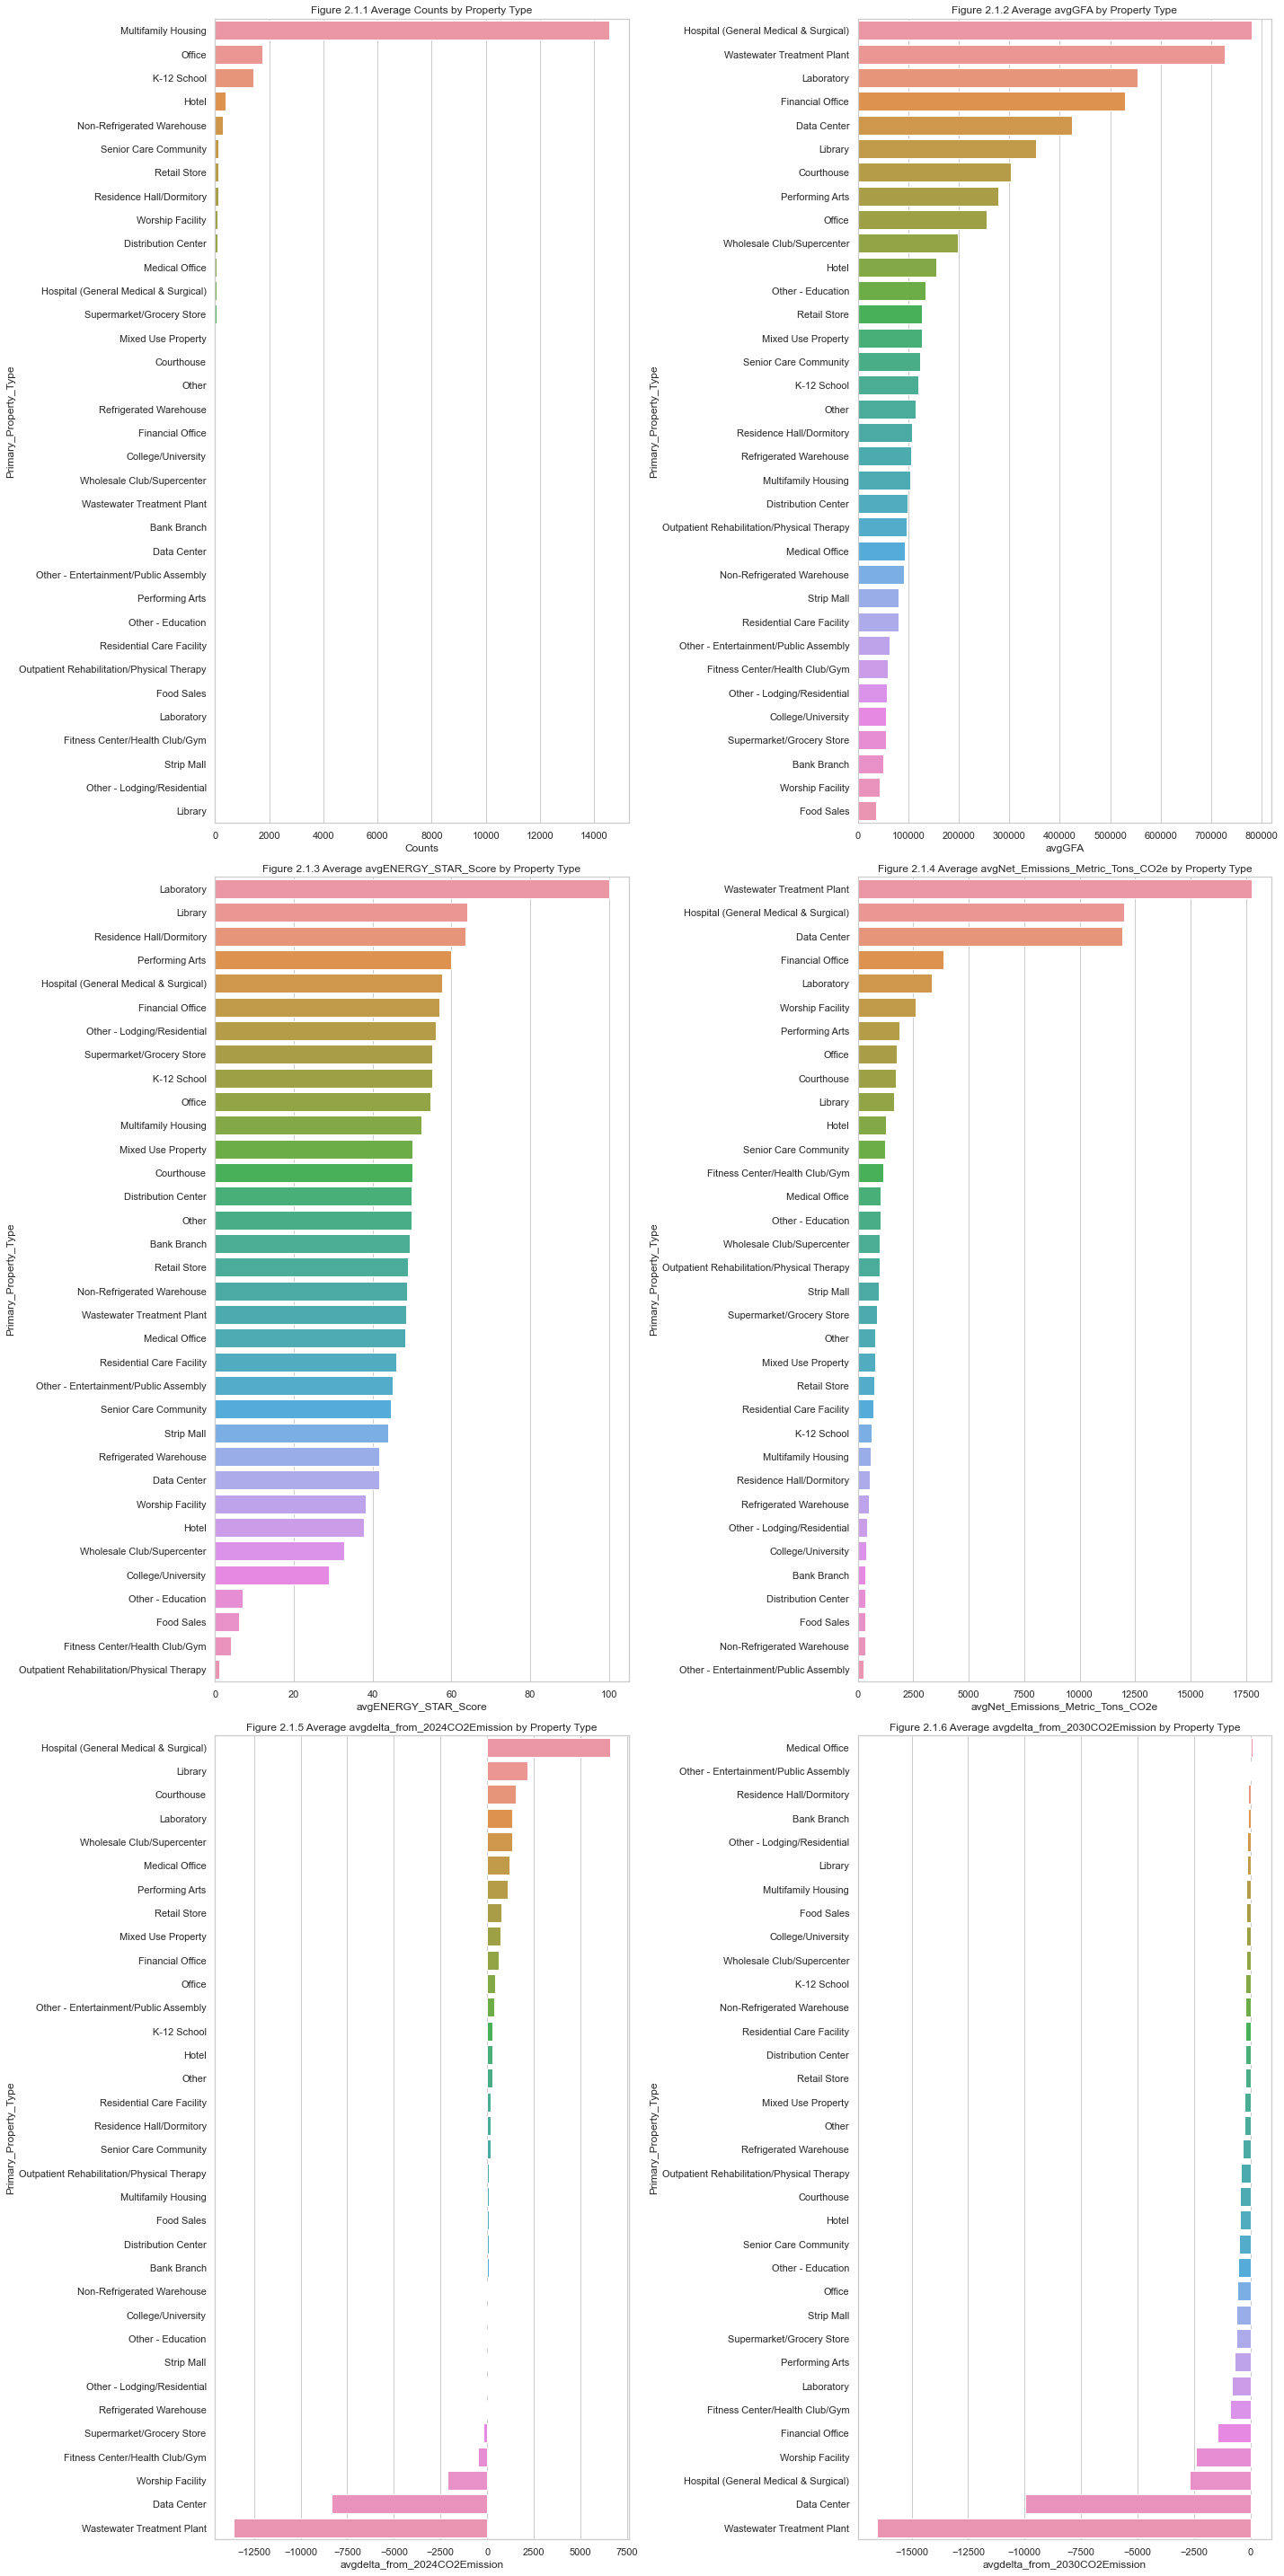

In [109]:
# Create variable lists
var_list = ['Counts','avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e','avgdelta_from_2024CO2Emission',\
            'avgdelta_from_2030CO2Emission']

plt.figure(figsize=(20,40))
fig_no = 1

# Plot distributions with for loop
for v in var_list:
    ax1 = plt.subplot(3, 2, fig_no)
    sns.set(style='whitegrid', palette='pastel', color_codes=True)
    
    ## plot the bar chart
    sns.barplot(data=attribute_byPT2, x = v, y = "Primary_Property_Type",order=attribute_byPT2.\
                sort_values(v, ascending=False).Primary_Property_Type).\
    set(title='Figure 2.1.'+ str(fig_no) + ' Average ' + v + ' by Property Type',xlabel=v)

    fig_no += 1

plt.tight_layout()

[Return to table](#0)
#### b. By occupancy classification <a class="anchor" id="2_1_b"></a>

In [75]:
#sum by occupancy
total_byOC = ll84_score_sum.groupby('Occupancy_Classification').sum()
total_byOC.columns=['GFA_sqft_sum', 'ENERGY_STAR_Score_sum','Net_Emissions_Metric_Tons_CO2e_sum',
                       '2024Annual_Emission_Cap_Metric_Tons_sum','2030Annual_Emission_Cap_Metric_Tons_sum',
                       'delta_from_2024CO2Emission_sum','delta_from_2030CO2Emission_sum']

# Count and proportion of building type
counts_perGroup = ll84_score['Occupancy_Classification'].value_counts()
counts_per = (counts_perGroup / counts_perGroup.sum()*100)
attribute_byOC = pd.concat([counts_perGroup, counts_per, total_byOC],axis=1).reset_index()
attribute_byOC.columns=['Occupancy_Classification', 'Counts','counts_by_%','GFA_sqft_sum','ENERGY_STAR_Score_sum',
                        'Net_Emissions_Metric_Tons_CO2e_sum','2024Annual_Emission_Cap_Metric_Tons_sum',
                        '2030Annual_Emission_Cap_Metric_Tons_sum','delta_from_2024CO2Emission_sum','delta_from_2030CO2Emission_sum']

#attribute_byOC.sort_values(by=['Counts','counts_by_%','GFA_sqft_sum'], ascending=False)

In [77]:
#GFA, score, emission... by BBL
attribute_byOC['avgGFA']=attribute_byOC['GFA_sqft_sum']/attribute_byOC['Counts']
attribute_byOC['avgENERGY_STAR_Score']=attribute_byOC['ENERGY_STAR_Score_sum']/attribute_byOC['Counts']
attribute_byOC['avgNet_Emissions_Metric_Tons_CO2e']=attribute_byOC['Net_Emissions_Metric_Tons_CO2e_sum']/attribute_byOC['Counts']
attribute_byOC['avg2024Annual_Emission_Cap_Metric_Ton']=attribute_byOC['2024Annual_Emission_Cap_Metric_Tons_sum']/attribute_byOC['Counts']
attribute_byOC['avg2030Annual_Emission_Cap_Metric_Tons']=attribute_byOC['2030Annual_Emission_Cap_Metric_Tons_sum']/attribute_byOC['Counts']
attribute_byOC['avgdelta_from_2024CO2Emission']=attribute_byOC['delta_from_2024CO2Emission_sum']/attribute_byOC['Counts']
attribute_byOC['avgdelta_from_2030CO2Emission']=attribute_byOC['delta_from_2030CO2Emission_sum']/attribute_byOC['Counts']


#reorder columns
attribute_byOC = attribute_byOC.loc[:,['Occupancy_Classification','Counts','counts_by_%','GFA_sqft_sum','avgGFA',
                                       'ENERGY_STAR_Score_sum','avgENERGY_STAR_Score','Net_Emissions_Metric_Tons_CO2e_sum',
                                       'avgNet_Emissions_Metric_Tons_CO2e','2024Annual_Emission_Cap_Metric_Tons_sum',
                                       'avg2024Annual_Emission_Cap_Metric_Ton','2030Annual_Emission_Cap_Metric_Tons_sum',
                                       'avg2030Annual_Emission_Cap_Metric_Tons','delta_from_2024CO2Emission_sum',
                                       'avgdelta_from_2024CO2Emission','delta_from_2030CO2Emission_sum','avgdelta_from_2030CO2Emission']]
            
attribute_byOC.head(3)

,Occupancy_Classification,Counts,counts_by_%,GFA_sqft_sum,avgGFA,ENERGY_STAR_Score_sum,avgENERGY_STAR_Score,Net_Emissions_Metric_Tons_CO2e_sum,avgNet_Emissions_Metric_Tons_CO2e,2024Annual_Emission_Cap_Metric_Tons_sum,avg2024Annual_Emission_Cap_Metric_Ton,2030Annual_Emission_Cap_Metric_Tons_sum,avg2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission_sum,avgdelta_from_2024CO2Emission,delta_from_2030CO2Emission_sum,avgdelta_from_2030CO2Emission
0,R2_Residential_Multifamily,14673,75.723796,1514215899,103197.430587,770324,52.499421,8708499.0,593.505009,1.022096e+07,696.582656,6.162859e+06,420.013542,1.512458e+06,103.077647,-2.545640e+06,-173.491467
1,B_Business,1799,9.284203,461617886,256596.934964,98350,54.669261,3197354.4,1777.295386,3.905287e+06,2170.810070,2.091129e+06,1162.384115,7.079329e+05,393.514683,-1.106225e+06,-614.911271
2,E_Educational,1444,7.452134,171056401,118460.111496,79058,54.749307,886584.9,613.978463,1.296608e+06,897.927645,5.884340e+05,407.502784,4.100226e+05,283.949183,-2.981509e+05,-206.475679


In [78]:
#save output to local 
#attribute_byOC.to_csv(r'C:/Users/Downloads/attribute_byOC.csv', index = False)

[Return to table](#0)
##### Tabel 2.2. GFA, ESScore, Carbon Emission by occupancy classification<a class="anchor" id="2_tabel_2"></a>

In [79]:
#drop total
attribute_byOC2=attribute_byOC.loc[:,['Occupancy_Classification','Counts','counts_by_%','avgGFA','avgENERGY_STAR_Score',
                                              'avgNet_Emissions_Metric_Tons_CO2e','avg2024Annual_Emission_Cap_Metric_Ton',
                                              'avg2030Annual_Emission_Cap_Metric_Tons','avgdelta_from_2024CO2Emission',
                                              'avgdelta_from_2030CO2Emission']]
#attribute_byOC2.head(2)
attribute_byOC2.sort_values(by=['Counts','counts_by_%','avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e'], ascending=False)

,Occupancy_Classification,Counts,counts_by_%,avgGFA,avgENERGY_STAR_Score,avgNet_Emissions_Metric_Tons_CO2e,avg2024Annual_Emission_Cap_Metric_Ton,avg2030Annual_Emission_Cap_Metric_Tons,avgdelta_from_2024CO2Emission,avgdelta_from_2030CO2Emission
0,R2_Residential_Multifamily,14673,75.723796,103197.430587,52.499421,593.505009,696.582656,420.013542,103.077647,-173.491467
1,B_Business,1799,9.284203,256596.934964,54.669261,1777.295386,2170.810070,1162.384115,393.514683,-614.911271
2,E_Educational,1444,7.452134,118460.111496,54.749307,613.978463,897.927645,407.502784,283.949183,-206.475679
3,S_Storage,405,2.090107,93232.713580,48.619753,331.093086,397.171360,102.555985,66.078273,-228.537101
4,R1_Residential_Hotels,394,2.033338,155816.835025,37.898477,1269.835279,1537.912162,819.596552,268.076883,-450.238727
5,M_Mercantile,244,1.259225,113325.504098,49.918033,783.913934,1338.374203,456.701782,554.460269,-327.212153
6,I1_Institutional,140,0.722506,122594.678571,44.028571,1227.995714,1395.127442,733.116178,167.131728,-494.879536
7,A_Assembly,136,0.701863,93781.889706,40.757353,2374.892647,1007.217495,393.883937,-1367.675152,-1981.008710
8,I2_I3_Institutional,128,0.660577,410355.992188,52.585938,6080.213281,9770.576174,4895.546987,3690.362893,-1184.666294
9,F_Factory,14,0.072251,727680.642857,48.500000,17762.292857,4176.886890,1215.226674,-13585.405967,-16547.066184


[Return to table](#0)
##### Figure 2.2. GFA, ESScore, Carbon Emission by occupancy<a class="anchor" id="2_fig_2"></a>

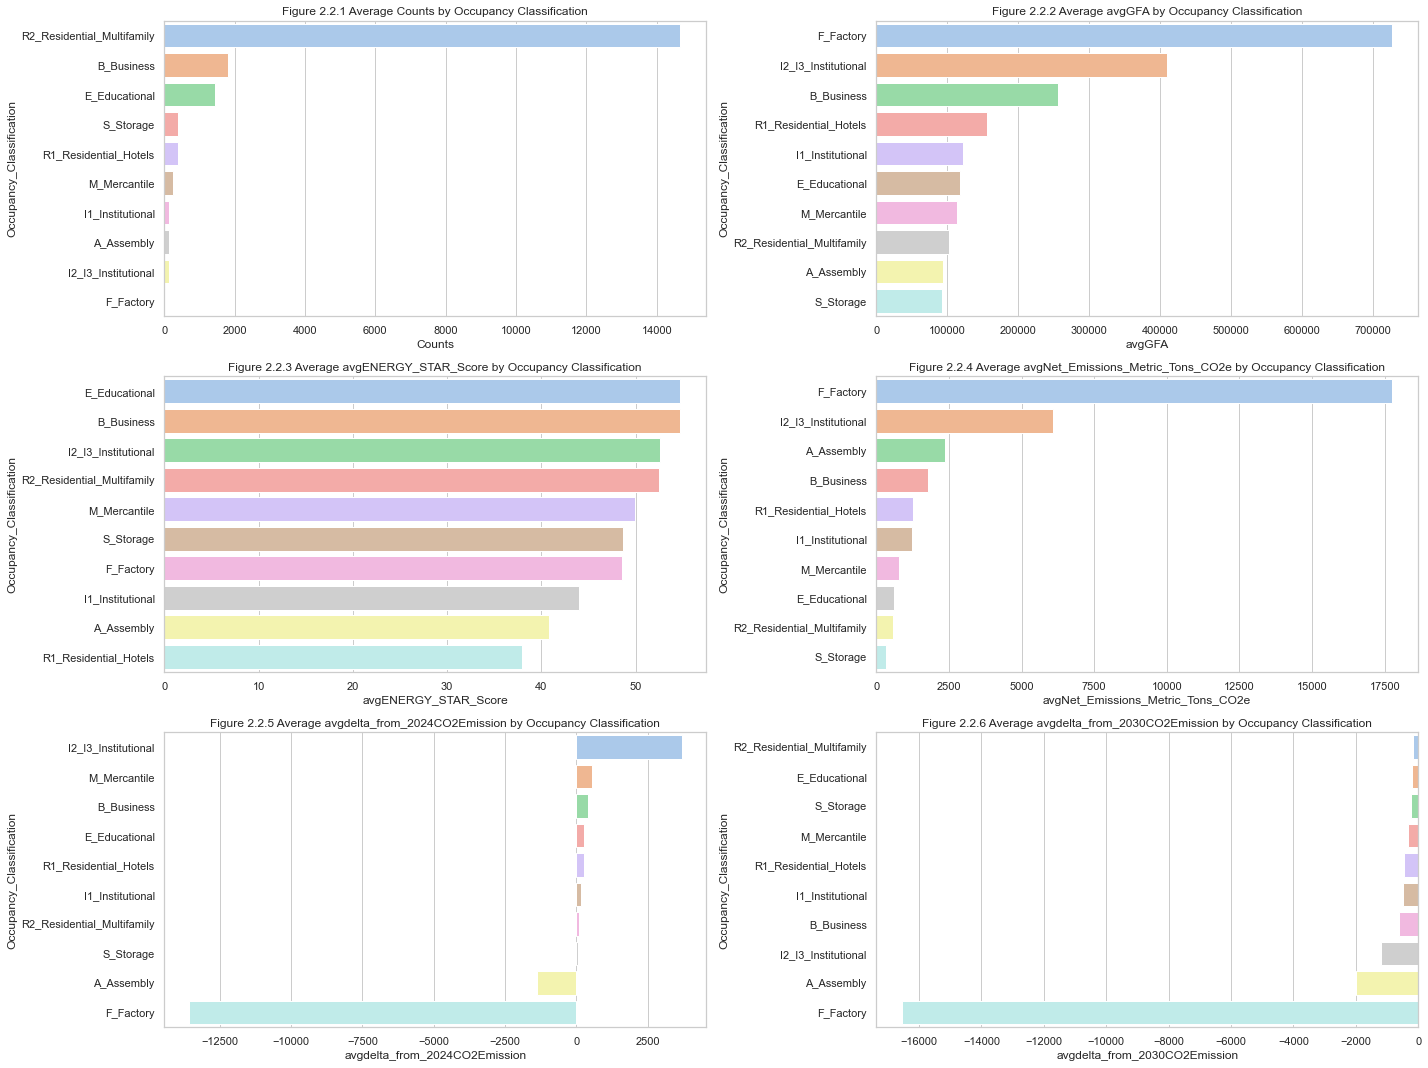

In [107]:
# Create variable lists
var_list = ['Counts','avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e','avgdelta_from_2024CO2Emission',\
            'avgdelta_from_2030CO2Emission']

plt.figure(figsize=(20,15))
fig_no = 1

# Plot distributions with for loop
for v in var_list:
    ax1 = plt.subplot(3, 2, fig_no)
    sns.set(style='whitegrid', palette='pastel', color_codes=True)
    
    ## plot the bar chart
    sns.barplot(data=attribute_byOC2, x = v, y = "Occupancy_Classification",order=attribute_byOC2.\
                sort_values(v, ascending=False).Occupancy_Classification).\
    set(title='Figure 2.2.'+ str(fig_no) + ' Average ' + v + ' by Occupancy Classification',xlabel=v)

    fig_no += 1

plt.tight_layout()

[Return to table](#0)
#### c. By scoring performance <a class="anchor" id="2_1_c"></a>

In [93]:
#sum by energyStarScore_performance
total_byESS = ll84_score_sum.groupby('energyStarScore_performance').sum()
total_byESS.columns=['GFA_sqft_sum', 'ENERGY_STAR_Score_sum','Net_Emissions_Metric_Tons_CO2e_sum',
                       '2024Annual_Emission_Cap_Metric_Tons_sum','2030Annual_Emission_Cap_Metric_Tons_sum',
                       'delta_from_2024CO2Emission_sum','delta_from_2030CO2Emission_sum']

total_byESS.sort_values(by=['GFA_sqft_sum','ENERGY_STAR_Score_sum'], ascending=False)

,GFA_sqft_sum,ENERGY_STAR_Score_sum,Net_Emissions_Metric_Tons_CO2e_sum,2024Annual_Emission_Cap_Metric_Tons_sum,2030Annual_Emission_Cap_Metric_Tons_sum,delta_from_2024CO2Emission_sum,delta_from_2030CO2Emission_sum
energyStarScore_performance,,,,,,,
Middle,902994960,347012,5435024.3,6.959547e+06,3.850111e+06,1.524523e+06,-1.584913e+06
Top,767669266,558799,3065168.0,5.922398e+06,3.303955e+06,2.857230e+06,2.387867e+05
Bottom,695659153,107841,6639773.0,5.275672e+06,2.964095e+06,-1.364101e+06,-3.675678e+06


In [94]:
counts_perGroup = ll84_score['energyStarScore_performance'].value_counts();counts_perGroup
total_byESS = pd.concat([total_byESS, counts_perGroup],axis=1).reset_index();total_byESS

,index,GFA_sqft_sum,ENERGY_STAR_Score_sum,Net_Emissions_Metric_Tons_CO2e_sum,2024Annual_Emission_Cap_Metric_Tons_sum,2030Annual_Emission_Cap_Metric_Tons_sum,delta_from_2024CO2Emission_sum,delta_from_2030CO2Emission_sum,energyStarScore_performance
0,Bottom,695659153,107841,6639773.0,5.275672e+06,2.964095e+06,-1.364101e+06,-3.675678e+06,6449
1,Middle,902994960,347012,5435024.3,6.959547e+06,3.850111e+06,1.524523e+06,-1.584913e+06,6492
2,Top,767669266,558799,3065168.0,5.922398e+06,3.303955e+06,2.857230e+06,2.387867e+05,6436


In [96]:
total_byESS.columns=['energyStarScore_performanceLevel', 'GFA_sqft_sum','ENERGY_STAR_Score_sum',
                     'Net_Emissions_Metric_Tons_CO2e_sum','2024Annual_Emission_Cap_Metric_Tons_sum',
                     '2030Annual_Emission_Cap_Metric_Tons_sum','delta_from_2024CO2Emission_sum',
                     'delta_from_2030CO2Emission_sum','Counts']
total_byESS.columns

Index(['energyStarScore_performanceLevel', 'GFA_sqft_sum',
       'ENERGY_STAR_Score_sum', 'Net_Emissions_Metric_Tons_CO2e_sum',
       '2024Annual_Emission_Cap_Metric_Tons_sum',
       '2030Annual_Emission_Cap_Metric_Tons_sum',
       'delta_from_2024CO2Emission_sum', 'delta_from_2030CO2Emission_sum',
       'Counts'],
      dtype='object')

In [101]:
#GFA, score, emission... by BBL
total_byESS['avgGFA']=total_byESS['GFA_sqft_sum']/total_byESS['Counts']
total_byESS['avgENERGY_STAR_Score']=total_byESS['ENERGY_STAR_Score_sum']/total_byESS['Counts']
total_byESS['avgNet_Emissions_Metric_Tons_CO2e']=total_byESS['Net_Emissions_Metric_Tons_CO2e_sum']/total_byESS['Counts']
total_byESS['avg2024Annual_Emission_Cap_Metric_Ton']=total_byESS['2024Annual_Emission_Cap_Metric_Tons_sum']/total_byESS['Counts']
total_byESS['avg2030Annual_Emission_Cap_Metric_Tons']=total_byESS['2030Annual_Emission_Cap_Metric_Tons_sum']/total_byESS['Counts']
total_byESS['avgdelta_from_2024CO2Emission']=total_byESS['delta_from_2024CO2Emission_sum']/total_byESS['Counts']
total_byESS['avgdelta_from_2030CO2Emission']=total_byESS['delta_from_2030CO2Emission_sum']/total_byESS['Counts']

#reorder columns
total_byESS = total_byESS.loc[:,['energyStarScore_performanceLevel','GFA_sqft_sum','avgGFA','ENERGY_STAR_Score_sum',\
                                 'avgENERGY_STAR_Score','Net_Emissions_Metric_Tons_CO2e_sum','avgNet_Emissions_Metric_Tons_CO2e',\
                                 '2024Annual_Emission_Cap_Metric_Tons_sum','avg2024Annual_Emission_Cap_Metric_Ton',\
                                 '2030Annual_Emission_Cap_Metric_Tons_sum','avg2030Annual_Emission_Cap_Metric_Tons',\
                                 'delta_from_2024CO2Emission_sum','avgdelta_from_2024CO2Emission',\
                                 'delta_from_2030CO2Emission_sum','avgdelta_from_2030CO2Emission', 'Counts']]
            
#total_byESS.head(3)

IndentationError: unexpected indent (3980687684.py, line 12)

In [98]:
#save output to local 
#total_byESS.to_csv(r'C:/Users/Downloads/total_byESS.csv', index = False)

[Return to table](#0)
##### Tabel 2.3. GFA, ESScore, Carbon Emission by energy star score performance level<a class="anchor" id="2_tabel_3"></a>

In [99]:
#drop total
total_byESS=total_byESS.loc[:,['energyStarScore_performanceLevel','avgGFA','avgENERGY_STAR_Score',
                                              'avgNet_Emissions_Metric_Tons_CO2e','avg2024Annual_Emission_Cap_Metric_Ton',
                                              'avg2030Annual_Emission_Cap_Metric_Tons','avgdelta_from_2024CO2Emission',
                                              'avgdelta_from_2030CO2Emission']]
total_byESS.head(2)

total_byESS.sort_values(by=['avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e'], ascending=False)

,energyStarScore_performanceLevel,avgGFA,avgENERGY_STAR_Score,avgNet_Emissions_Metric_Tons_CO2e,avg2024Annual_Emission_Cap_Metric_Ton,avg2030Annual_Emission_Cap_Metric_Tons,avgdelta_from_2024CO2Emission,avgdelta_from_2030CO2Emission
1,Middle,139093.493530,53.452249,837.187970,1072.018971,593.054668,234.831001,-244.133302
2,Top,119277.387508,86.823959,476.253574,920.198535,513.355304,443.944962,37.101730
0,Bottom,107870.856412,16.722127,1029.581796,818.060460,459.620908,-211.521336,-569.960888


[Return to table](#0)
##### Figure 2.3. GFA, ESScore, Carbon Emission by energy star score performance level<a class="anchor" id="2_fig_3"></a>

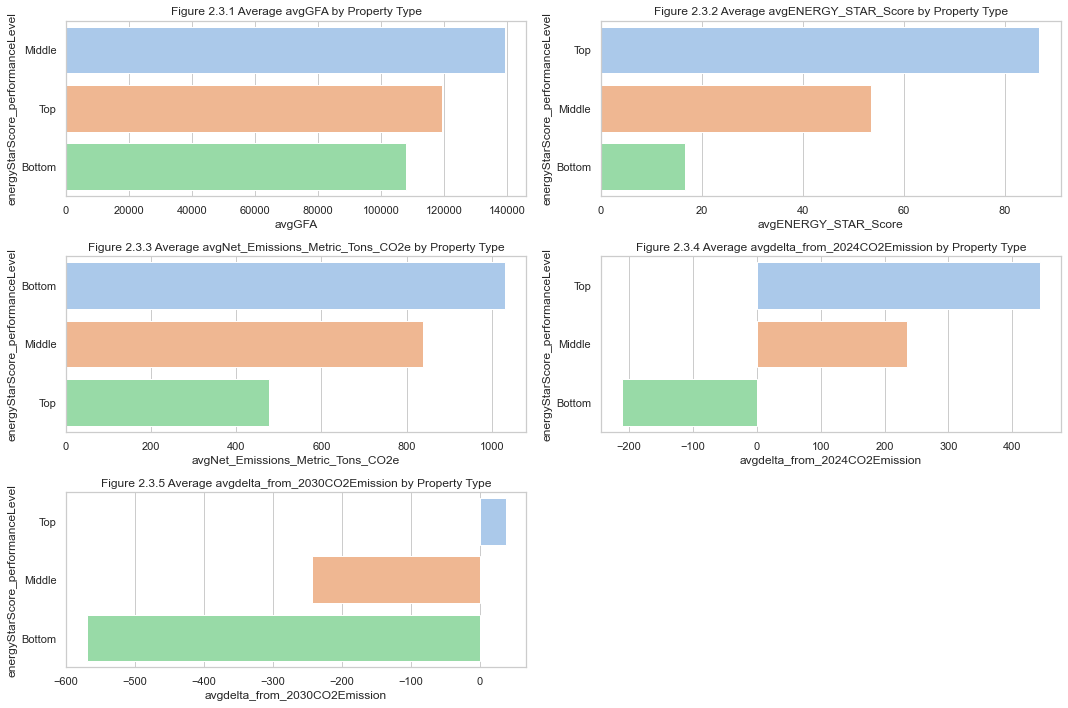

In [110]:
# Create variable lists
var_list = ['avgGFA','avgENERGY_STAR_Score','avgNet_Emissions_Metric_Tons_CO2e','avgdelta_from_2024CO2Emission',\
            'avgdelta_from_2030CO2Emission']

plt.figure(figsize=(15,10))
fig_no = 1

# Plot distributions with for loop
for v in var_list:
    ax1 = plt.subplot(3, 2, fig_no)
    sns.set(style='whitegrid', palette='pastel', color_codes=True)
    
    ## plot the bar chart
    sns.barplot(data=total_byESS, x = v, y = "energyStarScore_performanceLevel",order=total_byESS.sort_values(v, ascending=False).\
                energyStarScore_performanceLevel).set(title='Figure 2.3.'+ str(fig_no) + ' Average ' + v + ' by Property Type',xlabel=v)

    fig_no += 1

plt.tight_layout()

### 2.2 Energy Star score: <a class="anchor" id="2_2"></a> 
#### a. By all property type:<a class="anchor" id="2_2_a"></a> 
##### Figure 2.4. Distribution of ENERGY_STAR_Score by count <a class="anchor" id="2_fig_4"></a>
[Table of Content](#0)

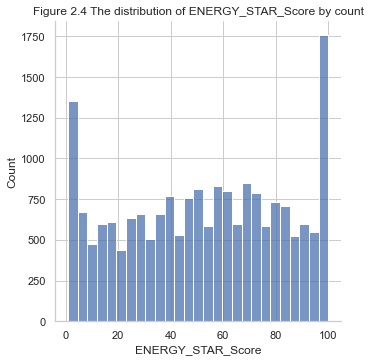

In [111]:
sns.set(style='whitegrid', palette='deep', color_codes=True)

#count distribution
sns.displot(ll84_score["ENERGY_STAR_Score"]).set(title='Figure 2.4 The distribution of ENERGY_STAR_Score by count')

[Return to table](#0)
##### Figure 2.5. Distribution of ENERGY_STAR_Score by density <a class="anchor" id="2_fig_5"></a>

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Figure 2.5 The distribution of ENERGY_STAR_Score by density')]

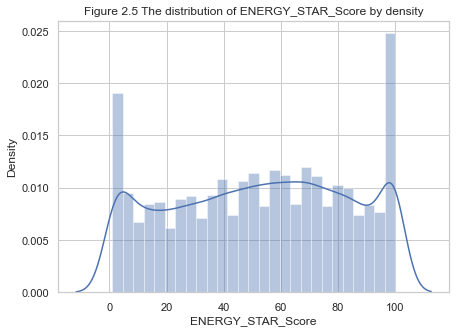

In [113]:
#density distribution
plt.figure(figsize=(7,5))
sns.distplot(ll84_score["ENERGY_STAR_Score"], norm_hist=True).set(title='Figure 2.5 The distribution of ENERGY_STAR_Score by density')

[Return to table](#0)
##### Figure 2.6. Distribution of ENERGY_STAR_Score by property type <a class="anchor" id="2_fig_6"></a>

[Text(0.5, 1.0, 'Figure 1.3 The distribution of ENERGY_STAR_Score by property type')]

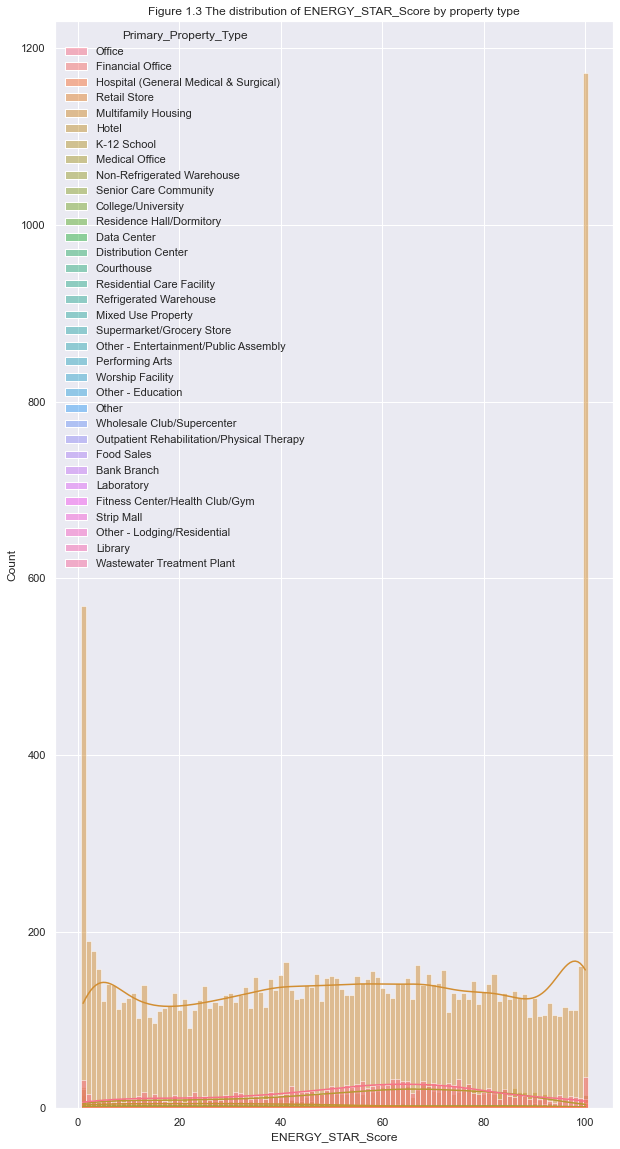

In [212]:
sns.set(rc={"figure.figsize":(10, 20)}) #width=10, height=20
sns.set_style('darkgrid')
sns.color_palette("Set2")

# The distribution of ENERGY_STAR_Score
sns.histplot(ll84_score, x='ENERGY_STAR_Score', hue='Primary_Property_Type', discrete=True, kde=True).\
set(title='Figure 2.6 The distribution of ENERGY_STAR_Score by property type')

In [214]:
#sns.color_palette("husl", 10)

[Return to table](#0)
##### Figure 2.7. Distribution of ENERGY_STAR_Score by occupancy <a class="anchor" id="2_fig_7"></a>

[Text(0.5, 1.0, 'Figure 2.7 The distribution of ENERGY_STAR_Score by occupancy')]

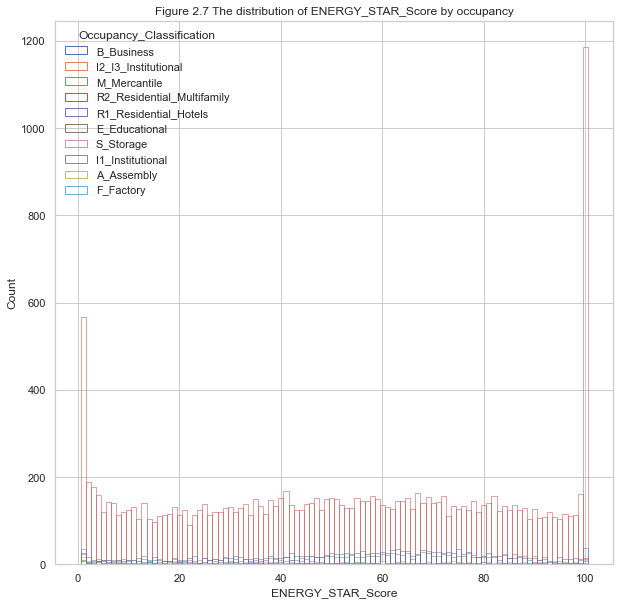

In [126]:
sns.set(rc={"figure.figsize":(10, 10)}) #width=10, height=20
sns.set_style('whitegrid')
sns.color_palette("husl", 10)

# The distribution of ENERGY_STAR_Score by Occupancy_Classification 
sns.histplot(ll84_score, x='ENERGY_STAR_Score', hue='Occupancy_Classification', discrete=True, fill=False).\
set(title='Figure 2.7 The distribution of ENERGY_STAR_Score by occupancy')

In [216]:
# Count and porpotion of occupancy category
counts_perGroup = ll84_score['Occupancy_Classification'].value_counts()
counts_per = (counts_perGroup / counts_perGroup.sum()*100)
r = pd.concat([counts_perGroup, counts_per],axis=1, keys = ['Counts','Percentage(%)']).reset_index()
r

,index,Counts,Percentage(%)
0,R2_Residential_Multifamily,14673,75.723796
1,B_Business,1799,9.284203
2,E_Educational,1444,7.452134
3,S_Storage,405,2.090107
4,R1_Residential_Hotels,394,2.033338
5,M_Mercantile,244,1.259225
6,I1_Institutional,140,0.722506
7,A_Assembly,136,0.701863
8,I2_I3_Institutional,128,0.660577
9,F_Factory,14,0.072251


In [217]:
(ll84_score['ENERGY_STAR_Score']==100).value_counts() #1,287 data scores 100, around 6.64%

False    18090
True      1287
Name: ENERGY_STAR_Score, dtype: int64

In [220]:
(ll84_score['ENERGY_STAR_Score']==1).value_counts() #702 data scores 1, around 3.62% of dataset

False    18674
True       703
Name: ENERGY_STAR_Score, dtype: int64

#### b. By R2_Residential_Multifamily building type <a class="anchor" id="2_2_b"></a> 
[Table of Content](#0)

In [114]:
#subset of multifamily
multifamily = ll84_score[ll84_score['Occupancy_Classification'] == 'R2_Residential_Multifamily']
multifamily.shape 

(14673, 50)

##### Figure 2.8. Distribution of ENERGY_STAR_Score in R2_Residential_Multifamily by borough <a class="anchor" id="2_fig_8"></a>

[Text(0.5, 1.0, 'Figure 2.8 The distribution of ENERGY_STAR_Score in R2_Residential_Multifamily by borough')]

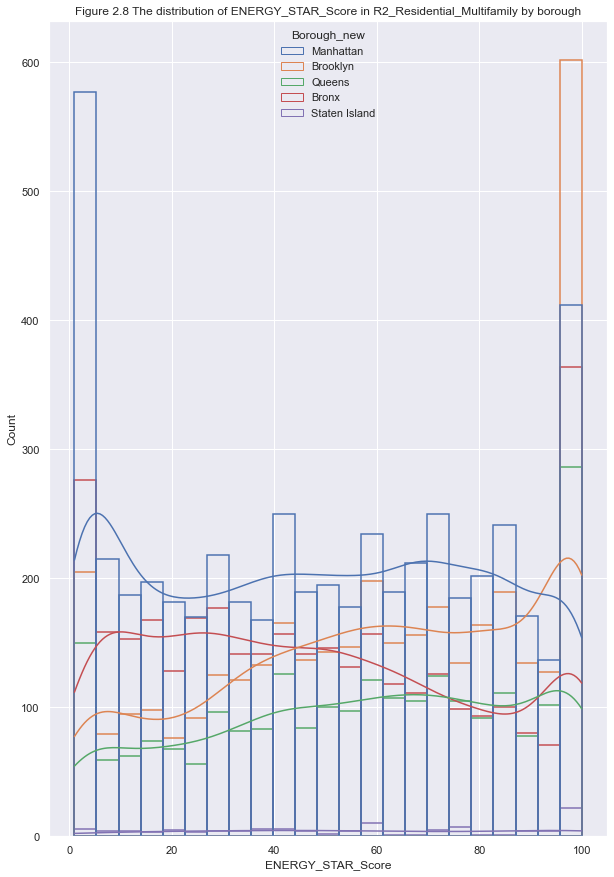

In [119]:
sns.set(rc={"figure.figsize":(10, 15)}) #width=10, height=15

sns.histplot(multifamily, x='ENERGY_STAR_Score', hue= 'Borough_new', kde=True, fill=False).\
set(title='Figure 2.8 The distribution of ENERGY_STAR_Score in R2_Residential_Multifamily by borough') 
#it's not normally distributed

Brooklyn has the most builiding item scoring 100, followed by Manhattan, Bronx, Queens then Staten Island.

In [230]:
multifamily.head(2)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
69,1010890001,1085803,640 West 42nd Street,10036,Multifamily Housing,"Bowling Alley, Fitness Center/Health Club/Gym,...",Multifamily Housing,814289,Parking,39590,2000,1,Whole Building,Whole Building,76,2018,80.3,NaN,97.1,-17.3,71339677.4,NaN,121.2,NaN,146.5,-17.3,107571705.9,107571705.9,NaN,3598280.7,NaN,506304.1,18747986.2,5494719.8,5250906.9,18747984.6,4457.1,887879.0,40.761487,-73.999917,False,Manhattan,R2_Residential_Multifamily,6.75,4.07,5993.18325,3613.66753,1536.08325,-843.43247,Top
1232,1010287501,1070014,1775 Broadway & 235 W 56th St,10019,Multifamily Housing,"Multifamily Housing, Office, Swimming Pool",Multifamily Housing,348491,Office,267509,1985,1,Whole Building,Whole Building,49,NaN,90.0,90.6,89.4,0.6,55422017.1,55782642.6,167.8,168.1,166.8,0.6,103388667.5,103388667.5,103525344.5,NaN,NaN,14210.9,23125137.8,6777589.4,6723288.3,23125137.1,4084.2,616000.0,NaN,NaN,False,Manhattan,R2_Residential_Multifamily,6.75,4.07,4158.00000,2507.12000,73.80000,-1577.08000,Middle


[Return to table](#0)
##### Tabel 2.4. # of buildings, GFA, ESScore, Carbon Emission of multifamily by borough<a class="anchor" id="2_tabel_4"></a>

In [232]:
#average of interested variables
avgPerf_multifamily_boro= multifamily.groupby('Borough_new').mean()
avgPerf_multifamily_boro_selected = avgPerf_multifamily_boro.loc[:,['ENERGY_STAR_Score', 'Year_Built', \
                                                                    'Net_Emissions_Metric_Tons_CO2e', 'Property_GFA_sqft', \
                                                                    '2024Annual_Emission_Cap_Metric_Tons', \
                                                                    '2030Annual_Emission_Cap_Metric_Tons', \
                                                                    'delta_from_2024CO2Emission','delta_from_2030CO2Emission']]

#reorder the column 
avgPerf_multifamily_boro_selected= avgPerf_multifamily_boro_selected.loc[:, ['ENERGY_STAR_Score', 'Year_Built', \
                                                                             'Net_Emissions_Metric_Tons_CO2e', \
                                                                             'Property_GFA_sqft', \
                                                                             '2024Annual_Emission_Cap_Metric_Tons', \
                                                                             'delta_from_2024CO2Emission', \
                                                                             '2030Annual_Emission_Cap_Metric_Tons',\
                                                                             'delta_from_2030CO2Emission']]

#number of BBL item per boro
r = multifamily.groupby('Borough_new').count()
r_selected = r['BBL']

#combine the datatset
Perf_multifamily_boro_selected = pd.concat([r_selected, avgPerf_multifamily_boro_selected],axis=1).reset_index()

#rename and sort
Perf_multifamily_boro_selected.columns=['Borough', 'Number of BBL', 'avg Energy Star Score', 'ave Year Built', \
                                        'avg Net CO2 Emission_metric tons','avg GFA (sqft)',\
                                        'avg 2024 Annual Emission Cap (metric tons)', 'delta_from_2024CO2Emission',\
                                        'avg 2030 Annual Emission Cap (metric tons)','delta_from_2030CO2Emission']
Perf_multifamily_boro_selected.sort_values(by='Number of BBL', ascending=False)

,Borough,Number of BBL,avg Energy Star Score,ave Year Built,avg Net CO2 Emission_metric tons,avg GFA (sqft),avg 2024 Annual Emission Cap (metric tons),delta_from_2024CO2Emission,avg 2030 Annual Emission Cap (metric tons),delta_from_2030CO2Emission
2,Manhattan,5141,48.918887,1942.936394,810.379809,125861.377942,849.564301,39.184492,512.255808,-298.124001
1,Brooklyn,3648,59.361020,1949.700384,387.407127,82473.745614,556.697783,169.290656,335.668145,-51.738983
0,Bronx,3405,47.791189,1942.039941,489.638855,83996.320117,566.975161,77.336306,341.865023,-147.773832
3,Queens,2368,56.298986,1955.195101,587.823986,112333.764780,758.252912,170.428926,457.198423,-130.625564
4,Staten Island,111,56.198198,1973.261261,629.618919,128689.243243,868.652392,239.033473,523.765220,-105.853699


In [237]:
#Perf_multifamily_boro_selected.to_csv(r'C:/Users/Downloads/NYCLocalLaw_data/cleaned/ll84Perf_multifamily_boro_selected.csv', index = False)

In [233]:
print((multifamily['ENERGY_STAR_Score']==100).value_counts()) #1187 data score 1000; Around 8.09% among multifamily building type
#ie. multifamily contributes around 91.12% of ll84_df_scoreElig data scoring 100 data. 

print((multifamily['ENERGY_STAR_Score']==1).value_counts()) #568 data score 1; Around 3.87% among multifamily building type
#ie. multifamily contributes around 80.91% of ll84_df_scoreElig data scoring 1 data. 

False    13486
True      1187
Name: ENERGY_STAR_Score, dtype: int64
False    14105
True       568
Name: ENERGY_STAR_Score, dtype: int64


In [236]:
print(1187/1287*100)
print(568/703*100)

92.22999222999223
80.79658605974396


##### Summary for Multifamily data<a class="anchor" id="sum_multifamily"></a> 
1. 1,187 data score 1000, which is around 8.09% of the multifamily data subset. **Multifamily contributes around 92.23% of ll84_score data scoring 100. **
2. 568 data score 1, which is around 3.91% of the multifamily data subset. **Multifamily contributes around 80.8% of ll84_score data scoring 1. **
3. Manhattan has the most buildings, followed by Brooklyn, Bronx, Queens and Staten Island. While **Brooklyn has the highest average Energy Star Score** (59.361020), **Bronx has the lowest** average Energy Star Score.
4. Manhattan and Bronx have approx similar oldest average built year, while **multifamily buildings in Manhattan have the highest avg Net CO2 Emission (metric tons), and have the least quota to 2024 CO2 emission limit, and it's also the furtherest from meeting 2030 CO2 emission limit.**
5. Multifamily housing in **Brooklyn is the closest to meeting 2030 CO2 emission limit**, followed by Staten Island, Queens, Bronx, and Manhattan.

#### c. By B_Business building type <a class="anchor" id="2_2_c"></a> 
[Table of Content](#0)

In [120]:
#subset of multifamily
business = ll84_score[ll84_score['Occupancy_Classification'] == 'B_Business']
business.shape 

(1799, 50)

[Return to table](#0)
##### Figure 2.9. Distribution of ENERGY_STAR_Score in B_Business by borough <a class="anchor" id="2_fig_9"></a>

[Text(0.5, 1.0, 'Figure 2.9 The distribution of ENERGY_STAR_Score in B_Business by borough')]

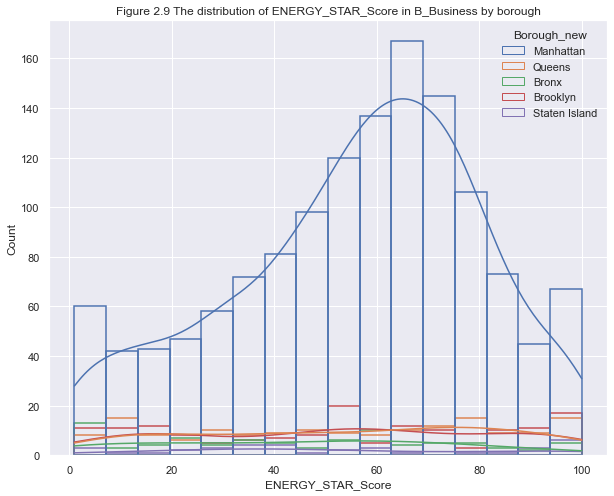

In [122]:
sns.set(rc={"figure.figsize":(10, 8)}) #width=10, height=8
sns.histplot(business, x='ENERGY_STAR_Score', hue= 'Borough_new', kde=True, fill=False).\
set(title='Figure 2.9 The distribution of ENERGY_STAR_Score in B_Business by borough') 
#it's normally distributed

Manhattan has the most builiding item scoring 100, followed by Brooklyn, Queens, Bronx then Staten Island.

In [242]:
business.head(2)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
0,1009970029,1022631,1155 Avenue of the Americas,10036,Office,"Bank Branch, Office",Office,680478.9,Bank Branch,5227,1982,1,Whole Building,NaN,79,"2017, 2015, 2010, 2008, 2006, 2005, 2003, 2002...",45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838.0,40.756631,-73.982826,False,Manhattan,B_Business,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614,Top
1,1013150001,1037545,200 East 42nd St.,10017,Office,"Bank Branch, Office, Retail Store",Office,366528,Retail Store,15789,1956,1,Whole Building,Whole Building,62,"2018, 2017, 2015, 2010, 2008, 2001",101.0,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432.0,40.750698,-73.974306,False,Manhattan,B_Business,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304,Middle


[Return to table](#0)
##### Tabel 2.5. # of buildings, GFA, ESScore, Carbon Emission of business by borough<a class="anchor" id="2_tabel_5"></a>

In [243]:
#average of interested variables
avgPerf_business_boro= business.groupby('Borough_new').mean()
avgPerf_business_boro_selected = avgPerf_business_boro.loc[:,['ENERGY_STAR_Score', 'Year_Built', \
                                                                    'Net_Emissions_Metric_Tons_CO2e', 'Property_GFA_sqft', \
                                                                    '2024Annual_Emission_Cap_Metric_Tons', \
                                                                    '2030Annual_Emission_Cap_Metric_Tons', \
                                                                    'delta_from_2024CO2Emission','delta_from_2030CO2Emission']]

#reorder the column 
avgPerf_business_boro_selected= avgPerf_business_boro_selected.loc[:, ['ENERGY_STAR_Score', 'Year_Built', \
                                                                             'Net_Emissions_Metric_Tons_CO2e', \
                                                                             'Property_GFA_sqft', \
                                                                             '2024Annual_Emission_Cap_Metric_Tons', \
                                                                             'delta_from_2024CO2Emission', \
                                                                             '2030Annual_Emission_Cap_Metric_Tons',\
                                                                             'delta_from_2030CO2Emission']]

#number of BBL item per boro
r = business.groupby('Borough_new').count()
r_selected = r['BBL']

#combine the datatset
Perf_business_boro_selected = pd.concat([r_selected, avgPerf_business_boro_selected],axis=1).reset_index()

#rename and sort
Perf_business_boro_selected.columns=['Borough', 'Number of BBL', 'avg Energy Star Score', 'ave Year Built', \
                                        'avg Net CO2 Emission_metric tons','avg GFA (sqft)',\
                                        'avg 2024 Annual Emission Cap (metric tons)', 'delta_from_2024CO2Emission',\
                                        'avg 2030 Annual Emission Cap (metric tons)','delta_from_2030CO2Emission']
Perf_business_boro_selected.sort_values(by='Number of BBL', ascending=False)

,Borough,Number of BBL,avg Energy Star Score,ave Year Built,avg Net CO2 Emission_metric tons,avg GFA (sqft),avg 2024 Annual Emission Cap (metric tons),delta_from_2024CO2Emission,avg 2030 Annual Emission Cap (metric tons),delta_from_2030CO2Emission
2,Manhattan,1361,55.728141,1933.353417,2128.856796,304813.497428,2578.722188,449.865392,1380.805143,-748.051653
3,Queens,161,53.565217,1959.944099,694.203106,122980.465839,1040.414741,346.211635,557.101510,-137.101595
1,Brooklyn,156,52.262821,1950.839744,678.576282,102042.205128,863.277055,184.700773,462.251189,-216.325093
0,Bronx,85,45.023529,1955.905882,640.730588,90935.082353,769.310797,128.580208,411.935923,-228.794665
4,Staten Island,36,52.777778,1974.888889,774.822222,92188.750000,779.916825,5.094603,417.615037,-357.207185


In [ ]:
#Perf_business_boro_selected.to_csv(r'C:/Users/Downloads/NYCLocalLaw_data/cleaned/ll84Perf_business_boro_selected.csv', index = False)

In [244]:
print((business['ENERGY_STAR_Score']==100).value_counts()) #37 data score 100; Around 1.93% among office building type
#ie. office contributes around 2.87% of ll84_df_scoreElig data scoring 100 data. 

print((business['ENERGY_STAR_Score']==1).value_counts()) #35 data score 1; Around 1.76% among office building type
#ie. office contributes around 4.98% of ll84_df_scoreElig data scoring 1 data. 

False    1762
True       37
Name: ENERGY_STAR_Score, dtype: int64
False    1764
True       35
Name: ENERGY_STAR_Score, dtype: int64


In [245]:
print(37/1287*100)
print(35/703*100)

2.8749028749028747
4.978662873399715


##### Summary for business data<a class="anchor" id="sum_business"></a> 
1. Manhattan has the most business buildings, followed by Queens, Brooklyn, Bronx, then Staten Island. Contrast to mutlifamily buildings, **Manhattan has the highest average Energy Star Score** (55.728141), Bronx again has the lowest average Energy Star Score.
2. Manhattan has the oldest average built year and highest avg Net CO2 Emission (metric tons). It has the most quota to 2024 CO2 emission limit, but need to put the most efforts in meeting 2030 CO2 emission limit.
3. Queens has the second most quota to 2024 CO2 emission limit, and is the closest to meeting 2030 CO2 emission limit.

#### d. By E_Educational building type <a class="anchor" id="2_2_d"></a> 
[Table of Content](#0)

In [124]:
#subset of education
edu = ll84_score[ll84_score['Occupancy_Classification'] == 'E_Educational']
edu.shape 

(1444, 50)

[Return to table](#0)
##### Figure 2.10. Distribution of ENERGY_STAR_Score in E_Educational by borough <a class="anchor" id="2_fig_10"></a>

[Text(0.5, 1.0, 'Figure 2.10 The distribution of ENERGY_STAR_Score in E_Educational by borough')]

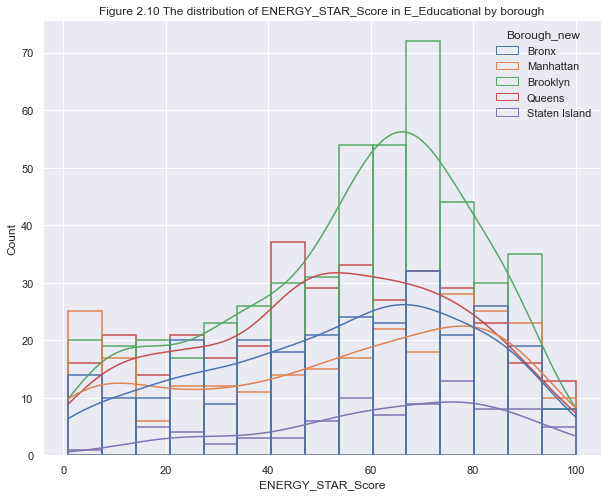

In [125]:
sns.histplot(edu, x='ENERGY_STAR_Score', hue= 'Borough_new', kde=True, fill=False).\
set(title='Figure 2.10 The distribution of ENERGY_STAR_Score in E_Educational by borough') 
#it's normally distributed

Queens has the most builiding item scoring 100, followed by Manhattan, Bronx and Brooklyn then Staten Island. Brooklyn takes up most portion in eduction building.

In [248]:
edu.head(2)

,BBL,BIN,Address,Postcode,Primary_Property_Type,List_of_All_Property_Use_Types,Largest_Property_Use_Type,Largest_Property_Use_Type_GrossFloorArea_sqft,2ndLargest_Property_Use_Type,2ndLargest_Property_Use_GrossFloorArea_sqft,Year_Built,Number_of_Buildings,Metered_Areas_Energy,Metered_Areas_Water,ENERGY_STAR_Score,ENERGY_STAR_Certification_YearsCertified,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,Latitude,Longitude,NA_scoreSiteEnergyUse_or_Typeuse,Borough_new,Occupancy_Classification,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission,energyStarScore_performance
102,2029390093,2009867,1619 Boston Road,10460,K-12 School,K-12 School,K-12 School,171725,NaN,NaN,1930,1,Whole Building,NaN,83,NaN,61.8,61.9,92.7,-33.4,10612747.8,10631078.1,87,87.1,130.5,-33.4,14933716.5,14933716.5,14952963.4,897138.1,NaN,75475.3,2186409.6,640799.9,640799.9,2186409.6,651.7,171725.0,40.835900,-73.890458,False,Bronx,E_Educational,7.58,3.44,1301.6755,590.734,649.9755,-60.966,Top
103,2028730027,2088263,1449 Shakespeare Avenue,10452,K-12 School,K-12 School,K-12 School,124900,NaN,NaN,1930,1,Whole Building,NaN,51,NaN,79.1,81.1,80.3,-1.5,9879753.4,10124264.4,105.5,107.6,107.1,-1.5,13177622.7,13177622.7,13434359.2,623484.1,NaN,78843.1,1616469.1,473759.9,473759.9,1616469.1,589.0,124900.0,40.842943,-73.920563,False,Bronx,E_Educational,7.58,3.44,946.7420,429.656,357.7420,-159.344,Middle


[Return to table](#0)
##### Tabel 2.6. # of buildings, GFA, ESScore, Carbon Emission of education by borough<a class="anchor" id="2_tabel_6"></a>

In [249]:
#average of interested variables
avgPerf_edu_boro= edu.groupby('Borough_new').mean()
avgPerf_edu_boro_selected = avgPerf_edu_boro.loc[:,['ENERGY_STAR_Score', 'Year_Built', \
                                                                    'Net_Emissions_Metric_Tons_CO2e', 'Property_GFA_sqft', \
                                                                    '2024Annual_Emission_Cap_Metric_Tons', \
                                                                    '2030Annual_Emission_Cap_Metric_Tons', \
                                                                    'delta_from_2024CO2Emission','delta_from_2030CO2Emission']]

#reorder the column 
avgPerf_edu_boro_selected= avgPerf_edu_boro_selected.loc[:, ['ENERGY_STAR_Score', 'Year_Built', \
                                                                             'Net_Emissions_Metric_Tons_CO2e', \
                                                                             'Property_GFA_sqft', \
                                                                             '2024Annual_Emission_Cap_Metric_Tons', \
                                                                             'delta_from_2024CO2Emission', \
                                                                             '2030Annual_Emission_Cap_Metric_Tons',\
                                                                             'delta_from_2030CO2Emission']]

#number of BBL item per boro
r = edu.groupby('Borough_new').count()
r_selected = r['BBL']

#combine the datatset
Perf_edu_boro_selected = pd.concat([r_selected, avgPerf_edu_boro_selected],axis=1).reset_index()

#rename and sort
Perf_edu_boro_selected.columns=['Borough', 'Number of BBL', 'avg Energy Star Score', 'ave Year Built', \
                                        'avg Net CO2 Emission_metric tons','avg GFA (sqft)',\
                                        'avg 2024 Annual Emission Cap (metric tons)', 'delta_from_2024CO2Emission',\
                                        'avg 2030 Annual Emission Cap (metric tons)','delta_from_2030CO2Emission']
Perf_edu_boro_selected.sort_values(by='Number of BBL', ascending=False)

,Borough,Number of BBL,avg Energy Star Score,ave Year Built,avg Net CO2 Emission_metric tons,avg GFA (sqft),avg 2024 Annual Emission Cap (metric tons),delta_from_2024CO2Emission,avg 2030 Annual Emission Cap (metric tons),delta_from_2030CO2Emission
1,Brooklyn,483,55.875776,1946.836439,552.908696,113550.797101,860.715042,307.806346,390.614742,-162.293954
3,Queens,347,51.968300,1955.616715,577.855043,119604.691643,906.603563,328.748519,411.440139,-166.414904
0,Bronx,275,54.596364,1951.894545,634.149091,124112.007273,940.769015,306.619924,426.945305,-207.203786
2,Manhattan,255,53.733333,1952.474510,788.259608,120376.705882,912.455431,124.195823,414.095868,-374.163740
4,Staten Island,84,63.345238,1954.369048,519.251190,117639.000000,891.703620,372.452430,404.678160,-114.573030


In [250]:
print((edu['ENERGY_STAR_Score']==100).value_counts()) #15 data score 1000; Around 1.04% among multifamily building type
#ie. multifamily contributes around 1.17% of ll84_score data scoring 100 data. 

print((edu['ENERGY_STAR_Score']==1).value_counts()) #25 data score 1; Around 1.73% among multifamily building type
#ie. multifamily contributes around 3.56% of ll84_score data scoring 1 data. 

False    1429
True       15
Name: ENERGY_STAR_Score, dtype: int64
False    1419
True       25
Name: ENERGY_STAR_Score, dtype: int64


In [253]:
print(15/1287*100)
print(25/703*100)

1.1655011655011656
3.556187766714083


##### Summary for education data<a class="anchor" id="sum_edu"></a> 
1. Brooklyn has the most buildings, followed by Queens, Bronx, Manhattan and Staten Island. While **Staten Island has the highest average Energy Star Score** (63.345238), **Queens has the lowest** average Energy Star Score.
2. Buildings in Manhattan again created the most avg Net CO2 Emission (metric tons), and have the least quota to 2024 CO2 emission limit, and it's also the furtherest from meeting 2030 CO2 emission limit.
3.**Staten Island is the closest to meeting 2030 CO2 emission limit**, followed by Brooklyn, Queens, Bronx, and Manhattan.

#### Summary on Energy Star Score:<a class="anchor" id="sum_ess"></a> 
1. Overall, the Energy Star Score is not normally distributed and has heavy tails on both end. 
2. Multifamily housing is the most commonly seen building types in the dataset (around 75%), but has extreme value in 1 and 100 (contributing around 80% of all data scoring 1, and almost 91% of all data scoring 100). Mutlifamily building type doesn't follow normal distribution in Energy Star Score either. 
3. The second largest building type is business (around 9.28%), and education (around 7.45%) and the energy score are both normally distributed.

[Table of Content](#0)

### 2.3 Net_Emissions_Metric_Tons_CO2e <a class="anchor" id="2_3"></a>
#### a. By all property type:<a class="anchor" id="2_3_a"></a> 
##### Figure 2.11. Distribution of carbon emission by density <a class="anchor" id="2_fig_11"></a>
[Table of Content](#0)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Figure 2.11 The distribution of Net_Emissions_Metric_Tons_CO2e by density')]

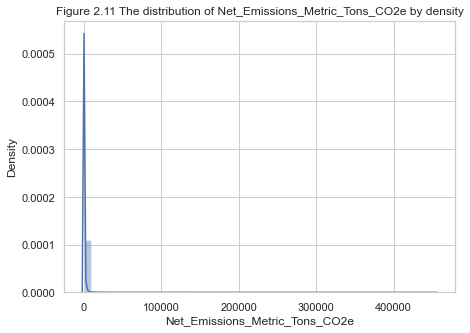

In [128]:
#density distribution
plt.figure(figsize=(7,5))
sns.distplot(ll84_score["Net_Emissions_Metric_Tons_CO2e"], norm_hist=True).set(title='Figure 2.11 The distribution of Net_Emissions_Metric_Tons_CO2e by density')

[Return to table](#0)

[Table of Content](#0)
### c. Geomap by building type <a class="anchor" id="1_2_c"></a>

#### 1. Parametric relationship
Examine if there's **linear relationship** between these variables

y= ENERGYSTARScore

x= GrossFloorArea_Largest_PropertyUseType(ft), Year_Built, SiteEUI(kBtu/ft), Weather_Normalized_SiteEUI(kBtu/ft), National_Median_SiteEUI(kBtu/ft), SiteEnergyUse(kBtu), Weather_Normalized_SiteEnergyUse(kBtu), Weather_Normalized_SiteElectricityIntensity(kWh/ft), Weather_Normalized_SiteNaturalGasIntensity(therms/ft), SourceEUI(kBtu/ft), Weather_Normalized_SourceEUI(kBtu/ft), National_Median_SourceEUI(kBtu/ft), SourceEnergyUse(kBtu), Weather_Normalized_SourceEnergyUse(kBtu)

In [130]:
ll84_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 50 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   BBL                                                                             19377 non-null  int64  
 1   BIN                                                                             19307 non-null  object 
 2   Address                                                                         19377 non-null  object 
 3   Postcode                                                                        19377 non-null  int64  
 4   Primary_Property_Type                                                           19377 non-null  object 
 5   List_of_All_Property_Use_Types                                                  19377 non-null  object 
 6   Largest_Proper

In [131]:
#if there's parametric relationship between 
ll84_score_numeric= ll84_score[['ENERGY_STAR_Score', 'Year_Built', 'Site_EUI_kBtu/sqft', 'Weather_Normalized_Site_EUI_kBtu/sqft',\
                               'National_Median_Site_EUI_kBtu/sqft', '%_Difference_from_National_Median_Site_EUI', \
                                'Site_Energy_Use_kBtu', 'Weather_Normalized_Site_Energy_Use_kBtu','Source_EUI_kBtu/sqft',\
                               'Weather_Normalized_Source_EUI_kBtu/sqft', 'National_Median_Source_EUI_kBtu/sqft',\
                               '%_Difference_from_National_Median_Source_EUI', 'Source_Energy_Use_Adjusted_to_Current_Year_kBtu',\
                               'Source_Energy_Use_kBtu', 'Weather_Normalized_Source_Energy_Use_kBtu', 'Fuel_Oil_#2_Use_kBtu',\
                               'Fuel_Oil_#4_Use_kBtu', 'Weather_Normalized_Site_Natural_Gas_Use_therms', 'Electricity_Use_Grid_Purchase_kBtu',\
                               'Electricity_Use_Grid_Purchase_kWh', 'Weather_Normalized_Site_Electricity_kWh', \
                                'Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu','Net_Emissions_Metric_Tons_CO2e',
                               'Property_GFA_sqft', '2024Carbon_Emissions_Limit_kg', '2030Carbon_Emissions_Limit_kg', '2024Annual_Emission_Cap_Metric_Tons',\
                               '2030Annual_Emission_Cap_Metric_Tons', 'delta_from_2024CO2Emission', 'delta_from_2030CO2Emission']]
ll84_score_numeric.head()

,ENERGY_STAR_Score,Year_Built,Site_EUI_kBtu/sqft,Weather_Normalized_Site_EUI_kBtu/sqft,National_Median_Site_EUI_kBtu/sqft,%_Difference_from_National_Median_Site_EUI,Site_Energy_Use_kBtu,Weather_Normalized_Site_Energy_Use_kBtu,Source_EUI_kBtu/sqft,Weather_Normalized_Source_EUI_kBtu/sqft,National_Median_Source_EUI_kBtu/sqft,%_Difference_from_National_Median_Source_EUI,Source_Energy_Use_Adjusted_to_Current_Year_kBtu,Source_Energy_Use_kBtu,Weather_Normalized_Source_Energy_Use_kBtu,Fuel_Oil_#2_Use_kBtu,Fuel_Oil_#4_Use_kBtu,Weather_Normalized_Site_Natural_Gas_Use_therms,Electricity_Use_Grid_Purchase_kBtu,Electricity_Use_Grid_Purchase_kWh,Weather_Normalized_Site_Electricity_kWh,Electricity_Use_Grid_Purchase_and_Generated_from_Onsite_Renewable_Systems_kBtu,Net_Emissions_Metric_Tons_CO2e,Property_GFA_sqft,2024Carbon_Emissions_Limit_kg,2030Carbon_Emissions_Limit_kg,2024Annual_Emission_Cap_Metric_Tons,2030Annual_Emission_Cap_Metric_Tons,delta_from_2024CO2Emission,delta_from_2030CO2Emission
0,79,1982,45.7,45.8,71.6,-36.2,31355534.8,31371842.5,110.9,110.9,173.7,-36.2,76041571.2,76041571.2,76061190.0,NaN,NaN,NaN,23995341.5,7032631.5,7032631.5,23995340.4,2520.9,686838,8.46,4.53,5810.64948,3111.37614,3289.74948,590.47614
1,62,1956,101.0,98.9,119.2,-15.3,38834131.1,38013858.7,193.4,190.6,228.3,-15.3,74360654.6,74360654.6,73278739.1,NaN,NaN,NaN,17308898.1,5072947.2,5055495.0,17308898.6,2895.1,384432,8.46,4.53,3252.29472,1741.47696,357.19472,-1153.62304
2,66,1989,70.3,70.3,87.8,-19.9,40618610.7,40596756.9,155.6,154.6,194.3,-19.9,89892927.4,89892927.4,89267197.3,NaN,NaN,9632.3,25783057.2,7556580.9,7446568.4,25783057.8,3155.8,577534,8.46,4.53,4885.93764,2616.22902,1730.13764,-539.57098
3,64,1961,97.1,95.0,118.5,-18.0,38182282.5,37325389.5,181.5,178.2,221.4,-18.0,71336439.8,71336439.8,70034515.2,NaN,NaN,NaN,15906223.2,4661846.8,4612102.7,15906222.0,2826.2,390878,8.46,4.53,3306.82788,1770.67734,480.62788,-1055.52266
4,42,1999,100.4,101.5,90.9,10.5,160831010.0,162536934.7,226.1,227.3,204.7,10.5,362229159.1,362229159.1,364053096.7,NaN,NaN,389906.7,109258703.4,32021890.4,32021890.4,109258688.7,12179.3,1601977,8.46,4.53,13552.72542,7256.95581,1373.42542,-4922.34419


In [132]:
ll84_score_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 30 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   ENERGY_STAR_Score                                                               19377 non-null  int64  
 1   Year_Built                                                                      19377 non-null  int64  
 2   Site_EUI_kBtu/sqft                                                              19377 non-null  float64
 3   Weather_Normalized_Site_EUI_kBtu/sqft                                           18054 non-null  float64
 4   National_Median_Site_EUI_kBtu/sqft                                              19377 non-null  float64
 5   %_Difference_from_National_Median_Site_EUI                                      19377 non-null  float64
 6   Site_Energy_Us

In [ ]:
#sns.pairplot(ll84_score_numeric)

In [ ]:
#Pearson correlation coefficient
corr = ll84_score_numeric.corr();corr

In [ ]:
#correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Interpretation (tbc)


Generally, GrossFloorArea_Largest_PropertyUseType(ft), Year_Built, SiteEUI(kBtu/ft), National_Median_SiteEUI(kBtu/ft), SiteEnergyUse(kBtu), SourceEUI(kBtu/ft), National_Median_SourceEUI(kBtu/ft) has positive but mild linear relationship with energy start score: 

(ranked by the strengh of correlation)

    - National_Median_SourceEUI(kBtu/ft)	0.119449
    - GrossFloorArea_Largest_PropertyUseType(ft)	0.057094	
    - Year_Built	0.022609
    - National_Median_SiteEUI(kBtu/ft)	0.004242
    - SiteEnergyUse(kBtu)	-0.018507
    - SiteEUI(kBtu/ft)	-0.042490
    - SourceEUI(kBtu/ft)	-0.047626

* National_Median_SourceEUI(kBtu/ft) and National_Median_SiteEUI(kBtu/ft) has a strong positive correlation of 0.815676.
* Site EUI (kBtu/ft) has a strong positive correlation with Site Energy Use (kBtu) as 0.998163.
* Source EUI (kBtu/ft) has a strong positive correlation with Site EUI (kBtu/ft) as 0.999559.
* Site Energy Use (kBtu) has a strong positive correlation with Source EUI (kBtu/ft) as 0.997560.